In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_predict, cross_val_score, KFold,RepeatedKFold,ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import SVR,SVC
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,roc_curve, f1_score, auc
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier

# The objective is to build two distinct machine learning models, beginning with regression followed by classification.

# $$context$$

** **

## 1. Reading and Visualizing

### 1.1. Data Distribution
### 1.2. Feature Relationships
### 1.3. Scale of Features
### 1.4. Missing Values Detection
### 1.5. Data type
### 1.6. Statistics of data
### 1.7. Feature Importance

** **

## 2. Scaling Dataset

** **

## 3. Regression Model

### 3.1. Linear Regression
#### 3.1.1. Performance of model
#### 3.1.2 calculate AIC,CP,MSE,R2_SCORE for each feature
#### 3.1.3 Feature selection
#### 3.1.4 Cross_Validation
#### 3.1.5 Bootstrapping

### 3.2. Ridge and Lasso Regression
#### 3.2.1. Choosing Alpha
#### 3.2.2. Polynomial Feature for Linear, Ridge, and Lasso

### 3.3. Decision Tree
#### 3.3.1 Decision Tree max_depth
#### 3.3.2 Decision Tree best number of features

### 3.4. Support Vector Machine
#### 3.4.1 Different Kernels
#### 3.4.2 Relationship of each feature and target

### 3.4. Random Forest
#### 3.4.1 Feature Importances

### 3.5. KNeighborsRegressor
#### 3.5.1 Number of neighbors


** **

## 4. Comparing all Regression Model

** **

## 5. Classification Model
### 5.1. Making Classes

### 5.2. Logestic Regression
#### 5.2.1. Train_Test_Split
#### 5.2.2. Cross validation
#### 5.2.3. Bootstrapping

### 5.3. Support Vector Machine
#### 5.3.1 Support Vector Machine Graphs

### 5.4. Linear and Quadratic Discriminant Analysis
#### 5.4.1. LDA and QDA feature relationship

### 5.5. Random Forest
#### 5.5.1 Visualize individual trees
#### 5.5.2 Feature Importances

### 5.6. K Nearest Neighbors
#### 5.6.1. K Nearest Neighbors Plot

### 5.7. ROC Plot for all models

### The initial phase involves reading and visualizing the dataset, aiming to extract essential insights and understand the data's characteristics before proceeding further.

# 1. Reading and Visualizing

## Let's start by loading dataset

In [75]:
data=pd.read_excel('drug.xlsx')
data.head(10)

Name   Volume  Dipole moment  Polarizability  Hardness  \
0                ethambutol  183.263       0.187446        147.4950   3.04790   
1                antipyrine  166.301       5.623050        147.9080   2.50140   
2  2-dimethylaminopteridine  131.696       1.248100        141.2490   1.83100   
3                 petridine   84.763       2.723700         94.1636   2.06520   
4  7-dimethylaminopteridine  112.386       5.935700        139.0270   2.04450   
5         2-methylpteridine  102.794       1.783000        109.1650   2.05220   
6               Cefamandole  312.908       1.415000        309.1720   2.27092   
7          2-chlorpteridine  105.273       4.245000        110.7280   2.25810   
8               Propranolol  239.160       2.741700        212.1256   2.29010   
9       7-ethyltheophylline  117.252       5.008900        114.4293   2.57280   

   Softness  Electronegative  Solubility  Moment of inertia X  LogP  
0  0.328089           3.2626       0.545           1239.42445  -0.1  
1  0.399700           3.4546       0.530           1276.99676   0.3  
2  0.546100           4.3538       0.360            825.26911  -1.2  
3  0.484200           5.1599       0.021            548.99042  -1.3  
4  0.489100           4.4586      -0.021            829.68795  -1.3  
5  0.487200           4.9734      -0.090            611.96109  -0.6  
6  0.440300           4.6843      -0.143           7844.45291   1.5  
7  0.442800           5.5844      -0.699            625.76069   0.0  
8  0.436600           3.4348      -0.714           1803.94129   3.1  
9  0.388600           4.0476      -0.757           1217.33367   0.5

## 1.1. Data Distribution

what is the distribution of my dataset?

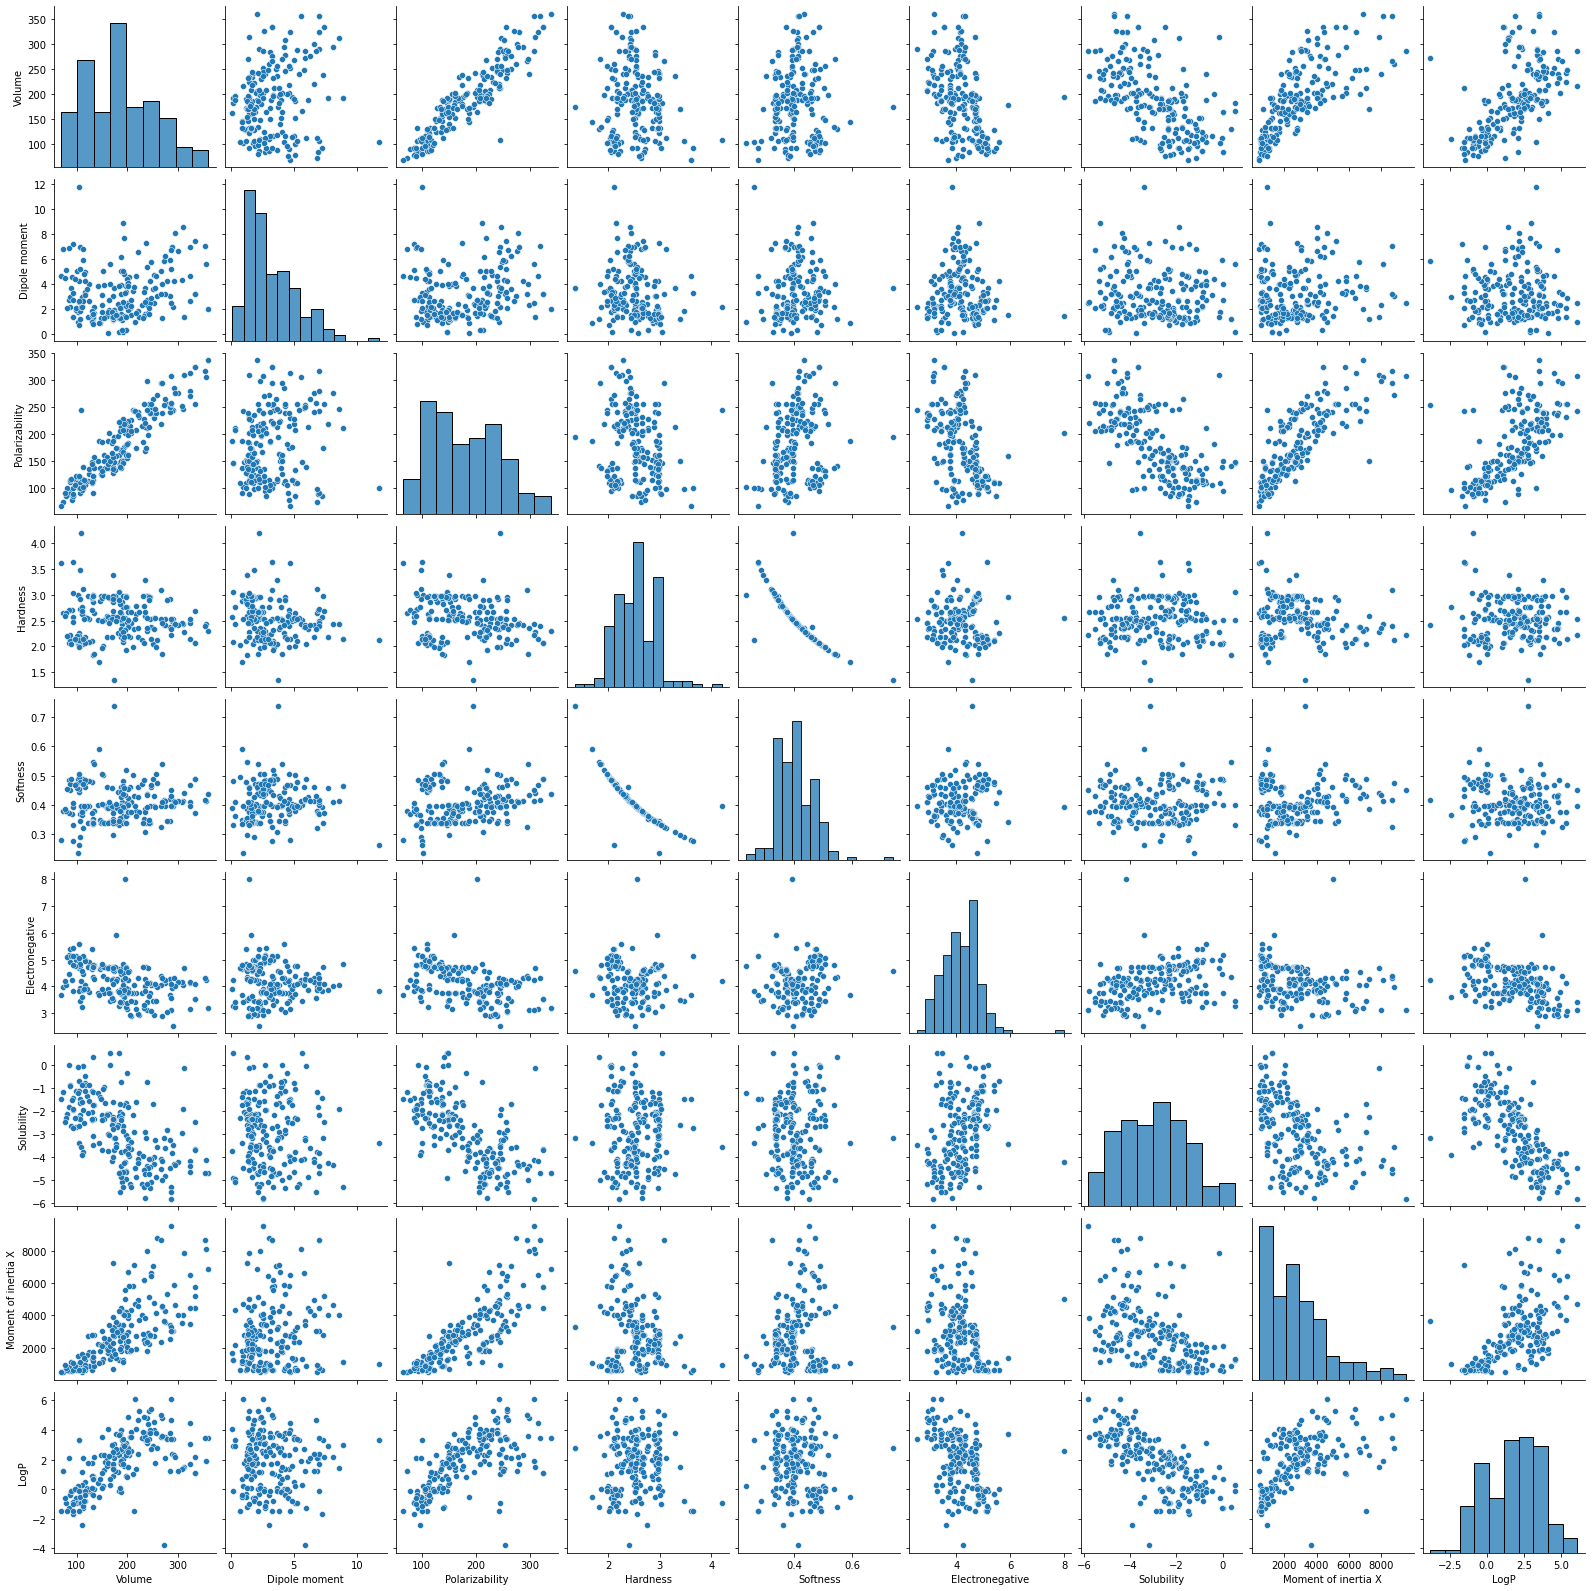

In [3]:
sns.pairplot(data);

## 1.2. Feature Relationships

what are the relationship between my features?

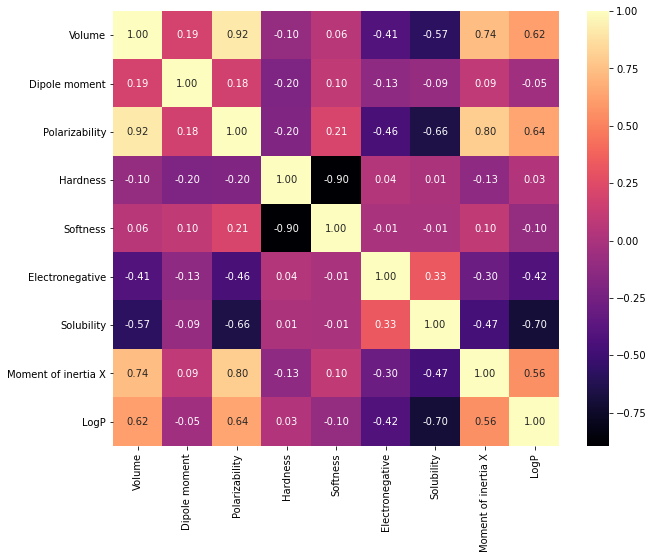

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='magma', fmt='.2f')
plt.show()


## 1.3. Scale of Features

what is the scale of each feature? are all of them in same scale?

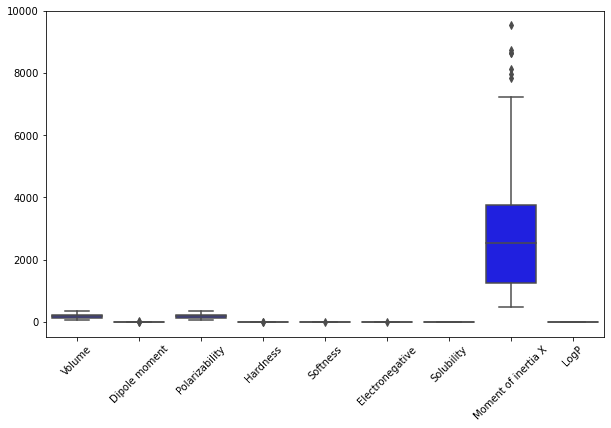

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data,color='b')
plt.xticks(rotation=45)
plt.show()


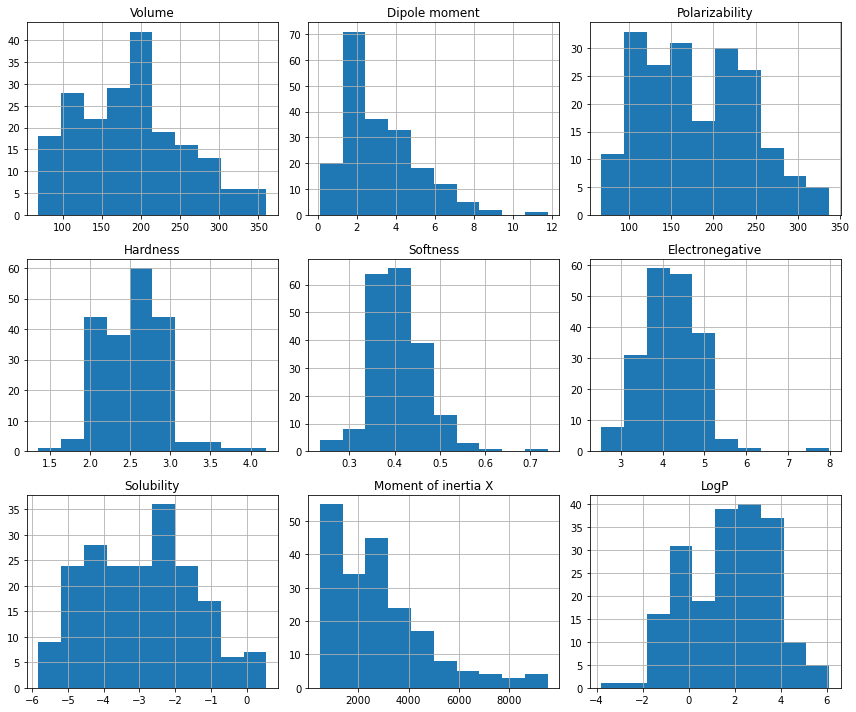

In [6]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


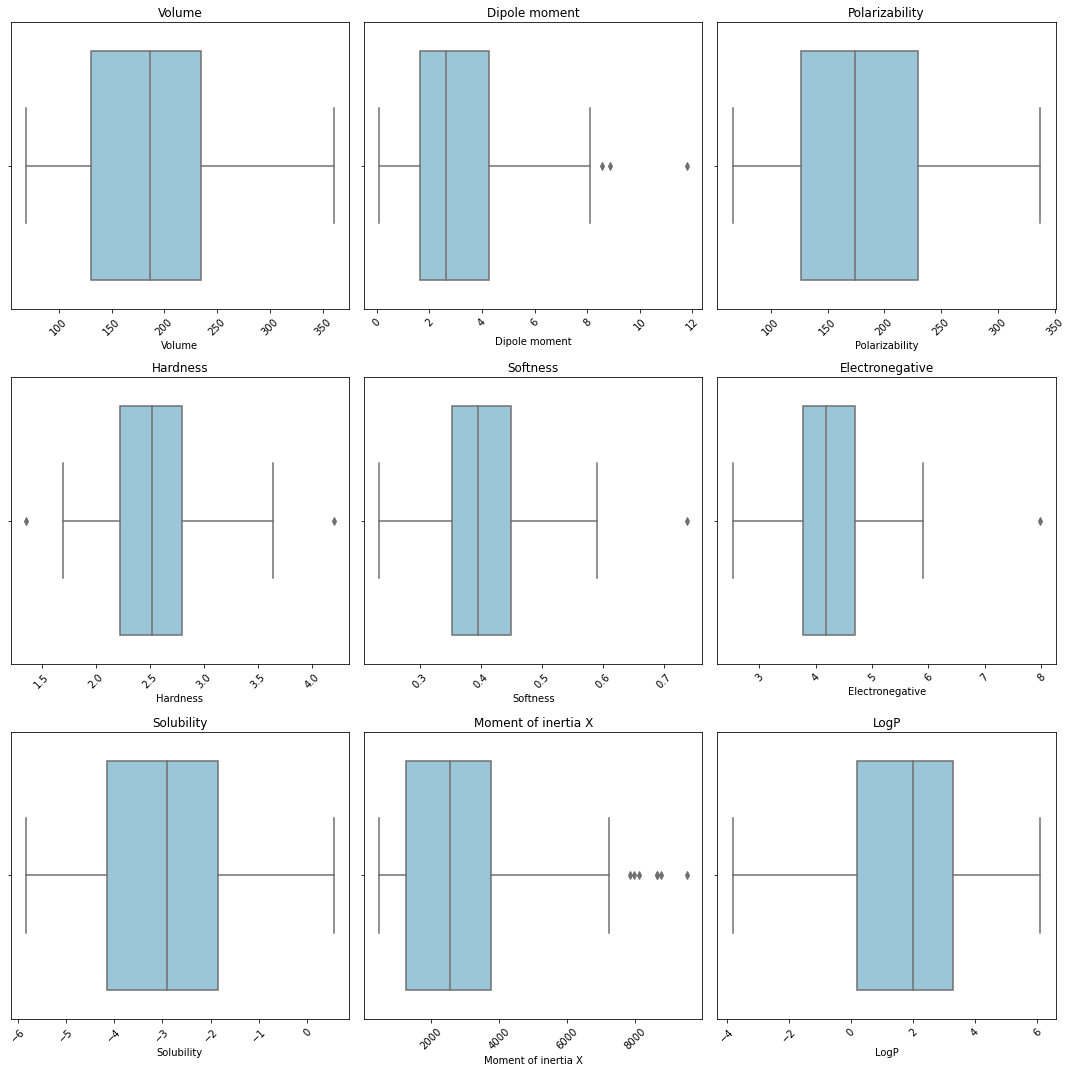

In [7]:
num_features = data.select_dtypes(include='number').columns.tolist()  # Selecting numerical columns
num_plots = len(num_features)
num_cols = 3  # Set the number of columns in the subplot grid

num_rows = (num_plots - 1) // num_cols + 1  # Calculate the number of rows needed

plt.figure(figsize=(15, 5*num_rows))  # Adjust the figure size based on the number of rows

for i, feature in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i+1)  # Adjust subplot position based on number of rows and columns
    sns.boxplot(x=data[feature], color='skyblue', saturation=0.6)
    plt.title(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Given the varying scales of each feature, standardizing the scale across all features is crucial. This ensures that our models don't assign disproportionate weight to certain features simply because of their scale differences.

## 1.4. Missing Values Detection
    
Do I have any nan value in my dataset?

In [8]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

Name                   0
Volume                 0
Dipole moment          0
Polarizability         0
Hardness               0
Softness               0
Electronegative        0
Solubility             0
Moment of inertia X    0
LogP                   0
dtype: int64


# Upon inspection, it's evident that our dataset doesn't contain any missing values.

## 1.5. Data type



In [9]:
# Checking data types and unique values for each column
print(data.dtypes)
for column in data.columns:
    print(f"Column: {column}, Unique Values: {data[column].nunique()}")


Name                    object
Volume                 float64
Dipole moment          float64
Polarizability         float64
Hardness               float64
Softness               float64
Electronegative        float64
Solubility             float64
Moment of inertia X    float64
LogP                   float64
dtype: object
Column: Name, Unique Values: 197
Column: Volume, Unique Values: 194
Column: Dipole moment, Unique Values: 190
Column: Polarizability, Unique Values: 192
Column: Hardness, Unique Values: 186
Column: Softness, Unique Values: 173
Column: Electronegative, Unique Values: 192
Column: Solubility, Unique Values: 187
Column: Moment of inertia X, Unique Values: 191
Column: LogP, Unique Values: 102


## 1.6. Statistics of data

In [10]:
# Descriptive statistics for numerical columns
statistics = pd.DataFrame(data.describe())
statistics


Volume  Dipole moment  Polarizability    Hardness    Softness  \
count  199.000000     199.000000      199.000000  199.000000  199.000000   
mean   186.750509       3.188811      180.650053    2.532278    0.403449   
std     67.610423       1.970044       63.027815    0.382914    0.063394   
min     69.162000       0.103300       66.625300    1.354400    0.234300   
25%    131.043500       1.647450      126.277950    2.223550    0.352900   
50%    186.641000       2.635300      173.998600    2.522300    0.395800   
75%    234.301500       4.281200      229.186950    2.797500    0.449650   
max    360.178000      11.793800      337.327000    4.196600    0.738300   

       Electronegative  Solubility  Moment of inertia X        LogP  
count       199.000000  199.000000           199.000000  199.000000  
mean          4.184545   -2.931769          2823.675825    1.800618  
std           0.673334    1.464793          1940.316748    1.839882  
min           2.529100   -5.824000           466.645840   -3.800000  
25%           3.766400   -4.155000          1249.360375    0.200000  
50%           4.174200   -2.900000          2549.093620    2.000000  
75%           4.705000   -1.845500          3762.312470    3.300000  
max           7.988200    0.545000          9530.106610    6.100000

## 1.7. Feature Importance

Here I have two target Solubility and LogP so I want to see what is the relationship of each feature with these two target.

In [11]:
correlation_with_target = data.corr()['Solubility'].sort_values(ascending=False)
print(correlation_with_target)


Solubility             1.000000
Electronegative        0.331911
Hardness               0.006445
Softness              -0.006126
Dipole moment         -0.093842
Moment of inertia X   -0.467792
Volume                -0.570230
Polarizability        -0.657601
LogP                  -0.701273
Name: Solubility, dtype: float64


In [12]:
correlation_with_target = data.corr()['LogP'].sort_values(ascending=False)
print(correlation_with_target)

LogP                   1.000000
Polarizability         0.639776
Volume                 0.617386
Moment of inertia X    0.556701
Hardness               0.030356
Dipole moment         -0.048288
Softness              -0.097490
Electronegative       -0.419025
Solubility            -0.701273
Name: LogP, dtype: float64


# The magnitude of a large (positive or negative) number indicates the potentially significant impact of a specific feature on our targets. However, it's advisable to verify this after feature scaling to accurately assess these relationships. Nonetheless, examining these magnitudes before scaling provides preliminary insights into potential feature importance.

# 2. Scaling Dataset

In [76]:
# Drop 'Name' column and set 'Solubility' as the target variable
data = data.drop('Name', axis=1)
X = data.drop('Solubility', axis=1) 
feature_names = X.columns.tolist()

# Initialize StandardScaler: Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()

# Fit and transform the features in X
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=feature_names)

# Choose Solubility as our target
y = data['Solubility']

In [77]:
X.head(10)

Volume  Dipole moment  Polarizability  Hardness  Softness  \
0 -0.051713      -1.527344       -0.527365  1.349970 -1.191769   
1 -0.303224       1.238743       -0.520796 -0.080843 -0.059294   
2 -0.816344      -0.987595       -0.626714 -1.836043  2.255915   
3 -1.512263      -0.236687       -1.375656 -1.222875  1.277012   
4 -1.102671       1.397845       -0.662057 -1.277071  1.354501   
5 -1.244901      -0.715393       -1.137043 -1.256911  1.324454   
6  1.870653      -0.902662        2.044273 -0.684272  0.582765   
7 -1.208142       0.537476       -1.112182 -0.717836  0.622301   
8  0.777124      -0.227527        0.500651 -0.634056  0.524253   
9 -1.030518       0.926212       -1.053309  0.106092 -0.234832   

   Electronegative  Moment of inertia X      LogP  
0        -1.372678            -0.818550 -1.035616  
1        -1.086811            -0.799138 -0.817663  
2         0.252002            -1.032536 -1.634989  
3         1.452199            -1.175284 -1.689477  
4         0.408038            -1.030253 -1.689477  
5         1.174521            -1.142748 -1.308058  
6         0.744082             2.594133 -0.163802  
7         2.084235            -1.135618 -0.981128  
8        -1.116291            -0.526876  0.708012  
9        -0.203897            -0.829964 -0.708686

In [78]:
# Descriptive statistics for numerical columns
statistics = pd.DataFrame(X.describe())
statistics


Volume  Dipole moment  Polarizability      Hardness  \
count  1.990000e+02   1.990000e+02    1.990000e+02  1.990000e+02   
mean  -4.267594e-16  -7.085343e-17   -3.397617e-16  6.354493e-16   
std    1.002522e+00   1.002522e+00    1.002522e+00  1.002522e+00   
min   -1.743593e+00  -1.570164e+00   -1.813681e+00 -3.083849e+00   
25%   -8.260192e-01  -7.843726e-01   -8.648441e-01 -8.082929e-01   
50%   -1.623792e-03  -2.816725e-01   -1.057982e-01 -2.612377e-02   
75%    7.050824e-01   5.558981e-01    7.720292e-01  6.943881e-01   
max    2.571569e+00   4.378933e+00    2.492108e+00  4.357427e+00   

           Softness  Electronegative  Moment of inertia X          LogP  
count  1.990000e+02     1.990000e+02         1.990000e+02  1.990000e+02  
mean  -1.069496e-15     9.261157e-16        -1.986128e-16  1.852231e-16  
std    1.002522e+00     1.002522e+00         1.002522e+00  1.002522e+00  
min   -2.674973e+00    -2.464781e+00        -1.217829e+00 -3.051687e+00  
25%   -7.994015e-01    -6.225736e-01        -8.134167e-01 -8.721512e-01  
50%   -1.209695e-01    -1.540286e-02        -1.418710e-01  1.086400e-01  
75%    7.306287e-01     7.749018e-01         4.849744e-01  8.169893e-01  
max    5.295416e+00     5.663237e+00         3.465076e+00  2.342665e+00

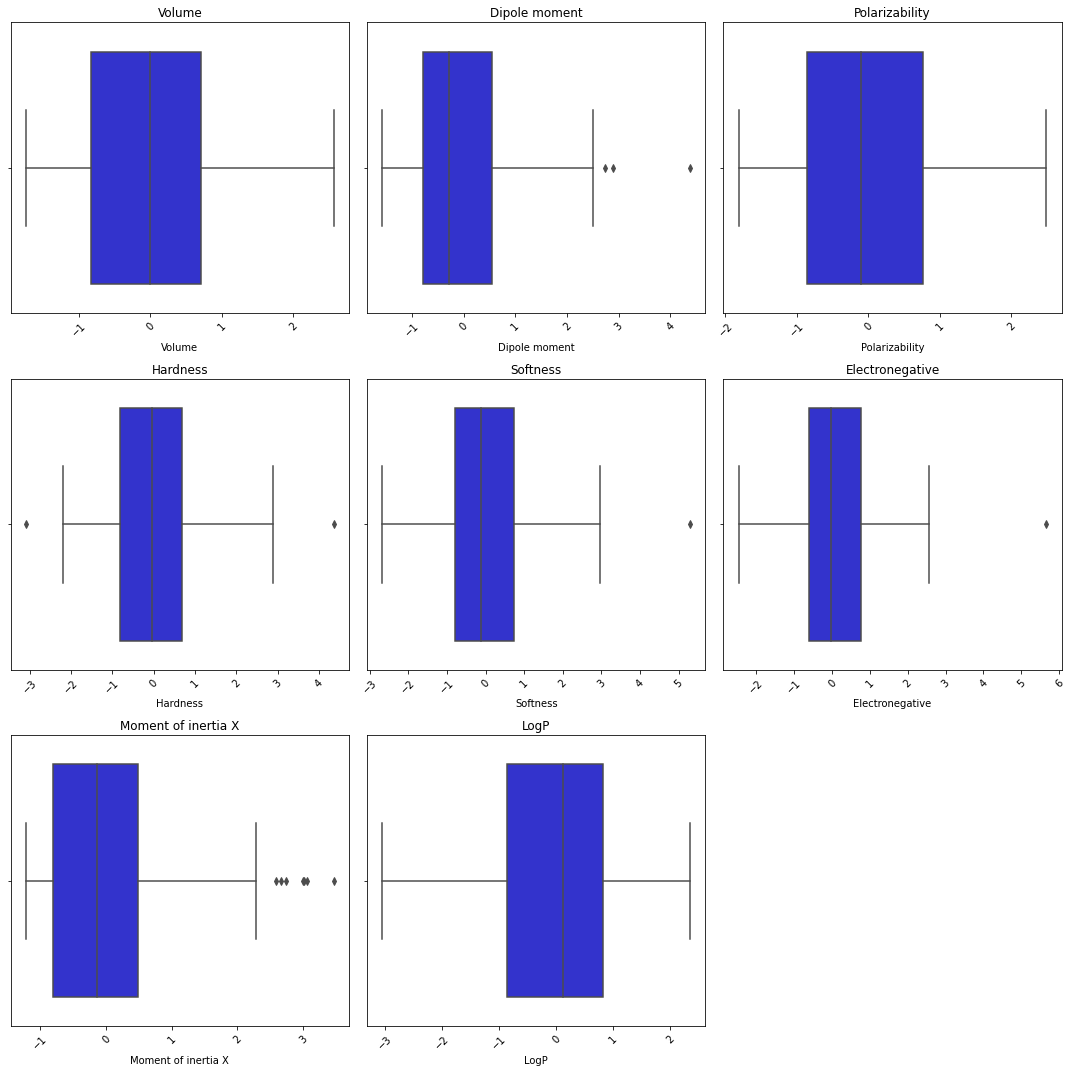

In [16]:
num_features = X.select_dtypes(include='number').columns.tolist()  # Selecting numerical columns
num_plots = len(num_features)
num_cols = 3  # Set the number of columns in the subplot grid

num_rows = (num_plots - 1) // num_cols + 1  # Calculate the number of rows needed

plt.figure(figsize=(15, 5*num_rows))  # Adjust the figure size based on the number of rows

for i, feature in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i+1)  # Adjust subplot position based on number of rows and columns
    sns.boxplot(x=X[feature], color='blue', saturation=0.6)
    plt.title(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [17]:
y

0      0.545
1      0.530
2      0.360
3      0.021
4     -0.021
       ...  
194   -1.886
195   -2.860
196   -3.043
197   -4.272
198   -4.706
Name: Solubility, Length: 199, dtype: float64

# We're initiating our regression analysis. At this point, we've omitted the 'name' column as it holds no significance for this machine learning project. All remaining columns in the dataset have been selected as our features, with 'solubility' designated as our target variable.

# 3. Regression Model

## 3.1. Linear Regression

### 3.1.1. Performance of model

In [79]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train

Volume  Dipole moment  Polarizability  Hardness  Softness  \
183  1.179420       0.038822        1.801039  1.442391 -1.251689   
38  -0.777035      -0.511535       -0.687895 -1.764045  2.127819   
24  -0.996207       0.228585       -1.057169  0.022835 -0.157342   
142  0.019298       0.008696        0.702250 -0.745065  0.646022   
141  0.160253       0.092102        0.622300 -1.571350  1.803627   
..        ...            ...             ...       ...       ...   
106  0.423018      -1.124179        0.989497 -0.014604 -0.122551   
14  -1.477477      -0.091706       -1.050276 -0.794809  0.714024   
92   0.242844       0.715178        0.536053 -0.370147  0.233270   
179  1.231081      -0.947953        0.918641 -0.213766  0.071965   
102  2.027058       1.929933        1.569754 -0.233742  0.092523   

     Electronegative  Moment of inertia X      LogP  
183         0.318258             3.005672  1.759639  
38          0.900118            -1.030303 -0.981128  
24         -0.415320            -0.669936 -0.926640  
142        -0.412491            -0.546482 -0.054825  
141        -0.383457             0.712175  0.277554  
..               ...                  ...       ...  
106        -1.144729             0.955379  2.342665  
14          1.095163            -1.072885 -1.199082  
92          0.555290             1.546212  0.272105  
179        -1.905106             0.858127  1.634315  
102        -0.060070             0.842518 -0.054825  

[159 rows x 8 columns]

In [20]:
lr = LinearRegression()

# Fit the model to the data
lr.fit(X_train, y_train)

# Predictions on training and testing data
lr_train_predictions = lr.predict(X_train)
lr_test_predictions = lr.predict(X_test)

# Calculate RMSE for train and test
lr_train_rmse = mean_squared_error(y_train, lr_train_predictions, squared=False)
lr_test_rmse = mean_squared_error(y_test, lr_test_predictions, squared=False)

# Calculate R^2 for train and test
lr_train_r2 = r2_score(y_train, lr_train_predictions)
lr_test_r2 = r2_score(y_test, lr_test_predictions)

# Calculate AIC for train and test
n_train = len(y_train)
n_test = len(y_test)
p = X_train.shape[1]  # Number of features
mse_train = mean_squared_error(y_train, lr_train_predictions)
mse_test = mean_squared_error(y_test, lr_test_predictions)

#Here I calculated AIC based on the equation
aic_train = n_train * np.log(mse_train) + 2 * p
aic_test = n_test * np.log(mse_test) + 2 * p

#Results
print("Train Metrics:")
print(f"Linear Regression Train RMSE: {lr_train_rmse}")
print(f"Linear Regression Train R^2 score: {lr_train_r2}")
print(f"Linear Regression Train AIC: {aic_train}")

print("\nTest Metrics:")
print(f"Linear Regression Test RMSE: {lr_test_rmse}")
print(f"Linear Regression Test R^2 score: {lr_test_r2}")
print(f"Linear Regression Test AIC: {aic_test}")



Train Metrics:
Linear Regression Train RMSE: 0.8823667436429928
Linear Regression Train R^2 score: 0.6418330884658439
Linear Regression Train AIC: -23.796905089345707

Test Metrics:
Linear Regression Test RMSE: 1.0436160500095304
Linear Regression Test R^2 score: 0.4415162326398354
Linear Regression Test AIC: 19.415332290162873


# The model's performance appears suboptimal with an accuracy of 64% for training and 44% for testing, indicating a need for improvement. To gain deeper insights, let's visualize the regression model based on individual features against the target variable.

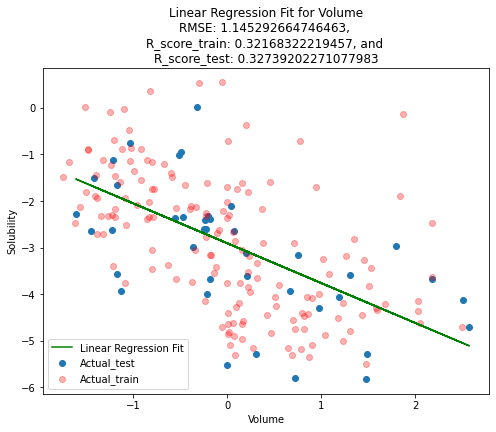

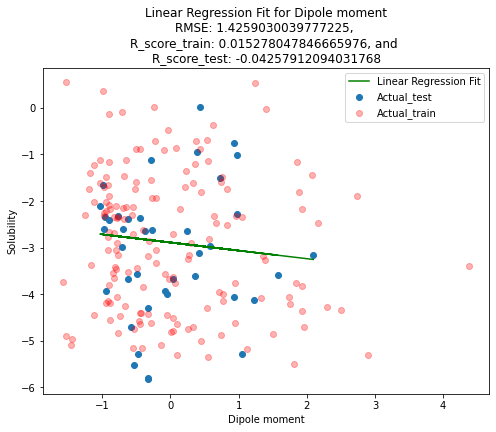

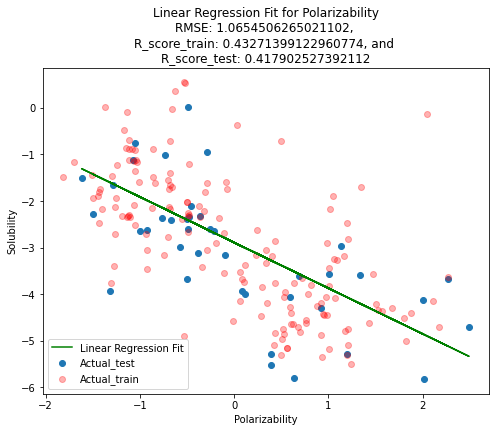

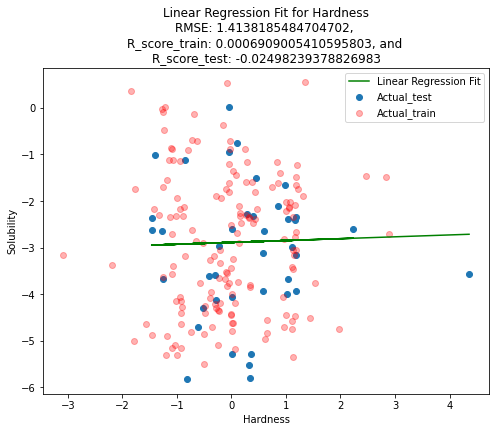

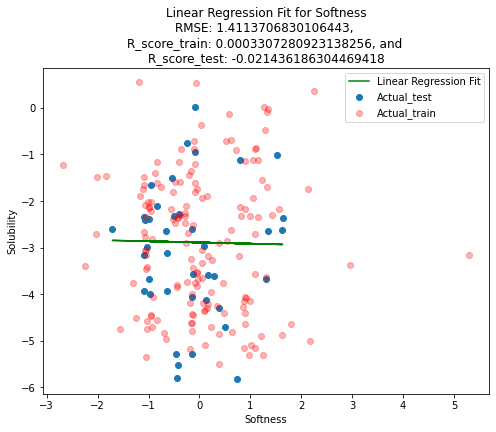

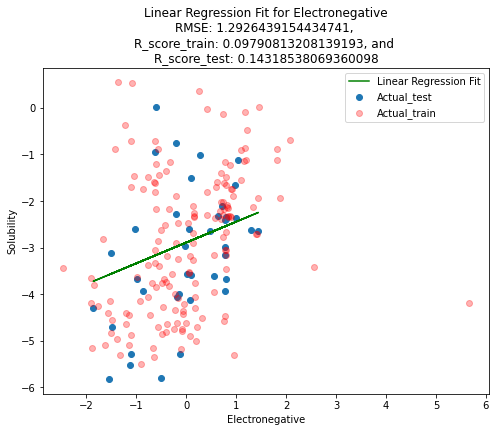

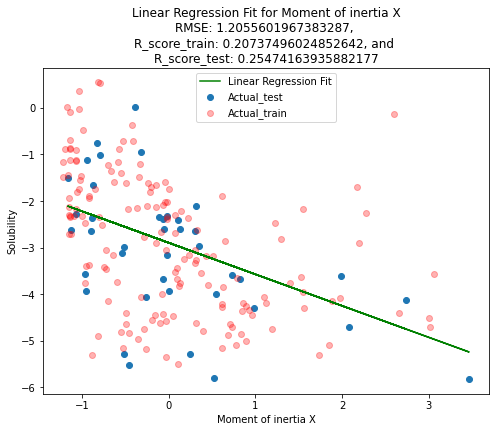

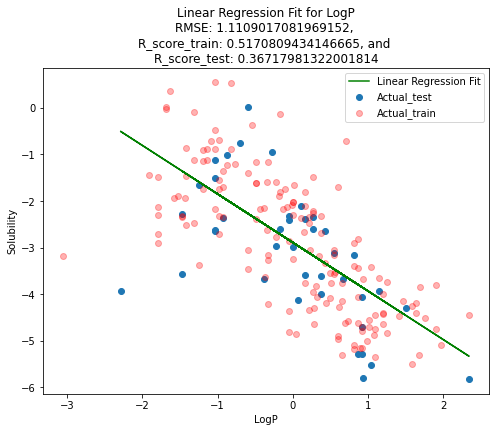

In [21]:
lr = LinearRegression()

# Fit the Linear Regression model and get predictions for each feature
for feature in X_train.columns:
    feature_train = X_train[feature].values.reshape(-1, 1)
    feature_test = X_test[feature].values.reshape(-1, 1)
    
    # fit model
    lr.fit(feature_train, y_train)
    
    #predict model
    lr_predictions_train = lr.predict(feature_train)
    lr_predictions_test = lr.predict(feature_test)
    
    #mse
    lr_rmse = mean_squared_error(y_test, lr_predictions_test, squared=False)
    
    #R2_score
    lr_r2_train = r2_score(y_train, lr_predictions_train)
    lr_r2_test = r2_score(y_test, lr_predictions_test)
    
    #plot
    plt.figure(figsize=(8, 6))
    plt.scatter(feature_test, y_test, label='Actual_test')
    plt.scatter(feature_train, y_train, label='Actual_train',color='r',alpha=0.3)
    plt.plot(feature_test, lr_predictions_test, label='Linear Regression Fit', color='g')
    plt.xlabel(feature)
    plt.ylabel('Solubility')
    plt.title(f'Linear Regression Fit for {feature}\nRMSE: {lr_rmse}, \nR_score_train: {lr_r2_train}, and \nR_score_test: {lr_r2_test}')
    plt.legend()
    plt.show()

### 3.1.2 calculate AIC,CP,MSE,R2_SCORE for each feature

In [22]:
lr = LinearRegression()

aic_values = []
cp_values = []

# Fit model with different features
for feature in X_train.columns:
    X_train_subset = X_train[feature].values.reshape(-1, 1)
    
    # Fit the model
    lr.fit(X_train_subset, y_train)
    lr_predictions = lr.predict(X_train_subset)
    
    # Calculate AIC
    mse = mean_squared_error(y_train, lr_predictions)
    k = 2  # Number of parameters (intercept + 1 coefficient)
    n = len(y_train)
    aic = n * np.log(mse) + 2 * k
    aic_values.append(aic)
    
    # Calculate Mallows' Cp using cross-validation
    cp = np.mean(cross_val_score(lr, X_train_subset, y_train, scoring='neg_mean_squared_error', cv=5)) + 2 * k
    cp_values.append(cp)

# AIC and CP values for each feature
for i, feature in enumerate(X_train.columns):
    print(f"Feature: {feature}, AIC: {aic_values[i]}, Cp: {cp_values[i]}")

    

Feature: Volume, AIC: 65.74292628201334, Cp: 2.5070200809989593
Feature: Dipole moment, AIC: 125.00936800838517, Cp: 1.7934632725928124
Feature: Polarizability, AIC: 37.321548837223546, Cp: 2.7416657200900794
Feature: Hardness, AIC: 127.34743445423328, Cp: 1.781424532573023
Feature: Softness, AIC: 127.40473114217207, Cp: 1.782291028987566
Feature: Electronegative, AIC: 111.07413812600335, Cp: 1.9354635136418712
Feature: Moment of inertia X, AIC: 90.50492952373075, Cp: 2.234116930474091
Feature: LogP, AIC: 11.720235977380955, Cp: 2.9123452211673024


# Now let's plot the result:

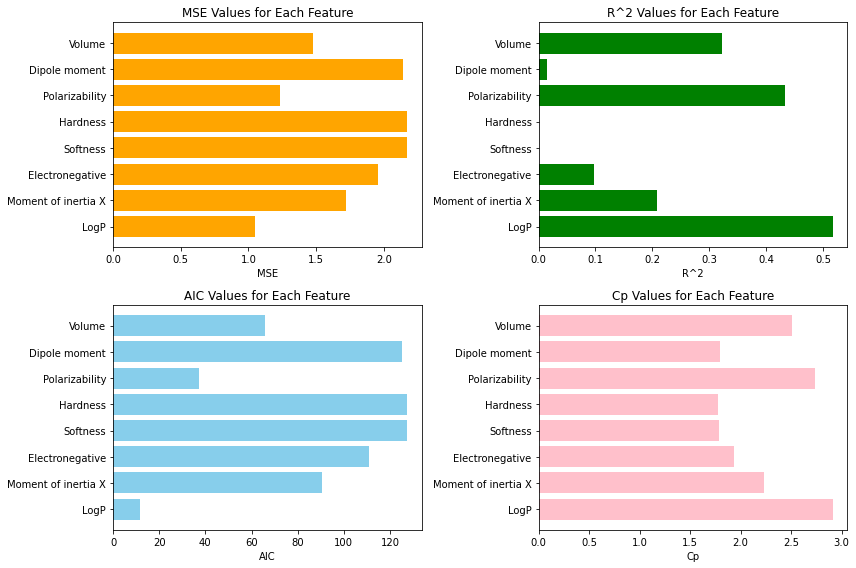

In [23]:
lr = LinearRegression()

# Initialize lists to store evaluation metrics for each feature
mse_values = []
r2_values = []
aic_values = []
cp_values = []
features = X_train.columns

# Calculate evaluation metrics for each feature
for feature in features:
    X_train_subset = X_train[[feature]]
    
    # Fit Linear Regression model
    lr.fit(X_train_subset, y_train)
    lr_predictions = lr.predict(X_train_subset)
    
    # Calculate MSE and R^2 for the feature
    mse = mean_squared_error(y_train, lr_predictions)
    r2 = r2_score(y_train, lr_predictions)
    
    # Calculate AIC
    k = 2  # Number of parameters (intercept + 1 coefficient)
    n = len(y_train)
    aic = n * np.log(mse) + 2 * k
    
    # Calculate Cp using cross-validation
    cp = np.mean(cross_val_score(lr, X_train_subset, y_train, scoring='neg_mean_squared_error', cv=5)) + 2 * k
    
    # Append the values to the lists
    mse_values.append(mse)
    r2_values.append(r2)
    aic_values.append(aic)
    cp_values.append(cp)

# Create subplots for each metric
plt.figure(figsize=(12, 8))

# Plot MSE values
plt.subplot(2, 2, 1)
plt.barh(features, mse_values, color='orange')
plt.xlabel('MSE')
plt.title('MSE Values for Each Feature')
plt.gca().invert_yaxis()

# Plot R^2 values
plt.subplot(2, 2, 2)
plt.barh(features, r2_values, color='green')
plt.xlabel('R^2')
plt.title('R^2 Values for Each Feature')
plt.gca().invert_yaxis()

# Plot AIC values
plt.subplot(2, 2, 3)
plt.barh(features, aic_values, color='skyblue')
plt.xlabel('AIC')
plt.title('AIC Values for Each Feature')
plt.gca().invert_yaxis()

# Plot Cp values
plt.subplot(2, 2, 4)
plt.barh(features, cp_values, color='pink')
plt.xlabel('Cp')
plt.title('Cp Values for Each Feature')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Based on these plots we can see model with feature: Volume, Polarizability, and LogP has better accuracy and less AIC and MSE:

### 3.1.3 Feature selection

# Let's generate graphs depicting the relationship between the number of features and the corresponding accuracy. By varying the number of features, we aim to discern whether increasing or decreasing them has an impact on enhancing the model's accuracy. PCA can assist in reducing the dimensionality of the features while retaining essential information. This can be particularly helpful in assessing how the variation in the number of features affects the model's accuracy.

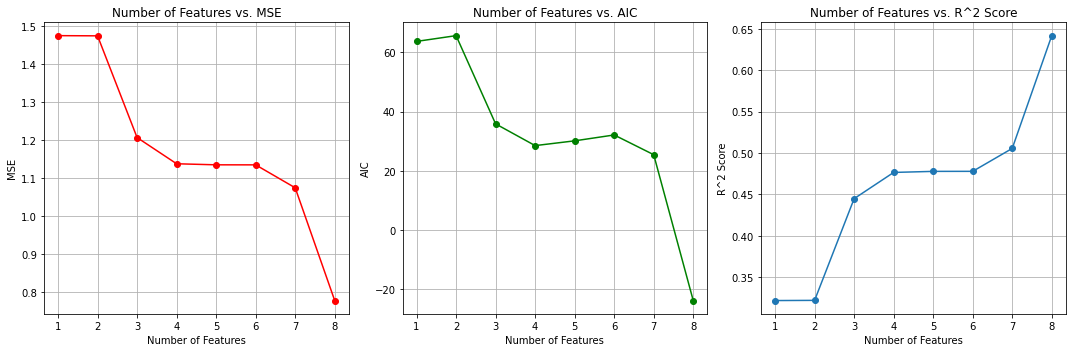

In [24]:
lr = LinearRegression()

mse_values = []  # To store MSE values
aic_values = []  # To store AIC values
r2_values = []   # To store R^2 scores
num_features = range(1, len(X_train.columns) + 1)

for k in num_features:
    # Fit the model with k features
    lr.fit(X_train.iloc[:, :k], y_train)
    lr_predictions = lr.predict(X_train.iloc[:, :k])
    mse = mean_squared_error(y_train, lr_predictions)
    
    n_train = len(y_train)
    p = k  # Number of predictors
    aic = n_train * np.log(mse) + 2 * p
    
    r2 = r2_score(y_train, lr_predictions)
    
    mse_values.append(mse)
    aic_values.append(aic)
    r2_values.append(r2)

# Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(num_features, mse_values, marker='o', linestyle='-',color='r')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.title('Number of Features vs. MSE')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(num_features, aic_values, marker='o', linestyle='-',color='green')
plt.xlabel('Number of Features')
plt.ylabel('AIC')
plt.title('Number of Features vs. AIC')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(num_features, r2_values, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.title('Number of Features vs. R^2 Score')
plt.grid(True)

plt.tight_layout()
plt.show()

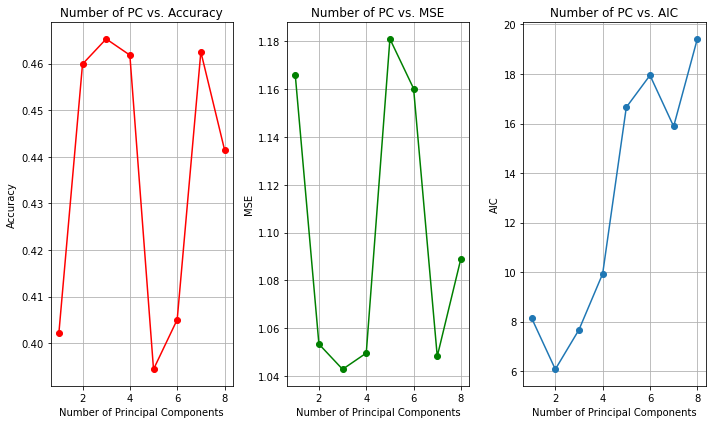

In [25]:
# PCA
n_components_range = range(1, len(X.columns) + 1)

accuracy_scores = []
mse_scores = []
aic_scores = []

for n in n_components_range:
    # Initializing PCA and fitting it to the training data
    pca = PCA(n_components=n)
    pca.fit(X_train)

    # Transforming the training and testing data using PCA
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Fitting a Linear Regression model on the transformed data
    lr = LinearRegression()
    lr.fit(X_train_pca, y_train)

    # Predictions on the test set
    lr_predictions = lr.predict(X_test_pca)

    # Calculating R^2 score, MSE, and AIC
    accuracy_scores.append(lr.score(X_test_pca, y_test))
    mse_scores.append(mean_squared_error(y_test, lr_predictions))
    
    n_samples = len(y_test)
    p = n  # Number of predictors
    aic = n_samples * np.log(mse_scores[-1]) + 2 * p
    aic_scores.append(aic)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.plot(n_components_range, accuracy_scores, marker='o',color='r')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Number of PC vs. Accuracy')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(n_components_range, mse_scores, marker='o',color='g')
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Number of PC vs. MSE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(n_components_range, aic_scores, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('AIC')
plt.title('Number of PC vs. AIC')
plt.grid(True)

plt.tight_layout()
plt.show()

# We observe that having three principal components (PCs) leads to improved accuracy.

# Let's implement cross-validation to evaluate our model. Cross-validation stands as a vital technique in machine learning, repeatedly dividing the data into distinct train-test sets to provide a more dependable measure of the model's ability to generalize to unseen data. Here I used 3 different models of Cross validations.

### 3.1.4 Cross_Validation

In [26]:

lr = LinearRegression()

# List of different cross-validation strategies
cv_strategies = [
    ("K-Fold", KFold(n_splits=3)),
    ("Shuffle Split", ShuffleSplit(n_splits=10)),
    ("Repeated K-Fold", RepeatedKFold(n_splits=2, n_repeats=2))
]

for name, cv in cv_strategies:
    # Calculating R^2 scores using cross-validation
    r2_scores = cross_val_score(lr, X, y, cv=cv, scoring='r2')
    mean_r2 = np.mean(r2_scores)

    # Calculating MSE using cross-validation
    mse_scores = -cross_val_score(lr, X, y, cv=cv, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)

    # Calculating AIC using cross-validation
    n = len(y)
    p = X.shape[1]  # Number of predictors
    aic_scores = n * np.log(mse_scores) + 2 * p
    mean_aic = np.mean(aic_scores)

    # Print mean scores for each cross-validation strategy
    print(f"{name} Cross-Validated R^2 Score: {mean_r2}")
    print(f"{name} Cross-Validated MSE: {mean_mse}")
    print(f"{name} Cross-Validated AIC: {mean_aic}")
    print("\n")

K-Fold Cross-Validated R^2 Score: -0.7316975277337859
K-Fold Cross-Validated MSE: 1.3006808661478606
K-Fold Cross-Validated AIC: 57.05451541309591


Shuffle Split Cross-Validated R^2 Score: 0.5172652606572177
Shuffle Split Cross-Validated MSE: 0.9734201213027249
Shuffle Split Cross-Validated AIC: 7.301606124109924


Repeated K-Fold Cross-Validated R^2 Score: 0.5433388375271135
Repeated K-Fold Cross-Validated MSE: 1.041021085356058
Repeated K-Fold Cross-Validated AIC: 18.39666585846107




# Another alternative method to partition our data involves employing bootstrapping techniques.

### 3.1.5 Bootstrapping

In [27]:
lr = LinearRegression()

n_iterations = 1000  # Number of bootstrap iterations
n_samples = len(X)

r2_scores = []
mse_scores = []
aic_scores = []

for _ in range(n_iterations):
    # Bootstrap resampling
    X_boot, y_boot = resample(X, y, n_samples=n_samples, replace=True)
    
    # Fit the model
    lr.fit(X_boot, y_boot)
    lr_predictions = lr.predict(X_boot)
    
    # Calculate R^2 score
    r2 = r2_score(y_boot, lr_predictions)
    r2_scores.append(r2)

    # Calculate MSE
    mse = mean_squared_error(y_boot, lr_predictions)
    mse_scores.append(mse)

    # Calculate AIC
    p = X.shape[1]  # Number of predictors
    aic = n_samples * np.log(mse) + 2 * p
    aic_scores.append(aic)

# Calculate mean scores
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_aic = np.mean(aic_scores)

# Print result
print(f"Bootstrapped R^2 Score: {mean_r2}")
print(f"Bootstrapped MSE: {mean_mse}")
print(f"Bootstrapped AIC: {mean_aic}")


Bootstrapped R^2 Score: 0.6310579858546361
Bootstrapped MSE: 0.7833758296891886
Bootstrapped AIC: -34.54236535762966


#  From the analysis of all models, it's evident that linear regression's predictive accuracy lingers around 60% in training and 50% in testing, indicating its limitations. Considering this, I'm inclined to explore alternative models such as Lasso and Ridge regression. These models might not yield significantly improved predictions since they're designed to mitigate the impact of certain features, particularly Lasso, which can nullify the effect of specific features altogether. Nonetheless, investigating these models could provide valuable insights into feature selection and model performance beyond linear regression's limitations.

## 3.2. Ridge and Lasso Regression

In [82]:
from sklearn.linear_model import Ridge, Lasso

# Initialize Ridge and Lasso models
ridge = Ridge(alpha=10)  
lasso = Lasso(alpha=.01)  

# Fit Ridge model to the training data
ridge.fit(X_train, y_train)

# Predictions on training and testing data for Ridge
ridge_train_predictions = ridge.predict(X_train)
ridge_test_predictions = ridge.predict(X_test)

# Calculate RMSE for train and test for Ridge
ridge_train_rmse = mean_squared_error(y_train, ridge_train_predictions, squared=False)
ridge_test_rmse = mean_squared_error(y_test, ridge_test_predictions, squared=False)

# Calculate R^2 for train and test for Ridge
ridge_train_r2 = r2_score(y_train, ridge_train_predictions)
ridge_test_r2 = r2_score(y_test, ridge_test_predictions)

# Calculate AIC for train and test for Ridge
mse_train_ridge = mean_squared_error(y_train, ridge_train_predictions)
mse_test_ridge = mean_squared_error(y_test, ridge_test_predictions)
aic_train_ridge = len(y_train) * np.log(mse_train_ridge) + 2 * len(X_train.columns)
aic_test_ridge = len(y_test) * np.log(mse_test_ridge) + 2 * len(X_test.columns)

# Fit Lasso model to the training data
lasso.fit(X_train, y_train)

# Predictions on training and testing data for Lasso
lasso_train_predictions = lasso.predict(X_train)
lasso_test_predictions = lasso.predict(X_test)

# Calculate RMSE for train and test for Lasso
lasso_train_rmse = mean_squared_error(y_train, lasso_train_predictions, squared=False)
lasso_test_rmse = mean_squared_error(y_test, lasso_test_predictions, squared=False)

# Calculate R^2 for train and test for Lasso
lasso_train_r2 = r2_score(y_train, lasso_train_predictions)
lasso_test_r2 = r2_score(y_test, lasso_test_predictions)

# Calculate AIC for train and test for Lasso
mse_train_lasso = mean_squared_error(y_train, lasso_train_predictions)
mse_test_lasso = mean_squared_error(y_test, lasso_test_predictions)
aic_train_lasso = len(y_train) * np.log(mse_train_lasso) + 2 * len(X_train.columns)
aic_test_lasso = len(y_test) * np.log(mse_test_lasso) + 2 * len(X_test.columns)

# Display results for Ridge
print("Ridge Regression Train Metrics:")
print(f"Ridge Regression Train RMSE: {ridge_train_rmse}")
print(f"Ridge Regression Train R^2 score: {ridge_train_r2}")
print(f"Ridge Regression Train AIC: {aic_train_ridge}")

print("\nRidge Regression Test Metrics:")
print(f"Ridge Regression Test RMSE: {ridge_test_rmse}")
print(f"Ridge Regression Test R^2 score: {ridge_test_r2}")
print(f"Ridge Regression Test AIC: {aic_test_ridge}")

# Display results for Lasso
print("\nLasso Regression Train Metrics:")
print(f"Lasso Regression Train RMSE: {lasso_train_rmse}")
print(f"Lasso Regression Train R^2 score: {lasso_train_r2}")
print(f"Lasso Regression Train AIC: {aic_train_lasso}")

print("\nLasso Regression Test Metrics:")
print(f"Lasso Regression Test RMSE: {lasso_test_rmse}")
print(f"Lasso Regression Test R^2 score: {lasso_test_r2}")
print(f"Lasso Regression Test AIC: {aic_test_lasso}")


Ridge Regression Train Metrics:
Ridge Regression Train RMSE: 0.9100689231658426
Ridge Regression Train R^2 score: 0.618990531527436
Ridge Regression Train AIC: -13.966711745739982

Ridge Regression Test Metrics:
Ridge Regression Test RMSE: 0.9798664513703744
Ridge Regression Test R^2 score: 0.5076625946446746
Ridge Regression Test AIC: 14.372880742756585

Lasso Regression Train Metrics:
Lasso Regression Train RMSE: 0.8875637632552714
Lasso Regression Train R^2 score: 0.6376015550939914
Lasso Regression Train AIC: -21.929422744833182

Lasso Regression Test Metrics:
Lasso Regression Test RMSE: 0.9837715436274587
Lasso Regression Test R^2 score: 0.5037305197554016
Lasso Regression Test AIC: 14.691073600314047


# As previously noted, Ridge regression demonstrates a prediction performance similar to linear regression, while Lasso exhibits notably poorer predictive capability. This observation leads us to question the suitability of linear models as estimators for this dataset. However, for the sake of exploring these models further, let's manipulate the alpha hyperparameter and observe its impact on predictions. This variation in the alpha hyperparameter will help us discern how its adjustments influence the predictive outcomes of both Ridge and Lasso regression models.







### 3.2.1. Choosing Alpha

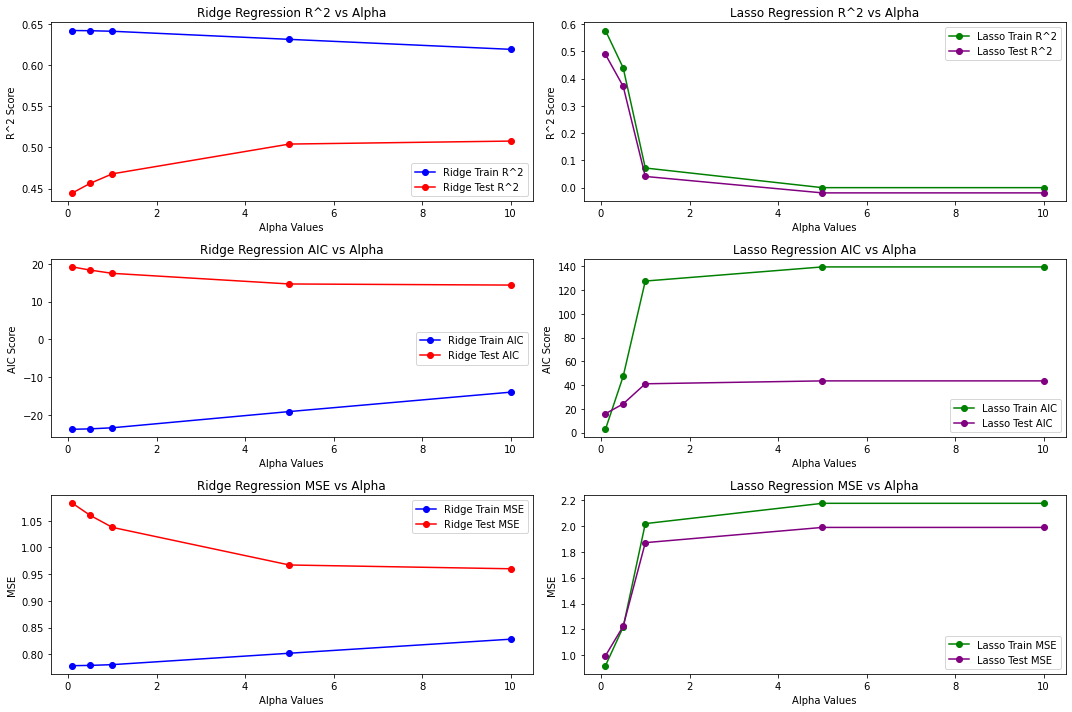

In [29]:
alpha_values = [0.1, 0.5, 1, 5, 10]  # alpha values to test
ridge_train_r2_values = []
ridge_test_r2_values = []
ridge_train_mse_values = []
ridge_test_mse_values = []
ridge_train_aic_values = []
ridge_test_aic_values = []

lasso_train_r2_values = []
lasso_test_r2_values = []
lasso_train_mse_values = []
lasso_test_mse_values = []
lasso_train_aic_values = []
lasso_test_aic_values = []

# Loop through different alpha values
for alpha in alpha_values:
    # Initialize Ridge and Lasso models with varying alpha
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    
    # Fit Ridge and Lasso models to the training data
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    
    # Predictions for Ridge and Lasso on training and testing data
    ridge_train_predictions = ridge.predict(X_train)
    ridge_test_predictions = ridge.predict(X_test)
    lasso_train_predictions = lasso.predict(X_train)
    lasso_test_predictions = lasso.predict(X_test)
    
    # Calculate R^2, MSE, and AIC for Ridge and Lasso
    ridge_train_r2_values.append(r2_score(y_train, ridge_train_predictions))
    ridge_test_r2_values.append(r2_score(y_test, ridge_test_predictions))
    ridge_train_mse_values.append(mean_squared_error(y_train, ridge_train_predictions))
    ridge_test_mse_values.append(mean_squared_error(y_test, ridge_test_predictions))
    ridge_train_aic_values.append(len(y_train) * np.log(mean_squared_error(y_train, ridge_train_predictions)) + 2 * len(X_train.columns))
    ridge_test_aic_values.append(len(y_test) * np.log(mean_squared_error(y_test, ridge_test_predictions)) + 2 * len(X_test.columns))
    
    lasso_train_r2_values.append(r2_score(y_train, lasso_train_predictions))
    lasso_test_r2_values.append(r2_score(y_test, lasso_test_predictions))
    lasso_train_mse_values.append(mean_squared_error(y_train, lasso_train_predictions))
    lasso_test_mse_values.append(mean_squared_error(y_test, lasso_test_predictions))
    lasso_train_aic_values.append(len(y_train) * np.log(mean_squared_error(y_train, lasso_train_predictions)) + 2 * len(X_train.columns))
    lasso_test_aic_values.append(len(y_test) * np.log(mean_squared_error(y_test, lasso_test_predictions)) + 2 * len(X_test.columns))

plt.figure(figsize=(15, 10))

# R^2 Scores
plt.subplot(3, 2, 1)
plt.plot(alpha_values, ridge_train_r2_values, marker='o', label='Ridge Train R^2', color='blue')
plt.plot(alpha_values, ridge_test_r2_values, marker='o', label='Ridge Test R^2', color='red')
plt.xlabel('Alpha Values')
plt.ylabel('R^2 Score')
plt.title('Ridge Regression R^2 vs Alpha')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(alpha_values, lasso_train_r2_values, marker='o', label='Lasso Train R^2', color='green')
plt.plot(alpha_values, lasso_test_r2_values, marker='o', label='Lasso Test R^2', color='purple')
plt.xlabel('Alpha Values')
plt.ylabel('R^2 Score')
plt.title('Lasso Regression R^2 vs Alpha')
plt.legend()

# AIC Scores
plt.subplot(3, 2, 3)
plt.plot(alpha_values, ridge_train_aic_values, marker='o', label='Ridge Train AIC', color='blue')
plt.plot(alpha_values, ridge_test_aic_values, marker='o', label='Ridge Test AIC', color='red')
plt.xlabel('Alpha Values')
plt.ylabel('AIC Score')
plt.title('Ridge Regression AIC vs Alpha')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(alpha_values, lasso_train_aic_values, marker='o', label='Lasso Train AIC', color='green')
plt.plot(alpha_values, lasso_test_aic_values, marker='o', label='Lasso Test AIC', color='purple')
plt.xlabel('Alpha Values')
plt.ylabel('AIC Score')
plt.title('Lasso Regression AIC vs Alpha')
plt.legend()

# MSE Scores
plt.subplot(3, 2, 5)
plt.plot(alpha_values, ridge_train_mse_values, marker='o', label='Ridge Train MSE', color='blue')
plt.plot(alpha_values, ridge_test_mse_values, marker='o', label='Ridge Test MSE', color='red')
plt.xlabel('Alpha Values')
plt.ylabel('MSE')
plt.title('Ridge Regression MSE vs Alpha')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(alpha_values, lasso_train_mse_values, marker='o', label='Lasso Train MSE', color='green')
plt.plot(alpha_values, lasso_test_mse_values, marker='o', label='Lasso Test MSE', color='purple')
plt.xlabel('Alpha Values')
plt.ylabel('MSE')
plt.title('Lasso Regression MSE vs Alpha')
plt.legend()

plt.tight_layout()
plt.show()


# It becomes evident that setting the alpha parameter to zero effectively removes the Lasso regularization, resulting in an improved outcome. Conversely, when setting the alpha for Ridge regression to 10, we observe an enhancement in the model's performance. This adjustment highlights the influence of alpha values on the predictive power of these models, showcasing how tweaking these parameters can significantly impact the outcomes.

# I tried using polynomial features in our linear models, but I'm not confident it'll improve results. Still, I set the polynomial order to 2 and added these new features to the linear, Ridge, and Lasso models for predictions. Let's see if this makes any difference in their performance.

### 3.2.2. Polynomial Feature for Linear, Ridge, and Lasso

In [30]:
# Creating polynomial features of degree 2
poly = PolynomialFeatures(degree=2)

# Transforming the data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize models
linear_reg = make_pipeline(PolynomialFeatures(2), LinearRegression())
ridge_reg = make_pipeline(PolynomialFeatures(2), Ridge(alpha=0.8))
lasso_reg = make_pipeline(PolynomialFeatures(2), Lasso(alpha=0.6))

# Fit models
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Predictions
linear_predictions = linear_reg.predict(X_test)
ridge_predictions = ridge_reg.predict(X_test)
lasso_predictions = lasso_reg.predict(X_test)

#  RMSE for Linear Regression
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
#  R^2 for Linear Regression
linear_r2 = r2_score(y_test, linear_predictions)
#  AIC for Linear Regression
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_aic = len(y_test) * np.log(linear_mse) + 2 * len(X_test.columns)

#  RMSE for Ridge Regression
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
#  R^2 for Ridge Regression
ridge_r2 = r2_score(y_test, ridge_predictions)
#  AIC for Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_aic = len(y_test) * np.log(ridge_mse) + 2 * len(X_test.columns)

#  RMSE for Lasso Regression
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
#  R^2 for Lasso Regression
lasso_r2 = r2_score(y_test, lasso_predictions)
#  AIC for Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_aic = len(y_test) * np.log(lasso_mse) + 2 * len(X_test.columns)

# results
print("Linear Regression Metrics:")
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Linear Regression R^2 score: {linear_r2}")
print(f"Linear Regression AIC: {linear_aic}\n")

print("Ridge Regression Metrics:")
print(f"Ridge Regression RMSE: {ridge_rmse}")
print(f"Ridge Regression R^2 score: {ridge_r2}")
print(f"Ridge Regression AIC: {ridge_aic}\n")

print("Lasso Regression Metrics:")
print(f"Lasso Regression RMSE: {lasso_rmse}")
print(f"Lasso Regression R^2 score: {lasso_r2}")
print(f"Lasso Regression AIC: {lasso_aic}")


Linear Regression Metrics:
Linear Regression RMSE: 4.050315592970643
Linear Regression R^2 score: -7.412145645342262
Linear Regression AIC: 127.90358418182383

Ridge Regression Metrics:
Ridge Regression RMSE: 1.1979909021219162
Ridge Regression R^2 score: 0.2640706980303239
Ridge Regression AIC: 30.45167243538517

Lasso Regression Metrics:
Lasso Regression RMSE: 1.1581135129618976
Lasso Regression R^2 score: 0.3122488686274544
Lasso Regression AIC: 27.743391948555225


# It seems like using polynomial features made the predictions worse, indicating that it's not a beneficial approach for this dataset.

# Okay! Now let's try another model, so here I used Decision Tree and fix max_depth to 3, we know if we choose this number bigger that's cause overfitting and we will get high prediction in train but low prediction in test!

## 3.3. Decision Tree

In [31]:
# Decision Tree model
dt = DecisionTreeRegressor(max_depth=3)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Predictions on training and testing data
dt_train_predictions = dt.predict(X_train)
dt_test_predictions = dt.predict(X_test)

# Calculate RMSE for train and test
dt_train_rmse = mean_squared_error(y_train, dt_train_predictions, squared=False)
dt_test_rmse = mean_squared_error(y_test, dt_test_predictions, squared=False)

# Calculate R^2 for train and test
dt_train_r2 = r2_score(y_train, dt_train_predictions)
dt_test_r2 = r2_score(y_test, dt_test_predictions)

# Calculate AIC for train and test
n_train = len(y_train)
n_test = len(y_test)
p = X_train.shape[1]  # Number of features
mse_train = mean_squared_error(y_train, dt_train_predictions)
mse_test = mean_squared_error(y_test, dt_test_predictions)
aic_train = n_train * np.log(mse_train) + 2 * p
aic_test = n_test * np.log(mse_test) + 2 * p

# results
print("Train Metrics:")
print(f"Decision Tree Train RMSE: {dt_train_rmse}")
print(f"Decision Tree Train R^2 score: {dt_train_r2}")
print(f"Decision Tree Train AIC: {aic_train}")

print("\nTest Metrics:")
print(f"Decision Tree Test RMSE: {dt_test_rmse}")
print(f"Decision Tree Test R^2 score: {dt_test_r2}")
print(f"Decision Tree Test AIC: {aic_test}")


Train Metrics:
Decision Tree Train RMSE: 0.7751243200609379
Decision Tree Train R^2 score: 0.7236051629024765
Decision Tree Train AIC: -65.00472814472738

Test Metrics:
Decision Tree Test RMSE: 0.8399915344603079
Decision Tree Test R^2 score: 0.6381914097801735
Decision Tree Test AIC: 2.0509227824796596


# As you can see this model has a very better predictions than linear regression models. Now let's plot trees for train and test.

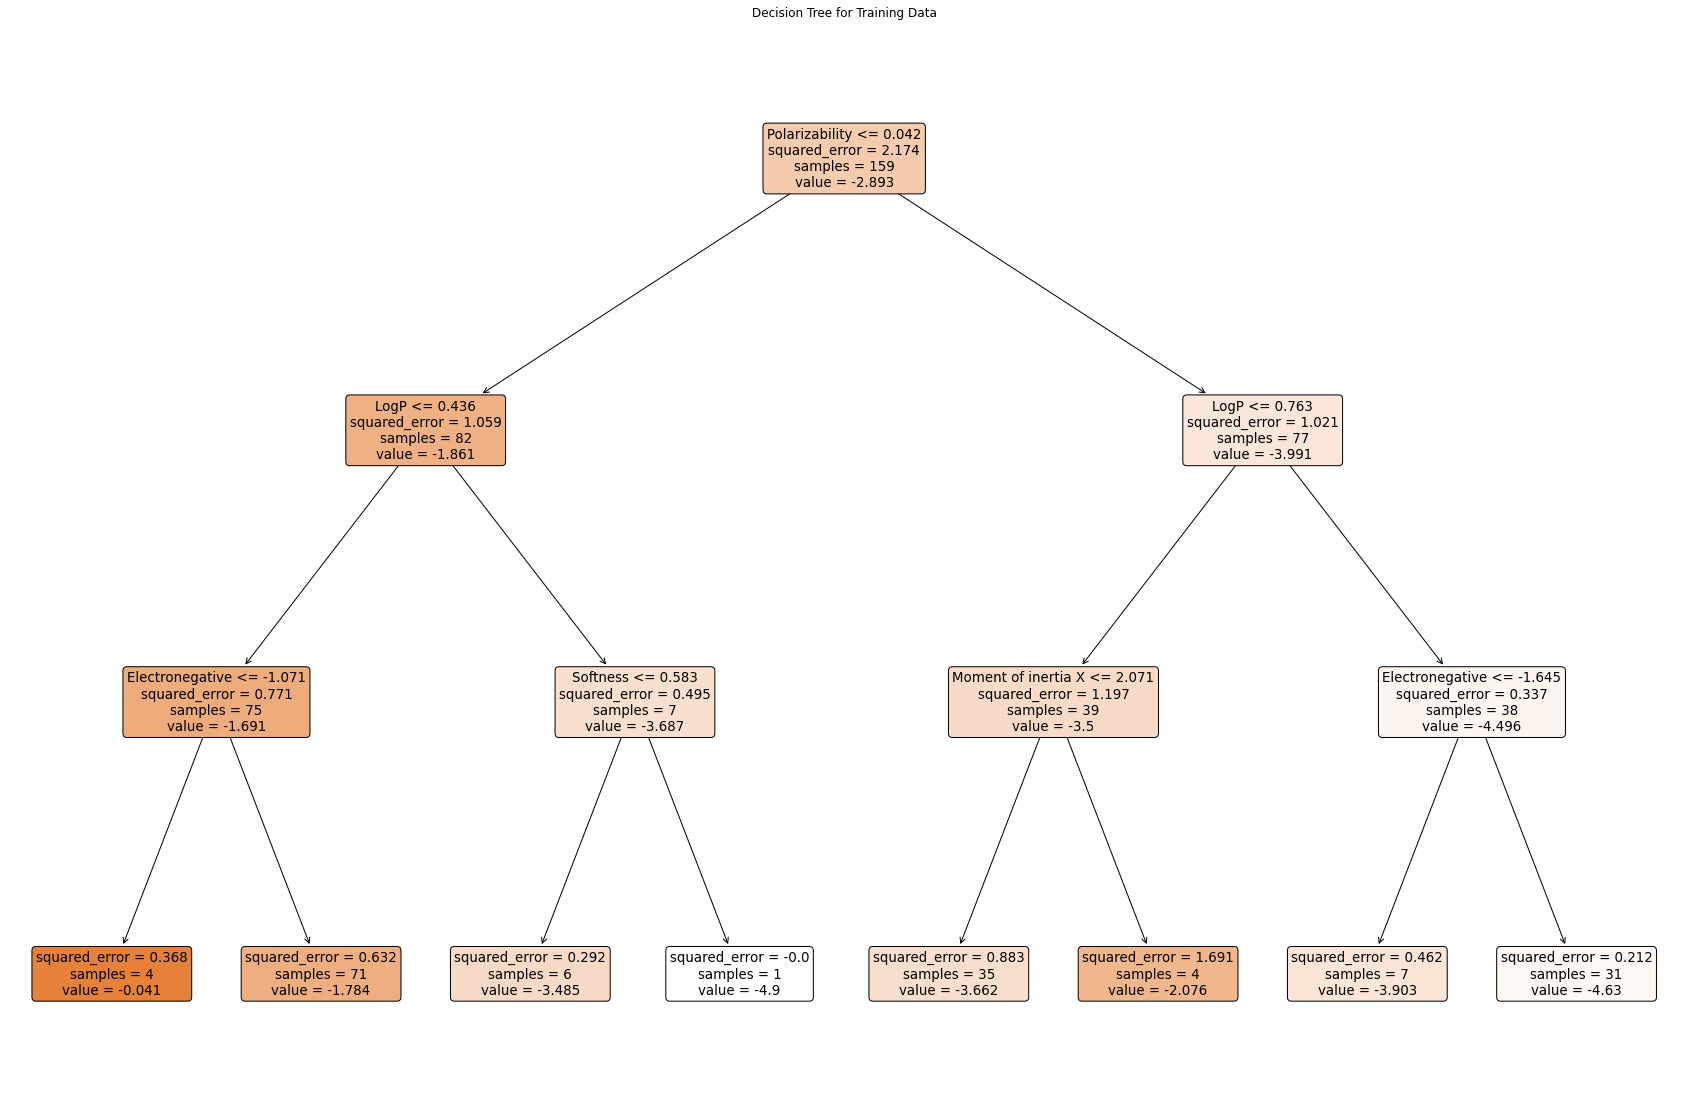

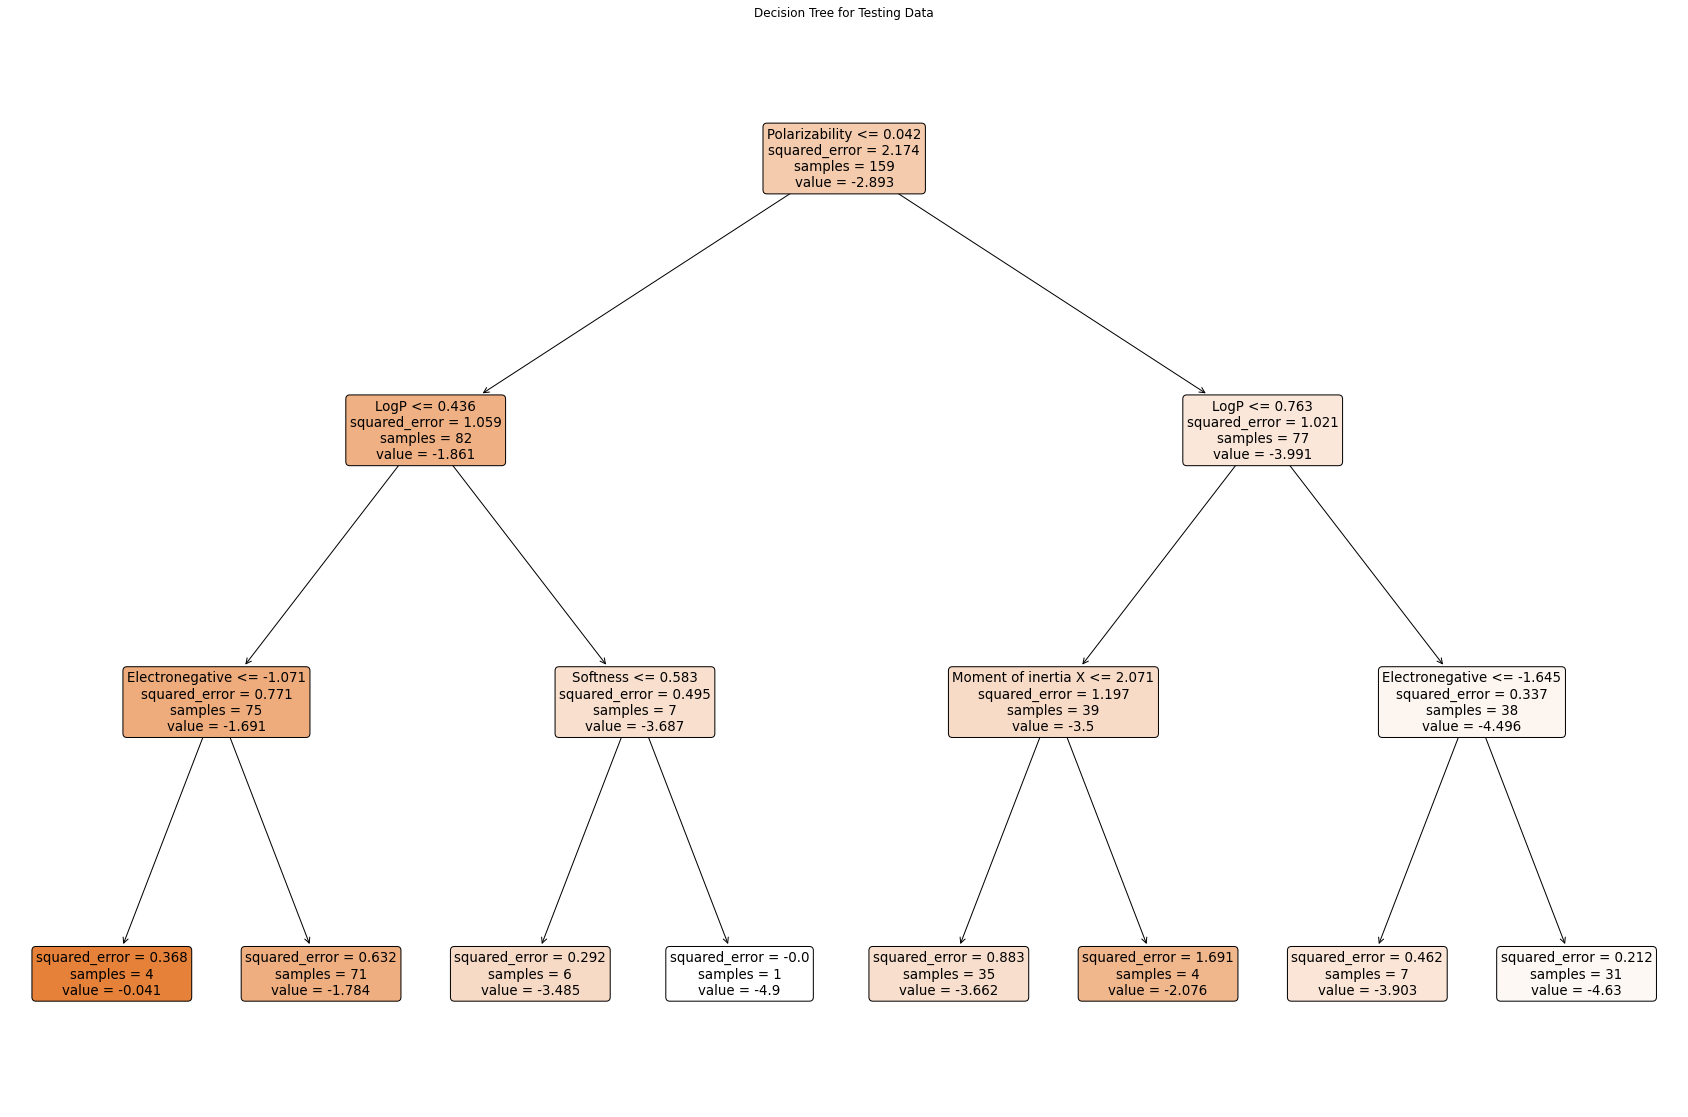

In [32]:
# Fit the model to the training data
dt.fit(X_train, y_train)


# Plotting the Decision Tree for training data
plt.figure(figsize=(30, 20))
plot_tree(dt, feature_names=X_train.columns, filled=True, rounded=True)
plt.title('Decision Tree for Training Data')
plt.show()

# Plotting the Decision Tree for testing data
plt.figure(figsize=(30, 20))
plot_tree(dt, feature_names=X_test.columns, filled=True, rounded=True)
plt.title('Decision Tree for Testing Data')
plt.show()


### 3.3.1 Decision Tree max_depth

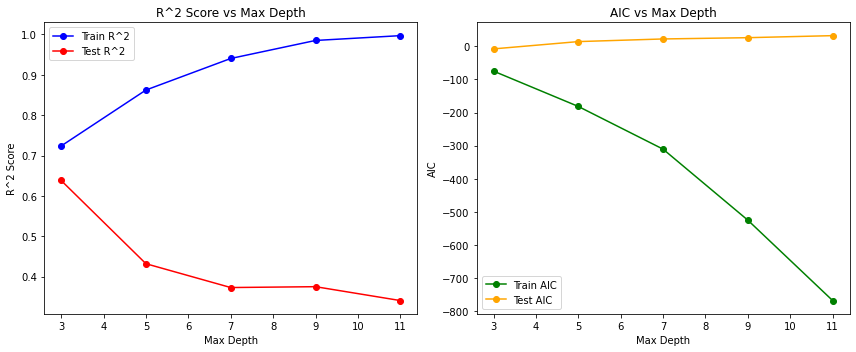

In [85]:
train_r2_scores = []
test_r2_scores = []
train_aic_scores = []
test_aic_scores = []
max_depths = [3, 5, 7, 9, 11]  # maximum depths

for depth in max_depths:
    #  Decision Tree model
    dt = DecisionTreeRegressor(max_depth=depth)
    
    # Fit the model to the training data
    dt.fit(X_train, y_train)
    
    # Predictions for training and testing data
    train_predictions = dt.predict(X_train)
    test_predictions = dt.predict(X_test)
    
    # Calculate R^2 for train and test
    r2_train = r2_score(y_train, train_predictions)
    r2_test = r2_score(y_test, test_predictions)
    
    # Calculate AIC for train and test
    mse_train = mean_squared_error(y_train, train_predictions)
    mse_test = mean_squared_error(y_test, test_predictions)
    aic_train = len(y_train) * np.log(mse_train) + 2 * depth
    aic_test = len(y_test) * np.log(mse_test) + 2 * depth
    
    # Append R^2 and AIC scores to lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)
    train_aic_scores.append(aic_train)
    test_aic_scores.append(aic_test)

# Plotting R^2 scores based on maximum depth
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(max_depths, train_r2_scores, marker='o', label='Train R^2', color='blue')
plt.plot(max_depths, test_r2_scores, marker='o', label='Test R^2', color='red')
plt.xlabel('Max Depth')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Max Depth')
plt.legend()

# Plotting AIC scores based on maximum depth
plt.subplot(1, 2, 2)
plt.plot(max_depths, train_aic_scores, marker='o', label='Train AIC', color='green')
plt.plot(max_depths, test_aic_scores, marker='o', label='Test AIC', color='orange')
plt.xlabel('Max Depth')
plt.ylabel('AIC')
plt.title('AIC vs Max Depth')
plt.legend()

plt.tight_layout()
plt.show()


# as the tree depth increases, the accuracy on the training set rises, but the accuracy on the test set decreases significantly. It's apparent that setting the maximum depth to 3 yields the best performance for this dataset.

### 3.3.2 Decision Tree best number of features

# For this model again, I tried to see what is the best number of features and as you can see the best prediction is when we use all features in our dataset.

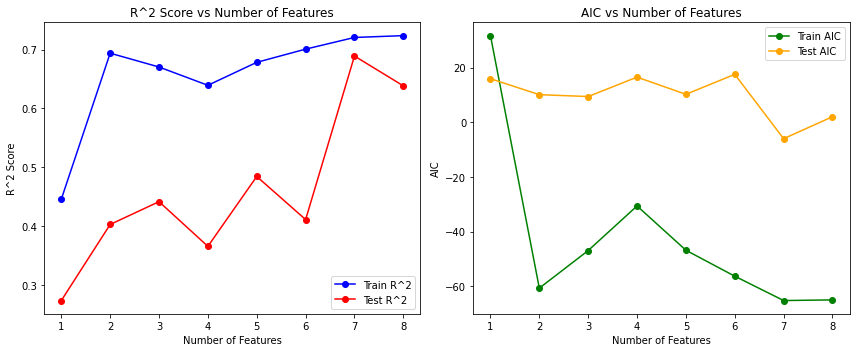

In [34]:
train_r2_scores = []
test_r2_scores = []
train_aic_scores = []
test_aic_scores = []
max_features = len(X_train.columns)  #  the number of features in  dataset

num_features = list(range(1, max_features + 1))  # Vary the number of features from 1 to the maximum available

for features in num_features:
    # Decision Tree model
    dt = DecisionTreeRegressor(max_features=features,max_depth=3)
    
    # Fit the model to the training data
    dt.fit(X_train, y_train)
    
    # Predictions for training and testing data
    train_predictions = dt.predict(X_train)
    test_predictions = dt.predict(X_test)
    
    # Calculate R^2 for train and test
    r2_train = r2_score(y_train, train_predictions)
    r2_test = r2_score(y_test, test_predictions)
    
    # Calculate AIC for train and test
    mse_train = mean_squared_error(y_train, train_predictions)
    mse_test = mean_squared_error(y_test, test_predictions)
    aic_train = len(y_train) * np.log(mse_train) + 2 * features
    aic_test = len(y_test) * np.log(mse_test) + 2 * features
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)
    train_aic_scores.append(aic_train)
    test_aic_scores.append(aic_test)

# Plotting R^2 scores based on number of features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(num_features, train_r2_scores, marker='o', label='Train R^2', color='blue')
plt.plot(num_features, test_r2_scores, marker='o', label='Test R^2', color='red')
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Number of Features')
plt.legend()

# Plotting AIC scores based on number of features
plt.subplot(1, 2, 2)
plt.plot(num_features, train_aic_scores, marker='o', label='Train AIC', color='green')
plt.plot(num_features, test_aic_scores, marker='o', label='Test AIC', color='orange')
plt.xlabel('Number of Features')
plt.ylabel('AIC')
plt.title('AIC vs Number of Features')
plt.legend()

plt.tight_layout()
plt.show()


## 3.4. Support Vector Machine

In [83]:
# Support Vector Machine model
svm = SVR(kernel='rbf')  # You can adjust the kernel as needed here I start with linear

# Fit the model to the training data
svm.fit(X_train, y_train)

# Predictions on training and testing data
svm_train_predictions = svm.predict(X_train)
svm_test_predictions = svm.predict(X_test)

# Calculate RMSE for train and test
svm_train_rmse = mean_squared_error(y_train, svm_train_predictions, squared=False)
svm_test_rmse = mean_squared_error(y_test, svm_test_predictions, squared=False)

# Calculate R^2 for train and test
svm_train_r2 = r2_score(y_train, svm_train_predictions)
svm_test_r2 = r2_score(y_test, svm_test_predictions)

# Calculate AIC for train and test
n_train = len(y_train)
n_test = len(y_test)
p = X_train.shape[1]  # Number of predictors
mse_train = mean_squared_error(y_train, svm_train_predictions)
mse_test = mean_squared_error(y_test, svm_test_predictions)
aic_train = n_train * np.log(mse_train) + 2 * p
aic_test = n_test * np.log(mse_test) + 2 * p

# Display results
print("Train Metrics:")
print(f"SVM Train RMSE: {svm_train_rmse}")
print(f"SVM Train R^2 score: {svm_train_r2}")
print(f"SVM Train AIC: {aic_train}")

print("\nTest Metrics:")
print(f"SVM Test RMSE: {svm_test_rmse}")
print(f"SVM Test R^2 score: {svm_test_r2}")
print(f"SVM Test AIC: {aic_test}")


Train Metrics:
SVM Train RMSE: 0.7683423721077287
SVM Train R^2 score: 0.7284206354800818
SVM Train AIC: -67.79931171397705

Test Metrics:
SVM Test RMSE: 0.878437208131007
SVM Test R^2 score: 0.6043141668148478
SVM Test AIC: 5.631131988751967


# It's evident that the predictive performance of Support Vector Regression using a linear kernel isn't significantly better than that of the linear regression model. Let's explore different kernels within SVR to see if they yield improved predictions.

### 3.4.1 Different Kernels

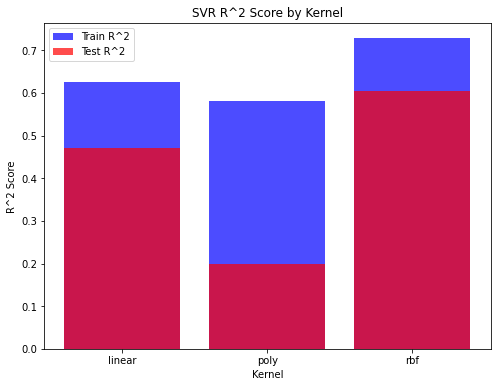

In [36]:

# Define different kernels
kernels = ['linear', 'poly', 'rbf']

train_r2_scores = []
test_r2_scores = []

for kernel in kernels:
    # SVR model with the specified kernel
    svr = SVR(kernel=kernel)
    
    # Fit the model to the training data
    svr.fit(X_train, y_train)
    
    # Predictions on training and testing data
    train_predictions = svr.predict(X_train)
    test_predictions = svr.predict(X_test)
    
    # Calculate R^2 for train and test
    r2_train = r2_score(y_train, train_predictions)
    r2_test = r2_score(y_test, test_predictions)
    
    # Append R^2 scores to lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Plotting R^2 scores based on different kernels
plt.figure(figsize=(8, 6))
plt.bar(kernels, train_r2_scores, label='Train R^2', color='blue', alpha=0.7)
plt.bar(kernels, test_r2_scores, label='Test R^2', color='red', alpha=0.7)
plt.xlabel('Kernel')
plt.ylabel('R^2 Score')
plt.title('SVR R^2 Score by Kernel')
plt.legend()
plt.show()


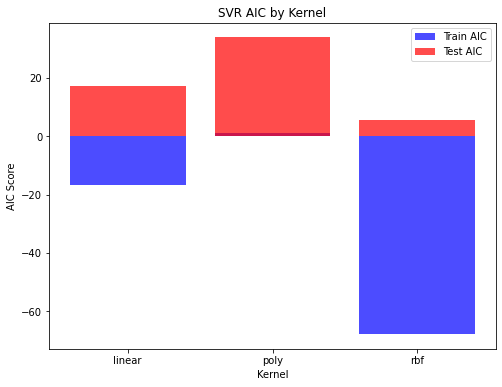

In [37]:
# Define different kernels
kernels = ['linear', 'poly', 'rbf']

train_aic_scores = []
test_aic_scores = []

for kernel in kernels:
    # Initialize SVR model with the specified kernel
    svr = SVR(kernel=kernel)
    
    # Fit the model to the training data
    svr.fit(X_train, y_train)
    
    # Predictions on training and testing data
    train_predictions = svr.predict(X_train)
    test_predictions = svr.predict(X_test)
    
    # Calculate MSE for train and test
    mse_train = mean_squared_error(y_train, train_predictions)
    mse_test = mean_squared_error(y_test, test_predictions)
    
    # Calculate AIC for train and test
    n_train = len(y_train)
    n_test = len(y_test)
    p = X_train.shape[1]  # Number of predictors
    aic_train = n_train * np.log(mse_train) + 2 * p
    aic_test = n_test * np.log(mse_test) + 2 * p
    
    # Append AIC scores to lists
    train_aic_scores.append(aic_train)
    test_aic_scores.append(aic_test)

# Plotting AIC scores based on different kernels
plt.figure(figsize=(8, 6))
plt.bar(kernels, train_aic_scores, label='Train AIC', color='blue', alpha=0.7)
plt.bar(kernels, test_aic_scores, label='Test AIC', color='red', alpha=0.7)
plt.xlabel('Kernel')
plt.ylabel('AIC Score')
plt.title('SVR AIC by Kernel')
plt.legend()
plt.show()


# Based on these plots by having RBF we will have better predictions in both test and train.

# let's see what is the relationship of each feature with our target

### 3.4.2 Relationship of each feature and target

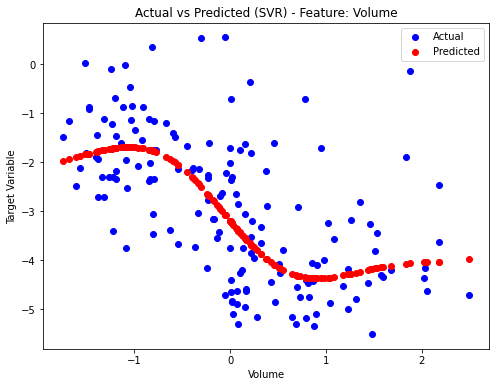

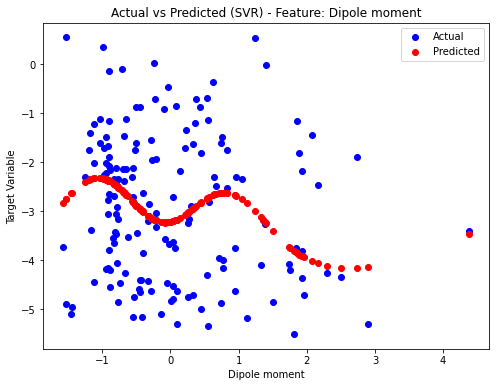

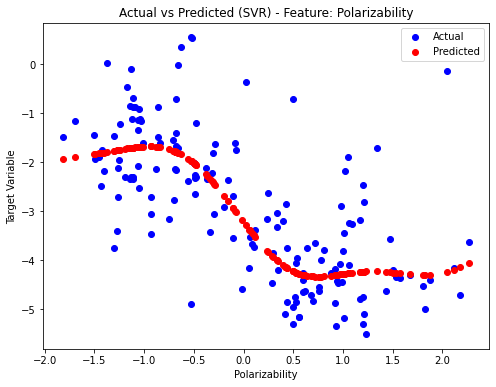

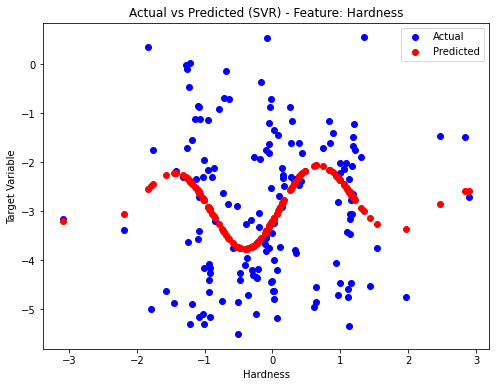

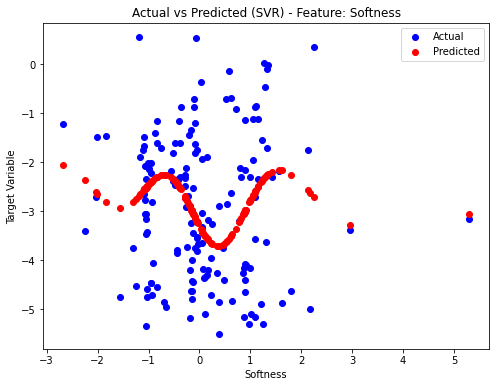

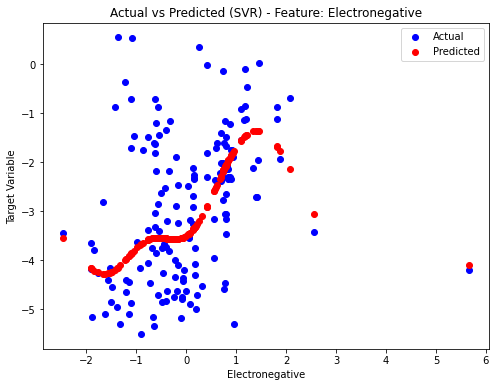

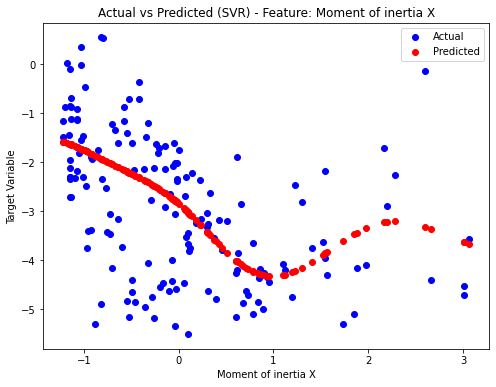

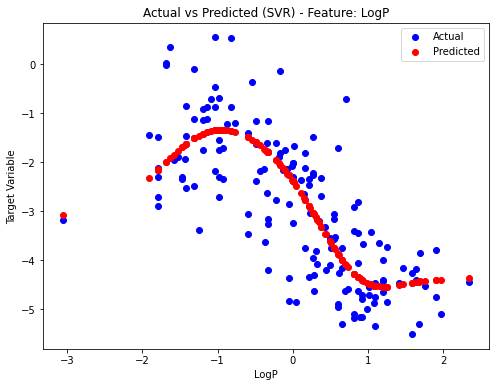

In [38]:
for feature_name in X_train.columns:
    # Select a single feature 
    X_feature = X_train[[feature_name]]

    #  SVR model
    svr = SVR(kernel='rbf') 

    # Fit the SVR model to the data
    svr.fit(X_feature, y_train)

    # Generate predictions using SVR
    predictions = svr.predict(X_feature)

    # Plotting actual vs predicted values for each feature
    plt.figure(figsize=(8, 6))
    plt.scatter(X_feature, y_train, color='blue', label='Actual')
    plt.scatter(X_feature, predictions, color='red', label='Predicted')
    plt.xlabel(feature_name)
    plt.ylabel('Target Variable')
    plt.title(f'Actual vs Predicted (SVR) - Feature: {feature_name}')
    plt.legend()
    plt.show()


# Based on our earlier findings, it appears that linear models aren't well-suited for accurate predictions on our dataset. However, decision trees and SVR with an RBF kernel show promise for better predictions. To explore further, let's employ one of the most powerful models, Random Forest, and assess its performance on our dataset. 

## 3.4. Random Forest

In [88]:
# Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42,max_features=8,max_depth=4)  # again here I fix max depth to 3
# Fit the model to the training data
rf.fit(X_train, y_train)

# Predictions on training and testing data
rf_train_predictions = rf.predict(X_train)
rf_test_predictions = rf.predict(X_test)

# Calculate RMSE for train and test
rf_train_rmse = mean_squared_error(y_train, rf_train_predictions, squared=False)
rf_test_rmse = mean_squared_error(y_test, rf_test_predictions, squared=False)

# Calculate R^2 for train and test
rf_train_r2 = r2_score(y_train, rf_train_predictions)
rf_test_r2 = r2_score(y_test, rf_test_predictions)

# Calculate AIC for train and test
n_train = len(y_train)
n_test = len(y_test)
p = X_train.shape[1]  # Number of features
mse_train = mean_squared_error(y_train, rf_train_predictions)
mse_test = mean_squared_error(y_test, rf_test_predictions)
aic_train = n_train * np.log(mse_train) + 2 * p
aic_test = n_test * np.log(mse_test) + 2 * p

# results
print("Train Metrics:")
print(f"Random Forest Train RMSE: {rf_train_rmse}")
print(f"Random Forest Train R^2 score: {rf_train_r2}")
print(f"Random Forest Train AIC: {aic_train}")

print("\nTest Metrics:")
print(f"Random Forest Test RMSE: {rf_test_rmse}")
print(f"Random Forest Test R^2 score: {rf_test_r2}")
print(f"Random Forest Test AIC: {aic_test}")

Train Metrics:
Random Forest Train RMSE: 0.58184876397921
Random Forest Train R^2 score: 0.8442573959981594
Random Forest Train AIC: -156.211221190508

Test Metrics:
Random Forest Test RMSE: 0.8355984416594638
Random Forest Test R^2 score: 0.6419659771964896
Random Forest Test AIC: 1.631430861001384


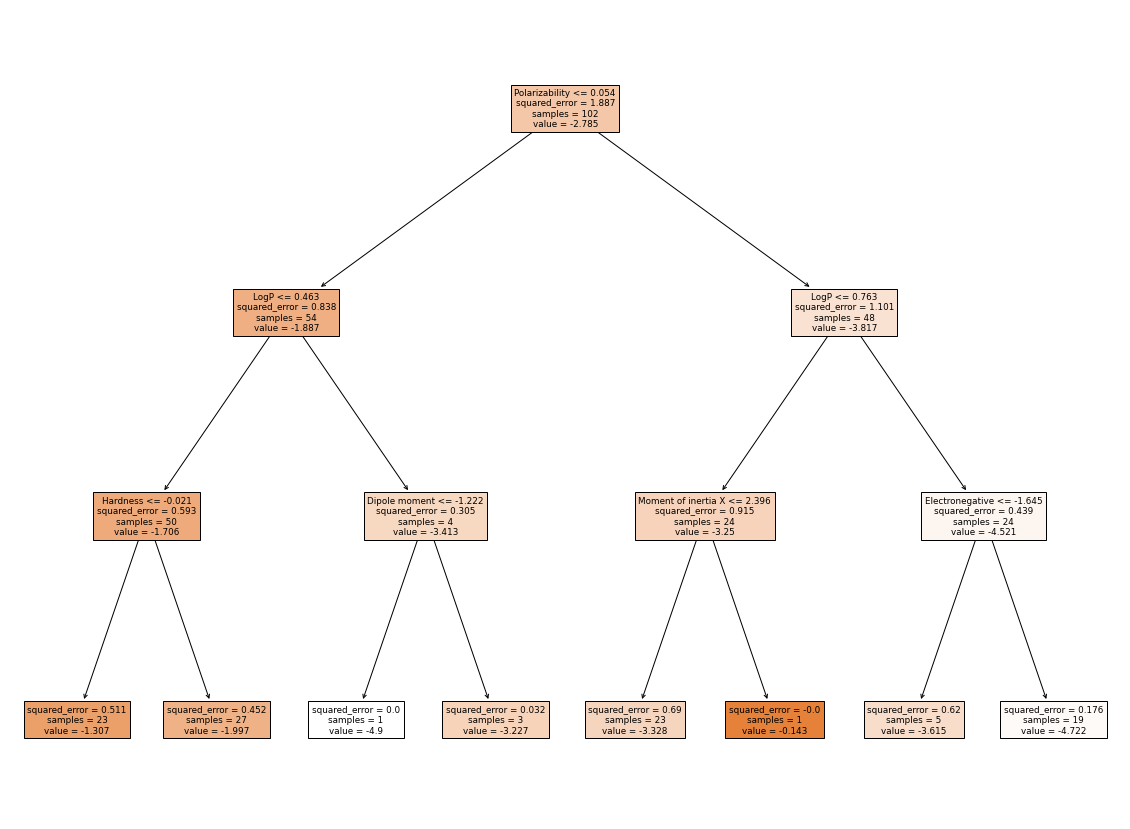

In [40]:
# Select one of the trees from the Random Forest 
selected_tree = 49  # so this one is show specific tree we choose estimator number as 100 so you can choose between 0 to 100

plt.figure(figsize=(20, 15))
plot_tree(rf.estimators_[selected_tree], feature_names=X.columns, filled=True)
plt.show()

# It's quite evident that the predictions generated by the Random Forest model surpass those of other models significantly. This underscores the effectiveness of Random Forest in capturing the complexities of our dataset and making more accurate predictions compared to alternative models.

# One of the strengths of the Random Forest model lies in its ability to determine feature importance. Let's explore this feature to gain insights into which features hold the most significance in influencing the model's predictions.

### 3.4.1 Feature Importances

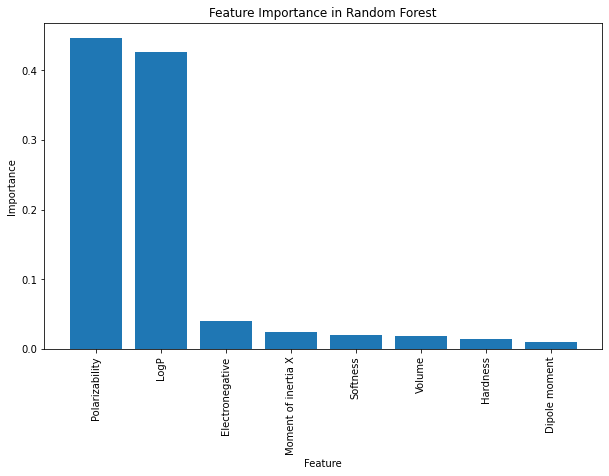

In [41]:

feature_importance = rf.feature_importances_

# Sort feature importances in order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_columns = X_train.columns[sorted_indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_importance, tick_label=sorted_columns)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()


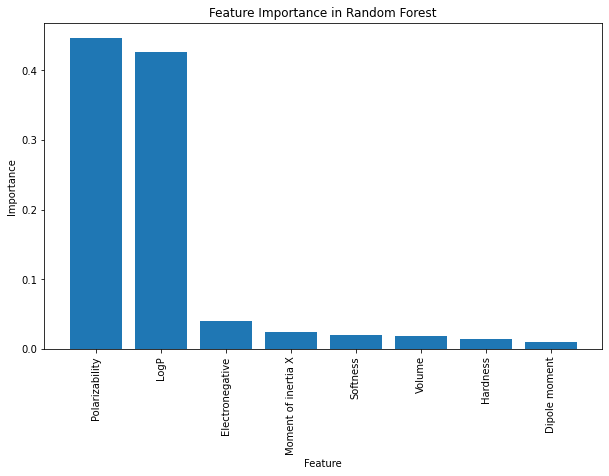

In [42]:

feature_importance = rf.feature_importances_

# Sort feature importances in order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_columns = X_test.columns[sorted_indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), sorted_importance, tick_label=sorted_columns)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()


# So here we can see both Polarisibility and LogP have the most impact on our test and train, so now let's see what is the effect of number of features on the prediction of random forest.

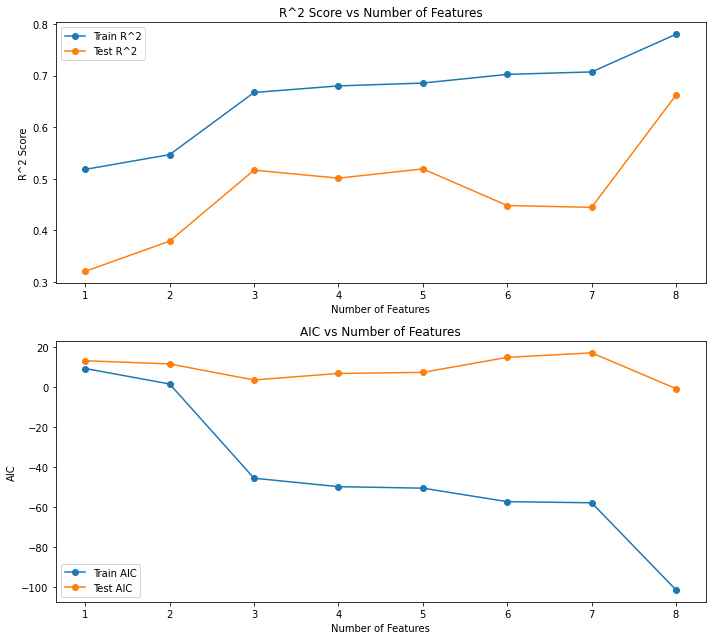

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Define a range of numbers of features to consider
num_features_list = list(range(1, len(X.columns) + 1))

# Initialize lists to store metrics
train_r2_scores = []
test_r2_scores = []
train_aic_scores = []
test_aic_scores = []

for num_features in num_features_list:
    # Select subset of features
    selected_features = X.columns[:num_features]
    X_subset = X_train[selected_features]

    #  Random Forest Regressor model
    rf = RandomForestRegressor(n_estimators=100, max_depth=3,random_state=42)

    # Fit the model to the training data
    rf.fit(X_subset, y_train)

    # Predictions on training and testing data
    rf_train_predictions = rf.predict(X_subset)
    rf_test_predictions = rf.predict(X_test[selected_features])

    # Calculate R^2 for train and test
    r2_train = r2_score(y_train, rf_train_predictions)
    r2_test = r2_score(y_test, rf_test_predictions)

    # Calculate AIC for train and test
    n_train = len(y_train)
    n_test = len(y_test)
    p = num_features  # Number of predictors
    mse_train = mean_squared_error(y_train, rf_train_predictions)
    mse_test = mean_squared_error(y_test, rf_test_predictions)
    aic_train = n_train * np.log(mse_train) + 2 * p
    aic_test = n_test * np.log(mse_test) + 2 * p

    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)
    train_aic_scores.append(aic_train)
    test_aic_scores.append(aic_test)

# Plotting R^2 scores and AIC values based on number of features
plt.figure(figsize=(10, 9))

plt.subplot(2, 1, 1)
plt.plot(num_features_list, train_r2_scores, label='Train R^2', marker='o')
plt.plot(num_features_list, test_r2_scores, label='Test R^2', marker='o')
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Number of Features')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(num_features_list, train_aic_scores, label='Train AIC', marker='o')
plt.plot(num_features_list, test_aic_scores, label='Test AIC', marker='o')
plt.xlabel('Number of Features')
plt.ylabel('AIC')
plt.title('AIC vs Number of Features')
plt.legend()

plt.tight_layout()
plt.show()


# In this case, I observed that including all the features yields better predictions across various models, including Random Forest.

# Again we can see the relationship of our target with each features

<Figure size 864x576 with 0 Axes>

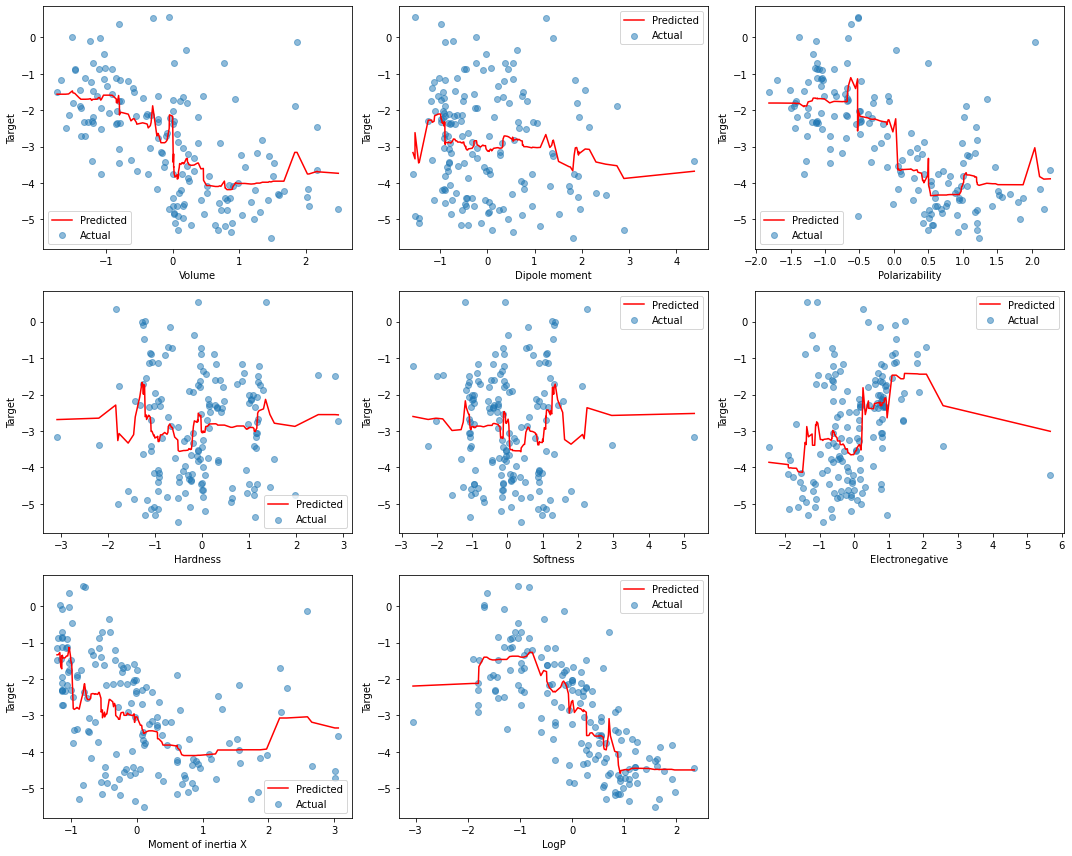

In [44]:
plt.figure(figsize=(12, 8))
num_cols = X_train.shape[1]  
n_rows = int(np.ceil(num_cols / 3))  # Adjust columns per row according to your preference for plots

#  Random Forest regressor
rf = RandomForestRegressor(n_estimators=100,max_depth=3)

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(X_train.columns):
    feature = X_train[col].values.reshape(-1, 1)  # Reshape feature for single feature regression

    # Fit Random Forest on the feature and target
    rf.fit(feature, y_train)

    # Make predictions
    predictions = rf.predict(feature)

    # Sort values for smooth plot
    sorted_indices = np.argsort(feature.flatten())
    feature_sorted = feature.flatten()[sorted_indices]
    predictions_sorted = predictions[sorted_indices]

    # Plotting
    ax = axes[i]
    ax.scatter(feature, y_train, alpha=0.5, label='Actual')
    ax.plot(feature_sorted, predictions_sorted, color='red', label='Predicted')
    ax.set_xlabel(col)
    ax.set_ylabel('Target')
    ax.legend()

# this code is good for hiding empty subplots 
for i in range(num_cols, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 3.5. KNeighborsRegressor

In [45]:

#  KNN Regressor model
knn = KNeighborsRegressor(n_neighbors=5)  # this number can change for the beginig I choose 5

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predictions on training and testing data
knn_train_predictions = knn.predict(X_train)
knn_test_predictions = knn.predict(X_test)

# Calculate RMSE for train and test
knn_train_rmse = mean_squared_error(y_train, knn_train_predictions, squared=False)
knn_test_rmse = mean_squared_error(y_test, knn_test_predictions, squared=False)

# Calculate R^2 for train and test
knn_train_r2 = r2_score(y_train, knn_train_predictions)
knn_test_r2 = r2_score(y_test, knn_test_predictions)

#  results
# I didn't calculate AIC for this model because AIC relies on concepts like log-likelihood, number of parameters, and the number of observations, which aren't directly applicable in the context of KNN.
print("Train Metrics:")
print(f"KNN Train RMSE: {knn_train_rmse}")
print(f"KNN Train R^2 score: {knn_train_r2}")

print("\nTest Metrics:")
print(f"KNN Test RMSE: {knn_test_rmse}")
print(f"KNN Test R^2 score: {knn_test_r2}")


Train Metrics:
KNN Train RMSE: 0.8108926659695909
KNN Train R^2 score: 0.6975079642934118

Test Metrics:
KNN Test RMSE: 0.9053985343482726
KNN Test R^2 score: 0.5796523442849099


<Figure size 864x576 with 0 Axes>

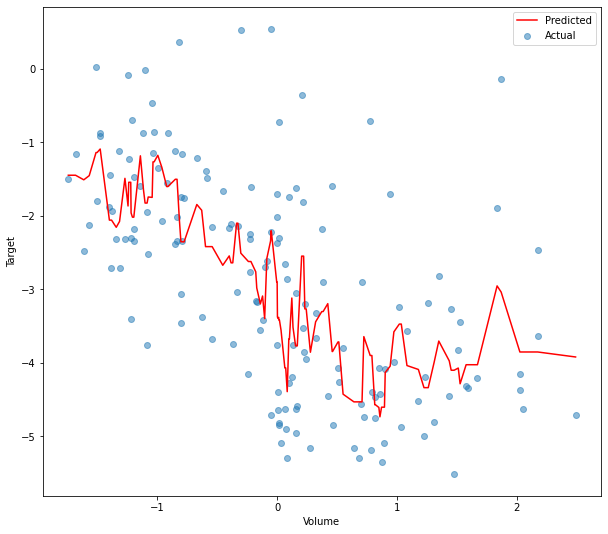

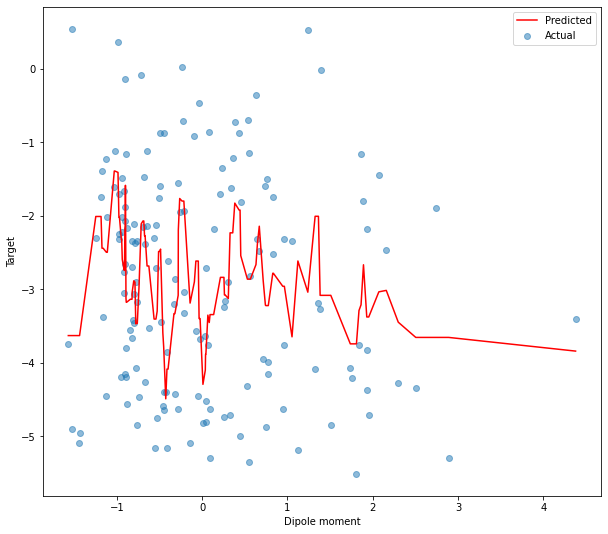

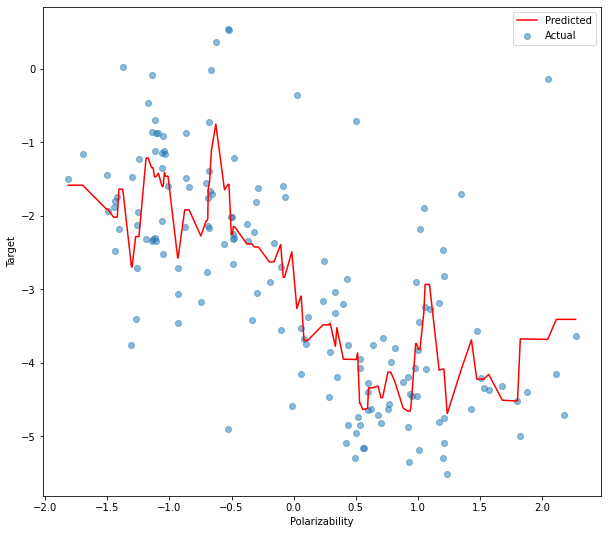

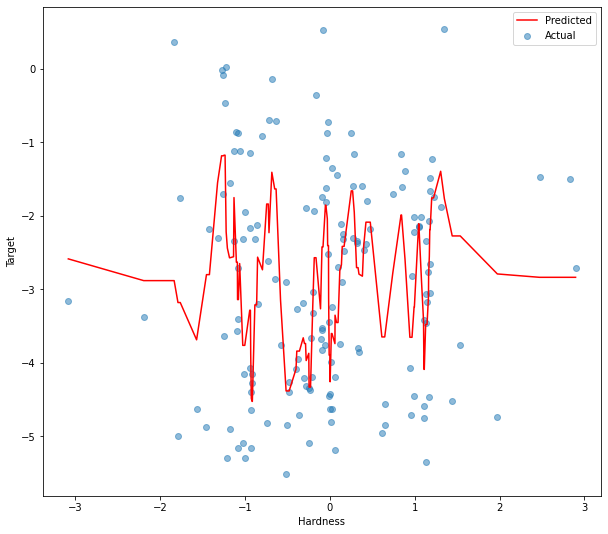

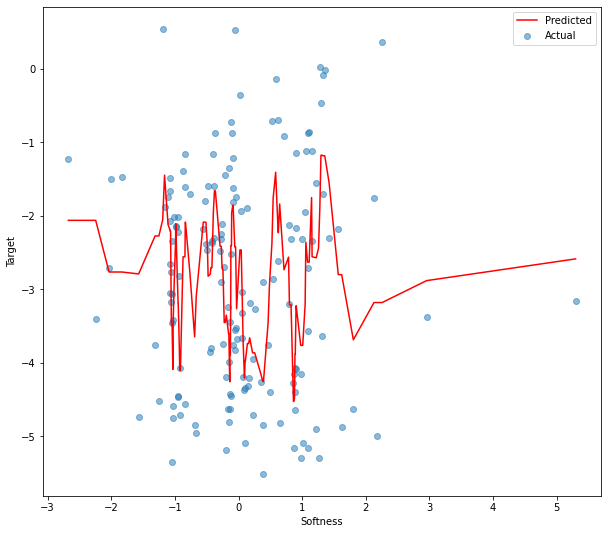

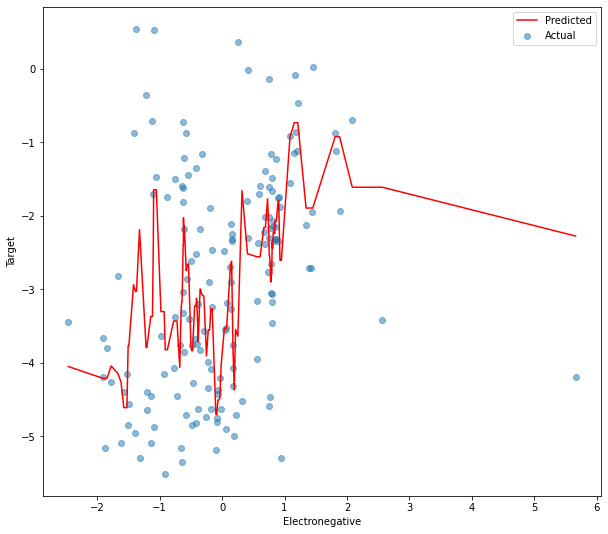

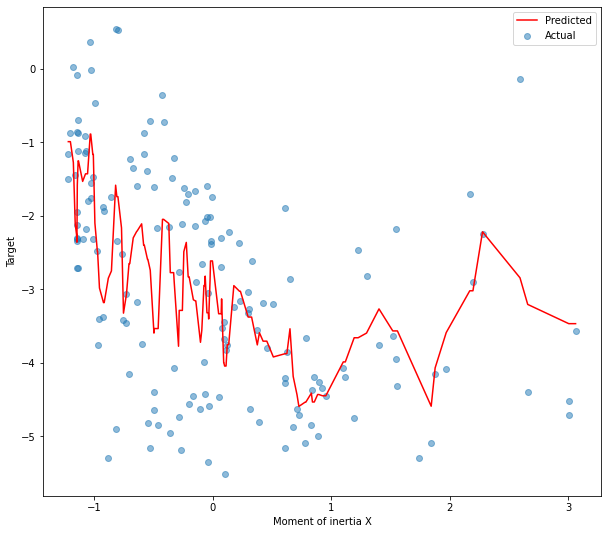

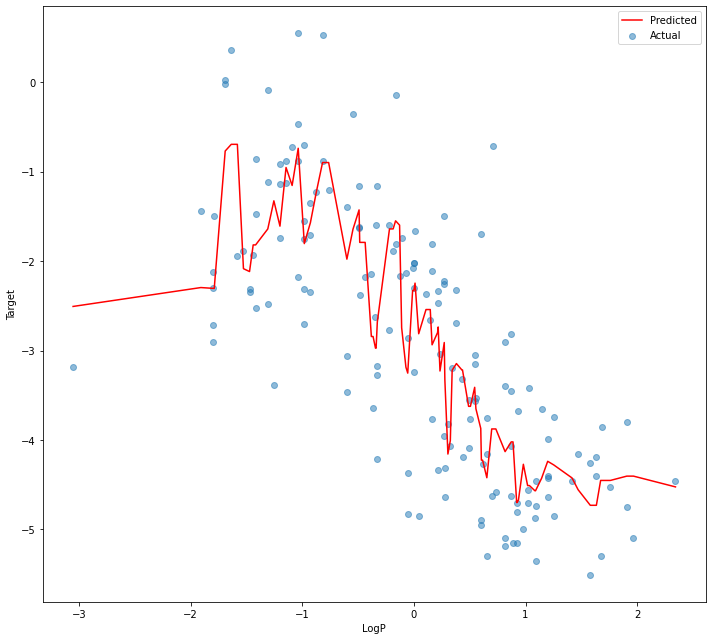

In [46]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(X_train.columns):
    feature = X_train[col].values.reshape(-1, 1)  # Reshape feature for single feature regression

    # Fit Random Forest on the feature and target
    knn.fit(feature, y_train)

    # Make predictions
    predictions = knn.predict(feature)

    # Sort values for smooth plot
    sorted_indices = np.argsort(feature.flatten())
    feature_sorted = feature.flatten()[sorted_indices]
    predictions_sorted = predictions[sorted_indices]

    plt.figure(figsize=(10, 9))  # Adjust subplot layout according to your number of features
    plt.scatter(feature, y_train, alpha=0.5, label='Actual')
    plt.plot(feature_sorted, predictions_sorted, color='red', label='Predicted')
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.legend()

plt.tight_layout()
plt.show()


### 3.5.1 Number of neighbors

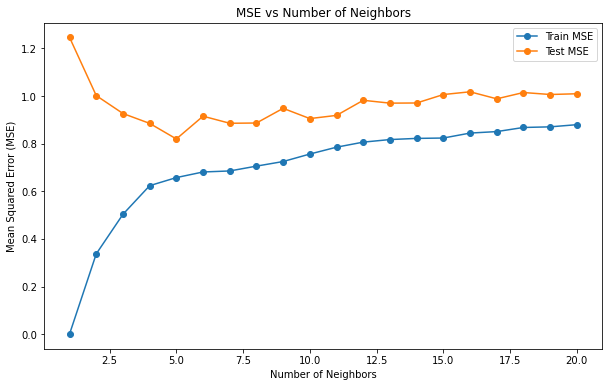

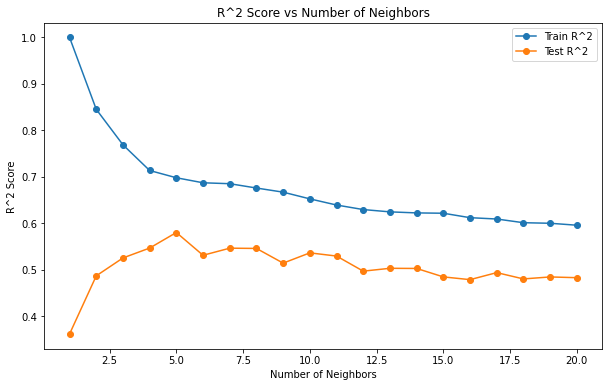

In [47]:
from sklearn.neighbors import KNeighborsRegressor

# Define a range of neighbors
neighbors = list(range(1, 21))  

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for n in neighbors:
    #  KNN Regressor model
    knn = KNeighborsRegressor(n_neighbors=n)

    # Fit the model to the training data
    knn.fit(X_train, y_train)

    # Predictions on training and testing data
    knn_train_predictions = knn.predict(X_train)
    knn_test_predictions = knn.predict(X_test)

    # Calculate MSE for train and test
    mse_train = mean_squared_error(y_train, knn_train_predictions)
    mse_test = mean_squared_error(y_test, knn_test_predictions)

    # Calculate R^2 for train and test
    r2_train = r2_score(y_train, knn_train_predictions)
    r2_test = r2_score(y_test, knn_test_predictions)

    # Append values to lists
    train_mse.append(mse_train)
    test_mse.append(mse_test)
    train_r2.append(r2_train)
    test_r2.append(r2_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_mse, marker='o', label='Train MSE')
plt.plot(neighbors, test_mse, marker='o', label='Test MSE')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Number of Neighbors')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_r2, marker='o', label='Train R^2')
plt.plot(neighbors, test_r2, marker='o', label='Test R^2')
plt.xlabel('Number of Neighbors')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Number of Neighbors')
plt.legend()
plt.show()


# I began by employing the K-Nearest Neighbors model, analyzing the relationship between each feature and the target variable through plotted graphs. Upon exploring the effect of varying the number of neighbors on prediction accuracy, it's evident that beyond a neighbor count of 5, the predictive outcomes remain consistent. Hence, the optimal number of neighbors for this dataset appears to be 5.

# 4. Comparing all Regression Model

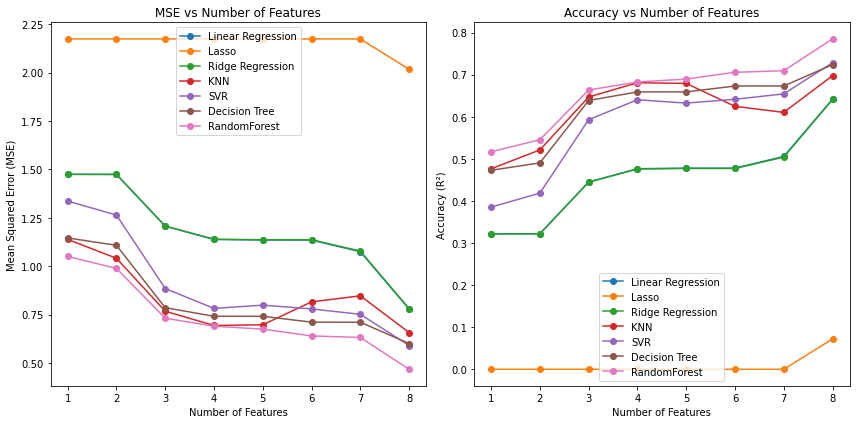

In [48]:
#  models for train
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge Regression': Ridge(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(max_depth=3),
    'RandomForest': RandomForestRegressor(n_estimators=100,max_depth=3)
}

num_features = range(1, len(X_train.columns) + 1) 
train_mse = {model: [] for model in models}
train_accuracy = {model: [] for model in models}
train_aic = {model: [] for model in models}

# Iterate over models
for model_name, model in models.items():
    for n in num_features:
        # Fit the model to the training data with n features
        model.fit(X_train.iloc[:, :n], y_train)
        
        # Predictions on training data
        train_predictions = model.predict(X_train.iloc[:, :n])
        
        # Calculate MSE for train data
        mse = mean_squared_error(y_train, train_predictions)
        train_mse[model_name].append(mse)
        
        # Calculate accuracy (R² for regression models)
        if hasattr(model, 'score'):
            accuracy = model.score(X_train.iloc[:, :n], y_train)
            train_accuracy[model_name].append(accuracy)
        


# Plotting
plt.figure(figsize=(12, 6))

# MSE plot
plt.subplot(1, 2, 1)
for model_name, mse_values in train_mse.items():
    plt.plot(num_features, mse_values, marker='o', label=model_name)
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Number of Features')
plt.legend()

# Accuracy (R²) plot
plt.subplot(1, 2, 2)
for model_name, accuracy_values in train_accuracy.items():
    plt.plot(num_features, accuracy_values, marker='o', label=model_name)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy (R²)')
plt.title('Accuracy vs Number of Features')
plt.legend()



plt.tight_layout()
plt.show()


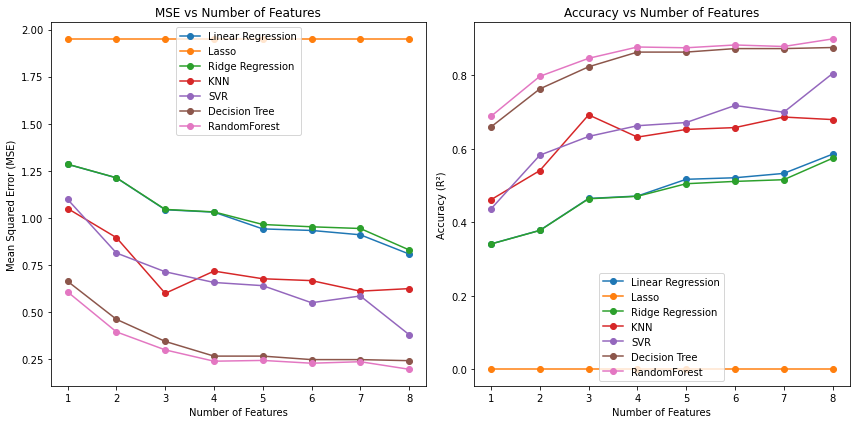

In [49]:
# models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge Regression': Ridge(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(max_depth=3),
    'RandomForest': RandomForestRegressor(n_estimators=100,max_depth=3)
}

num_features = range(1, len(X_test.columns) + 1) 

# Initialize lists to store metrics
test_mse = {model: [] for model in models}
test_accuracy = {model: [] for model in models}


# Iterate over models
for model_name, model in models.items():
    for n in num_features:
        # Fit the model to the training data with n features
        model.fit(X_test.iloc[:, :n], y_test)
        
        # Predictions on training data
        test_predictions = model.predict(X_test.iloc[:, :n])
        
        # Calculate MSE for train data
        mse = mean_squared_error(y_test, test_predictions)
        test_mse[model_name].append(mse)
        
        # Calculate accuracy (R² for regression models)
        if hasattr(model, 'score'):
            accuracy = model.score(X_test.iloc[:, :n], y_test)
            test_accuracy[model_name].append(accuracy)
        

# Plotting
plt.figure(figsize=(12, 6))

# MSE plot
plt.subplot(1, 2, 1)
for model_name, mse_values in test_mse.items():
    plt.plot(num_features, mse_values, marker='o', label=model_name)
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Number of Features')
plt.legend()

# Accuracy (R²) plot
plt.subplot(1, 2, 2)
for model_name, accuracy_values in test_accuracy.items():
    plt.plot(num_features, accuracy_values, marker='o', label=model_name)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy (R²)')
plt.title('Accuracy vs Number of Features')
plt.legend()



plt.tight_layout()
plt.show()


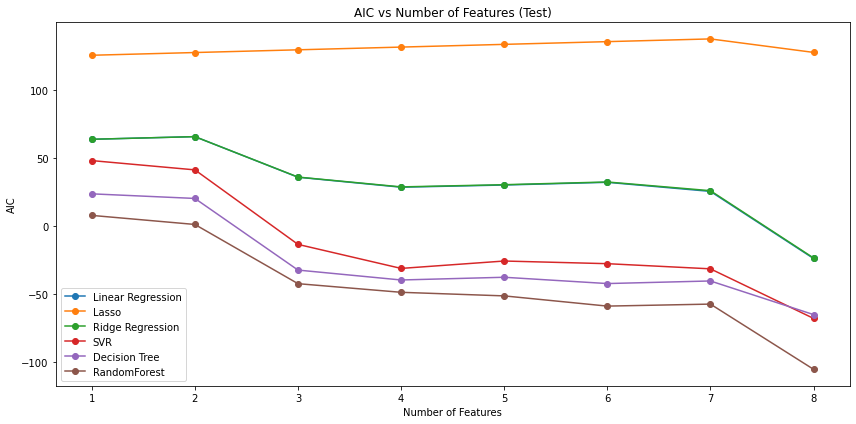

In [50]:
#  models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge Regression': Ridge(),
    'SVR': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(max_depth=3),
    'RandomForest': RandomForestRegressor(n_estimators=100,max_depth=3)
}

num_features = range(1, len(X_train.columns) + 1) 
train_mse = {model: [] for model in models}
train_accuracy = {model: [] for model in models}
train_aic = {model: [] for model in models}


# Iterate over models
for model_name, model in models.items():
    for n in num_features:
        model.fit(X_train.iloc[:, :n], y_train)
        train_predictions = model.predict(X_train.iloc[:, :n])
        
        # Calculate AIC (if applicable)
        if model_name in models:
            n_train = len(y_train)
            mse_train = mean_squared_error(y_train, train_predictions)
            p = n  # Number of predictors
            aic = n_train * np.log(mse_train) + 2 * p
            train_aic[model_name].append(aic)

# Plotting
plt.figure(figsize=(12, 6))
for model_name, aic_values in train_aic.items():
    plt.plot(num_features, aic_values, marker='o', label=model_name)
plt.xlabel('Number of Features')
plt.ylabel('AIC')
plt.title('AIC vs Number of Features (Test)')
plt.legend()

plt.tight_layout()
plt.show()




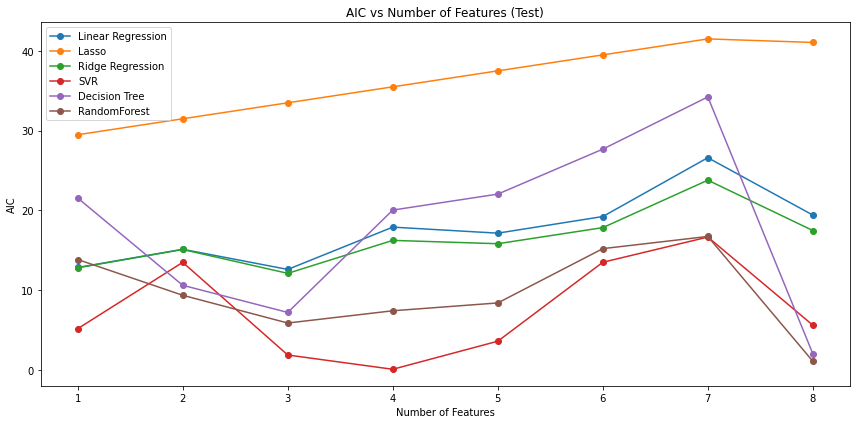

In [51]:
#  models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge Regression': Ridge(),
    'SVR': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(max_depth=3),
    'RandomForest': RandomForestRegressor(n_estimators=100,max_depth=3)
}

num_features = range(1, len(X_test.columns) + 1) 
test_mse = {model: [] for model in models}
test_accuracy = {model: [] for model in models}
test_aic = {model: [] for model in models}


# Iterate over models
for model_name, model in models.items():
    for n in num_features:
        model.fit(X_train.iloc[:, :n], y_train)
        test_predictions = model.predict(X_test.iloc[:, :n])
        
        # Calculate AIC (if applicable)
        if model_name in models:
            n_test = len(y_test)
            mse_test = mean_squared_error(y_test, test_predictions)
            p = n  # Number of predictors
            aic = n_test * np.log(mse_test) + 2 * p
            test_aic[model_name].append(aic)

# Plotting
plt.figure(figsize=(12, 6))
for model_name, aic_values in test_aic.items():
    plt.plot(num_features, aic_values, marker='o', label=model_name)
plt.xlabel('Number of Features')
plt.ylabel('AIC')
plt.title('AIC vs Number of Features (Test)')
plt.legend()

plt.tight_layout()
plt.show()


## From the overview of our regression project, two perspectives emerge: one from data science and another rooted in chemistry. Examining the data science aspect reveals the efficacy of various models. Models like Random Forest, Decision Trees, and SVR with an RBF kernel demonstrated superior predictive capabilities, while Linear and Lasso models fell short in terms of accuracy.

## However, when considering the chemistry behind the data, it becomes evident that the features derived closely correlate with the structural aspects of the drugs. This strong correlation suggests that simplifying the feature space using techniques like PCA or polynomial features might not be advantageous. Additionally, the dataset's diversity in structures, combined with limited representation, challenges traditional cross-validation or bootstrapping methods. This limitation could lead to models inadequately learning from certain structures.

## The conclusion drawn emphasizes the critical importance of meticulously curating the training set. Ensuring a comprehensive representation of all structural variations within the training data becomes pivotal for enhancing the model's generalizability to diverse, unseen structures.

# 5. Classification Model

# In approaching the secondary problem, I utilized classification algorithms. Initially, I considered all columns as features and designated 'logP' as the target variable. Notably, 'logP' encompasses continuous values within a range of -4 to 6. To facilitate the task, I discretized 'logP' into two distinct classes. Class 1 comprises 'logP' values between -4 and 0, while Class 0 encompasses values from 0 to 6. This transformation effectively converted the regression problem into a binary classification task. Subsequently, various classification models were employed to predict whether a 'logP' value falls within these specified ranges. 

## 5.1. Making Classes


In [25]:
data=pd.read_excel('drug.xlsx')
data

Name   Volume  Dipole moment  \
0                           ethambutol  183.263       0.187446   
1                           antipyrine  166.301       5.623050   
2             2-dimethylaminopteridine  131.696       1.248100   
3                            petridine   84.763       2.723700   
4             7-dimethylaminopteridine  112.386       5.935700   
..                                 ...      ...            ...   
194  cycloethane-1’,5-spirobarbiturate   92.295       1.419700   
195                              RTI11  192.434       2.559400   
196                               RTI9  163.931       2.765900   
197                               RTI5  193.329       7.707200   
198                               RTI4  183.079       3.831100   

     Polarizability  Hardness  Softness  Electronegative  Solubility  \
0          147.4950    3.0479  0.328089           3.2626       0.545   
1          147.9080    2.5014  0.399700           3.4546       0.530   
2          141.2490    1.8310  0.546100           4.3538       0.360   
3           94.1636    2.0652  0.484200           5.1599       0.021   
4          139.0270    2.0445  0.489100           4.4586      -0.021   
..              ...       ...       ...              ...         ...   
194         89.5040    3.0312  0.329900           4.8067      -1.886   
195        207.6230    2.2838  0.437800           3.8104      -2.860   
196        201.7470    2.4552  0.407200           3.7649      -3.043   
197        218.0443    2.1831  0.458000           3.8659      -4.272   
198        223.3400    2.8983  0.345000           3.7985      -4.706   

     Moment of inertia X  LogP  
0             1239.42445 -0.10  
1             1276.99676  0.30  
2              825.26911 -1.20  
3              548.99042 -1.30  
4              829.68795 -1.30  
..                   ...   ...  
194           1041.07710 -1.00  
195           4087.39680  1.70  
196           3404.30064  2.23  
197           4003.62906  2.93  
198           4232.89260  3.67  

[199 rows x 10 columns]

In [28]:
# changing 'Log P' values into two classes (1 and 0) 
data['LogP Class'] = np.where((data['LogP'] >= -4) & (data['LogP'] <= 0), 1,
                               np.where((data['LogP'] > 0) & (data['LogP'] <= 6), 0, np.nan))

# Dropping rows with NaN values 
data.dropna(subset=['LogP Class'], inplace=True)

# Separating X and y after binarization
X = data.drop(['LogP', 'LogP Class','Name'], axis=1)  # Dropping 'Log P' and the newly created 'Log P Class'
feature_names = X.columns.tolist()

# StandardScaler
scaler = StandardScaler()

# Fit and transform the features in X
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=feature_names)

# Target variable y
y = data['LogP Class']


In [29]:
X

Volume  Dipole moment  Polarizability  Hardness  Softness  \
0   -0.042117      -1.532322       -0.516171  1.341236 -1.184324   
1   -0.293867       1.229442       -0.509550 -0.084805 -0.055921   
2   -0.807474      -0.993416       -0.616304 -1.834150  2.250961   
3   -1.504053      -0.243682       -1.371159 -1.223027  1.275579   
4   -1.094073       1.388295       -0.651927 -1.277042  1.352790   
..        ...            ...             ...       ...       ...   
192 -1.392263      -0.906229       -1.445860  1.297658 -1.155787   
193  0.093998      -0.327161        0.447778 -0.652611  0.544436   
194 -0.329043      -0.222241        0.353576 -0.205359  0.062259   
195  0.107282       2.288372        0.614848 -0.915378  0.862735   
196 -0.044848       0.318974        0.699746  0.950868 -0.917850   

     Electronegative  Solubility  Moment of inertia X  
0          -1.392652    2.382733            -0.819355  
1          -1.105493    2.372387            -0.799376  
2           0.239370    2.255125            -1.039589  
3           1.444991    2.021290            -1.186504  
4           0.396111    1.992319            -1.037239  
..               ...         ...                  ...  
192         0.916737    0.705884            -0.924830  
193        -0.573351    0.034041             0.695097  
194        -0.641401   -0.092189             0.331850  
195        -0.490344   -0.939925             0.650552  
196        -0.591149   -1.239289             0.772466  

[197 rows x 8 columns]

In [30]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
194    1.0
195    0.0
196    0.0
197    0.0
198    0.0
Name: LogP Class, Length: 197, dtype: float64

In [31]:
#Number of each class

class_counts = y.value_counts()

class_counts = data['LogP Class'].value_counts()

print(class_counts)

0.0    152
1.0     45
Name: LogP Class, dtype: int64


# Let's explore the correlation between individual features and our target variable. 

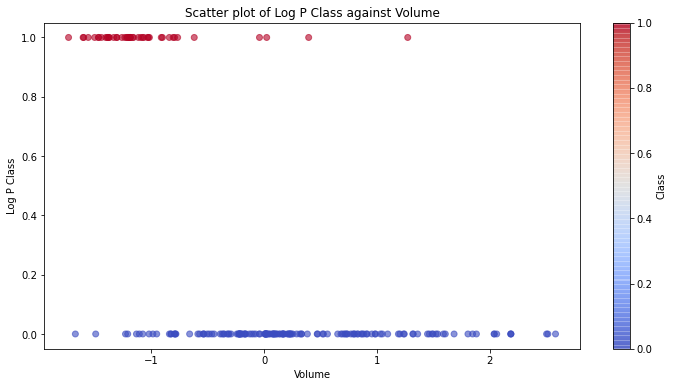

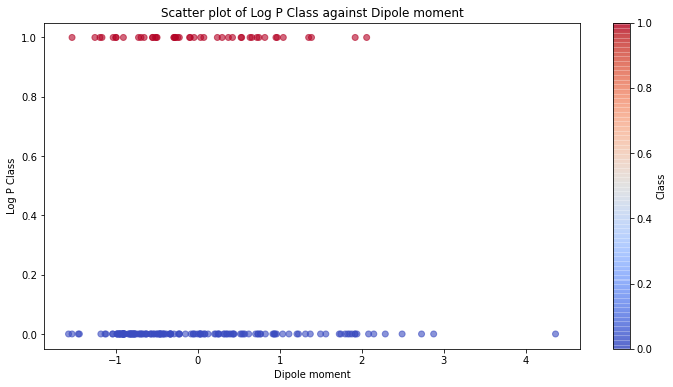

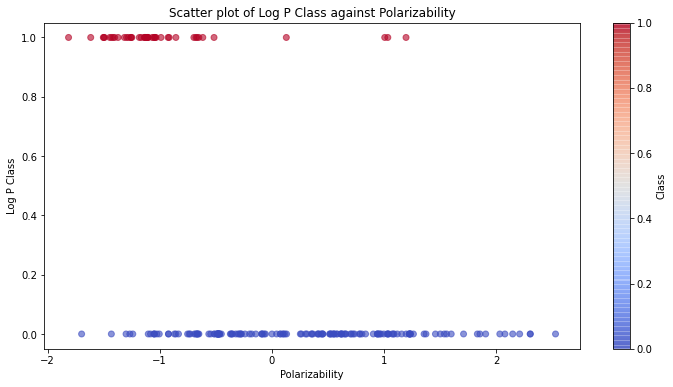

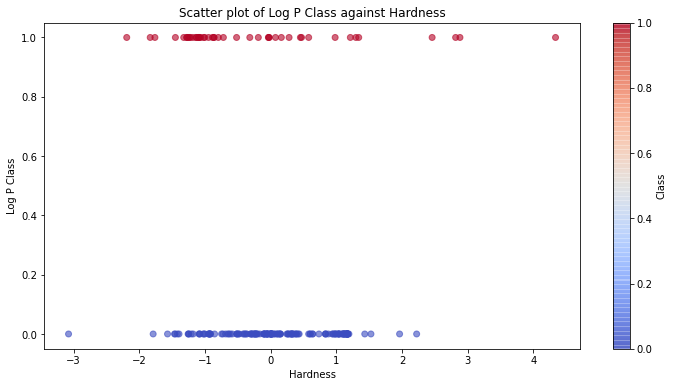

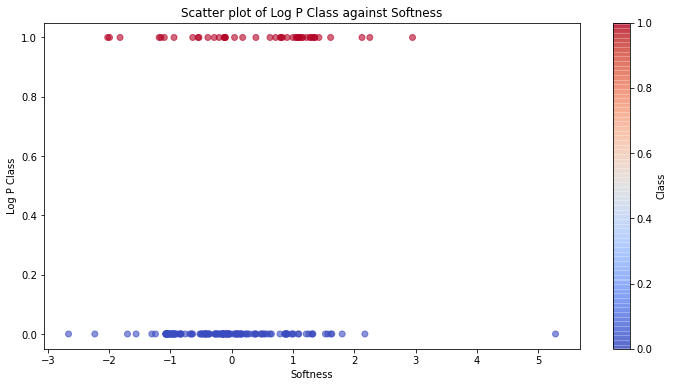

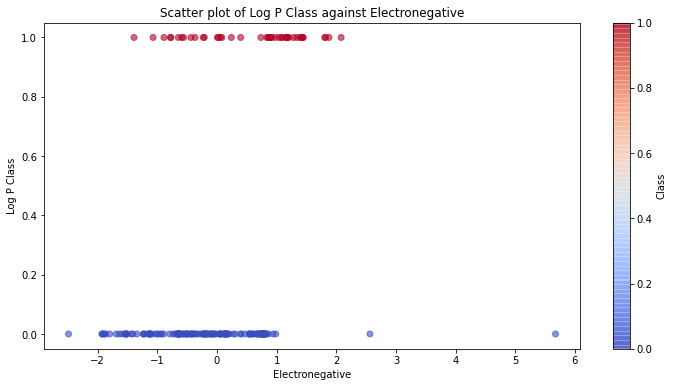

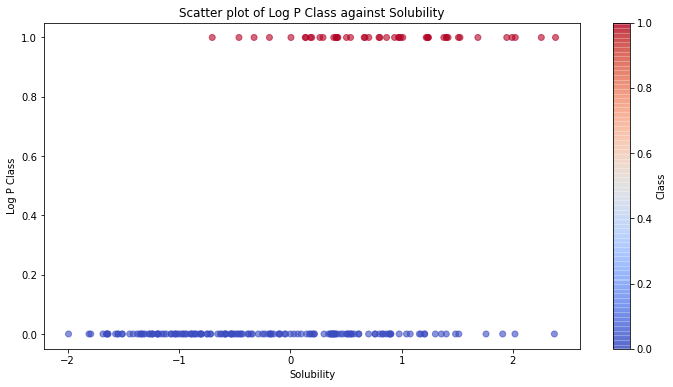

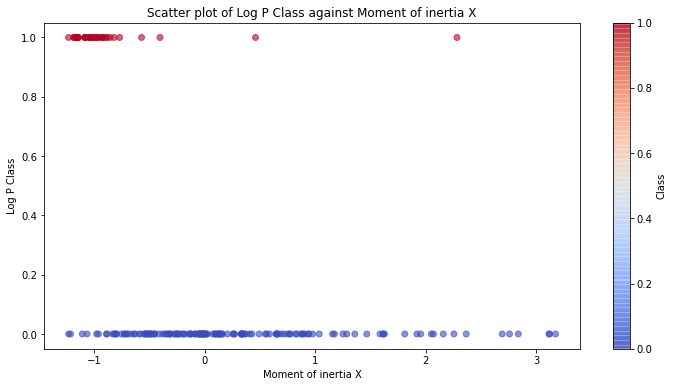

In [32]:
for feature in X.columns:
    plt.figure(figsize=(12, 6))
    plt.scatter(X[feature], y, c=y, cmap='coolwarm', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Log P Class')
    plt.title(f'Scatter plot of Log P Class against {feature}')
    plt.colorbar(label='Class') 
    plt.show()

# We can start and use classification algorithms now:

## 5.2. Logestic Regression

# Initially, I employed a logistic regression model, a relatively straightforward approach for my dataset. I experimented with three distinct methods to divide my data: test-train splitting, cross-validation, and bootstrapping. I aim to determine the most effective data partitioning method for this particular problem.

### 5.2.1. Train_Test_Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Set Metrics:
Accuracy: 0.9171974522292994
Precision: 0.84375
Recall: 0.7714285714285715
F1 Score: 0.8059701492537314
Train AUC: 0.8652224824355971
-----------------------------
Test Set Metrics:
Accuracy: 0.875
Precision: 0.7272727272727273
Recall: 0.8
F1 Score: 0.761904761904762
Test AUC: 0.8500000000000001


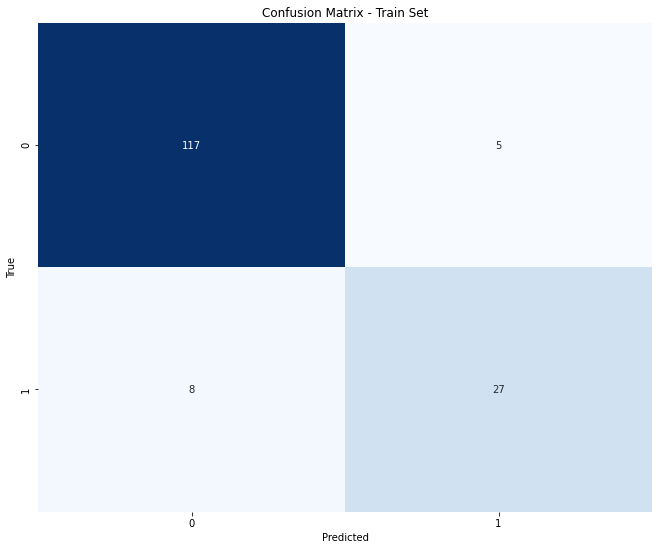

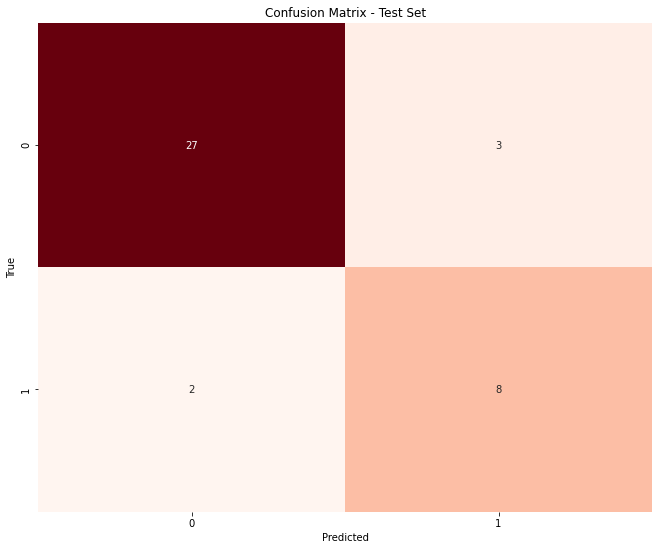

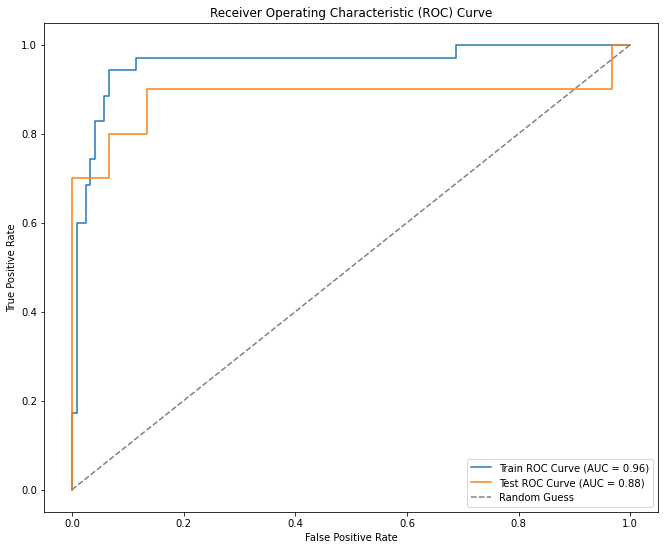

In [34]:
# Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(X_train, y_train)

# Predictions for train and test sets
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Iused different models for investigating the accuracy:

# Metrics for train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

# Confusion matrix for train and test sets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)


# Print metrics for train set
print("Train Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"Train AUC: {train_auc}")
print("-----------------------------")

# Print metrics for test set
print("Test Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"Test AUC: {test_auc}")


# Plotting confusion matrix for train set
plt.figure(figsize=(11, 9))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Train Set')
plt.show()

# Plotting confusion matrix for test set
plt.figure(figsize=(11, 9))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')


# Predict probabilities for train and test sets
y_train_prob = logistic_model.predict_proba(X_train)[:, 1]
y_test_prob = logistic_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for train and test sets
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Plot ROC curve for train and test sets
plt.figure(figsize=(11, 9))
plt.plot(train_fpr, train_tpr, label=f'Train ROC Curve (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test ROC Curve (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### 5.2.2. Cross validation

Cross-Validated Metrics:
Accuracy: 0.9035897435897438
Precision: 0.8016450216450217
Recall: 0.7937662337662338
F1 Score: 0.7822222222222223
AUC: 0.9247076023391815
-----------------------------


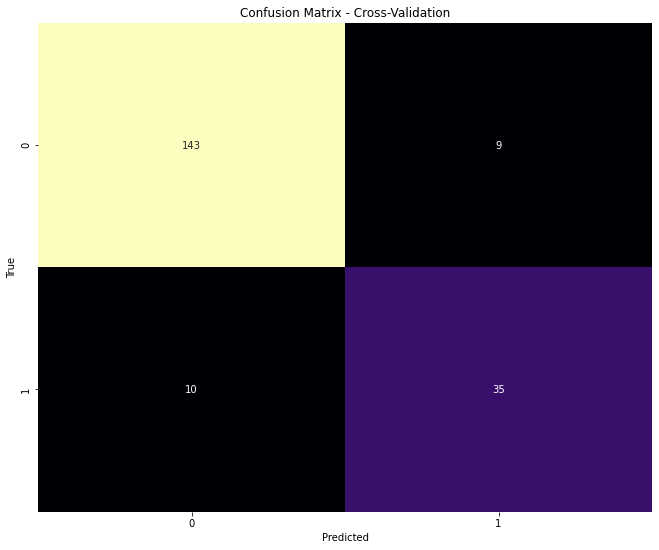

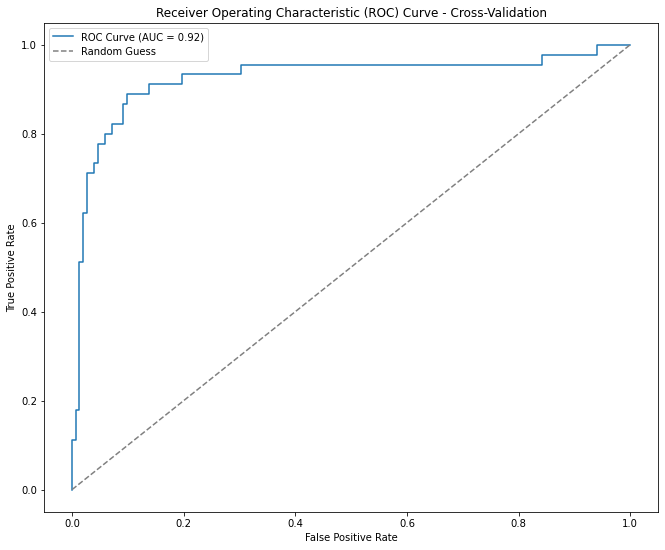

In [35]:
# Logistic Regression model
logistic_model = LogisticRegression()

# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated predictions
y_cv_pred = cross_val_predict(logistic_model, X, y, cv=cv)

# Calculate metrics using cross-validation scores
accuracy = cross_val_score(logistic_model, X, y, cv=cv, scoring='accuracy').mean()
precision = cross_val_score(logistic_model, X, y, cv=cv, scoring='precision').mean()
recall = cross_val_score(logistic_model, X, y, cv=cv, scoring='recall').mean()
f1 = cross_val_score(logistic_model, X, y, cv=cv, scoring='f1').mean()

# Confusion matrix using cross-validated predictions
conf_matrix_cv = confusion_matrix(y, y_cv_pred)

# Calculate AUC using cross-validation
y_cv_prob = cross_val_predict(logistic_model, X, y, cv=cv, method='predict_proba')[:, 1]
auc = roc_auc_score(y, y_cv_prob)


# Print cross-validated metrics
print("Cross-Validated Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")
print("-----------------------------")

# Plotting confusion matrix
plt.figure(figsize=(11, 9))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='magma', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Cross-Validation')
plt.show()

# Calculate ROC curve and AUC using cross-validation
y_cv_prob = cross_val_predict(logistic_model, X, y, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, _ = roc_curve(y, y_cv_prob)
auc = roc_auc_score(y, y_cv_prob)

# Plot ROC curve
plt.figure(figsize=(11,9))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Cross-Validation')
plt.legend()
plt.show()

### 5.2.3. Bootstrapping

Mean Accuracy across bootstraps: 0.9238578680203047
Confusion Matrix:
[[145   7]
 [  8  37]]
Accuracy: 0.9238578680203046
Precision: 0.8409090909090909
Recall: 0.8222222222222222
F1 Score: 0.8314606741573033
ROC AUC Score: 0.8880847953216375


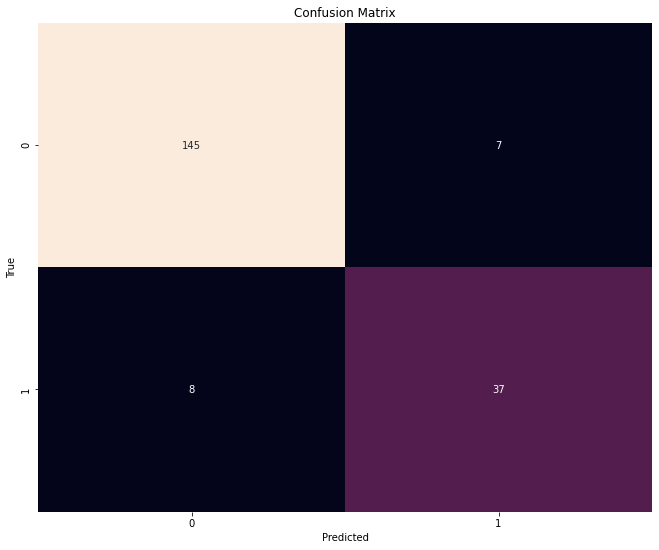

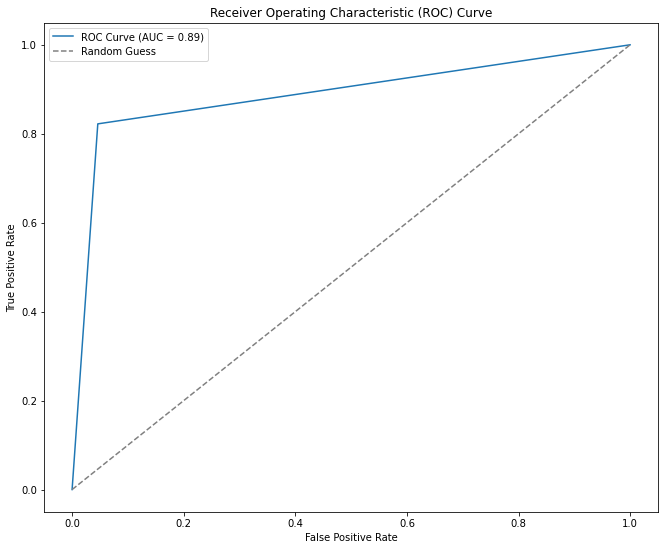

In [36]:
# Logistic Regression model
logistic_model = LogisticRegression()

# Number of bootstrap iterations
n_bootstraps = 5
bootstrap_accuracy = []
bootstrap_predictions = []

for _ in range(n_bootstraps):
    # Bootstrap resampling of the data
    X_boot, y_boot = resample(X, y, replace=True, random_state=42)
    
    # Fit the model on bootstrapped data
    logistic_model.fit(X_boot, y_boot)
    
    # Predict on the entire dataset
    y_pred = logistic_model.predict(X)
    
    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    bootstrap_accuracy.append(accuracy)
    bootstrap_predictions.append(y_pred)

# Calculate mean accuracy across bootstraps
mean_accuracy = np.mean(bootstrap_accuracy)
print(f"Mean Accuracy across bootstraps: {mean_accuracy}")

# Aggregate predictions (if the average probability of an instance being in a class is greater than or equal to 0.5, it's predicted to belong to that class; otherwise, it's assigned to the other class.)
final_predictions = np.mean(bootstrap_predictions, axis=0) >= 0.5

# Calculate confusion matrix
conf_matrix = confusion_matrix(y, final_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate metrics
accuracy = accuracy_score(y, final_predictions)
precision = precision_score(y, final_predictions)
recall = recall_score(y, final_predictions)
f1 = f1_score(y, final_predictions)
roc_auc = roc_auc_score(y, final_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Plotting confusion matrix
plt.figure(figsize=(11, 9))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y, final_predictions)
roc_auc = roc_auc_score(y, final_predictions)

# Plot ROC curve
plt.figure(figsize=(11, 9))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# A higher AUC suggests superior model performance in distinguishing between classes. To identify the optimal partitioning method for this dataset, comparing AUC values indicates that K-fold cross-validation outperforms train-test splitting and bootstrapping. Hence, I've chosen to employ K-fold cross-validation for dividing my dataset across all machine learning models I've utilized.

### 5.2.4. Number of features

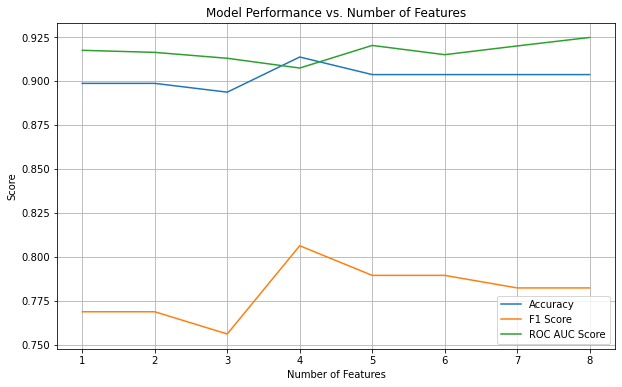

In [37]:
# Define the range of feature numbers to consider
num_features = range(1, len(X.columns) + 1)

# Lists to store the performance metrics
accuracy_scores = []
f1_scores = []
roc_auc_scores = []

# Logistic Regression model
logistic_model = LogisticRegression()

# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for num in num_features:
    # Select subset of features
    X_subset = X.iloc[:, :num]
    
    # Cross-validated predictions
    y_cv_pred = cross_val_predict(logistic_model, X_subset, y, cv=cv)
    
    # Calculate metrics using cross-validation scores
    accuracy = cross_val_score(logistic_model, X_subset, y, cv=cv, scoring='accuracy').mean()
    f1 = cross_val_score(logistic_model, X_subset, y, cv=cv, scoring='f1').mean()
    
    # Calculate AUC using cross-validation
    y_cv_prob = cross_val_predict(logistic_model, X_subset, y, cv=cv, method='predict_proba')[:, 1]
    roc_auc = roc_auc_score(y, y_cv_prob)
    
    # Store scores
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Plotting performance metrics vs. number of features
plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracy_scores, label='Accuracy')
plt.plot(num_features, f1_scores, label='F1 Score')
plt.plot(num_features, roc_auc_scores, label='ROC AUC Score')

plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Model Performance vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()


### 5.2.5. Feature Importances

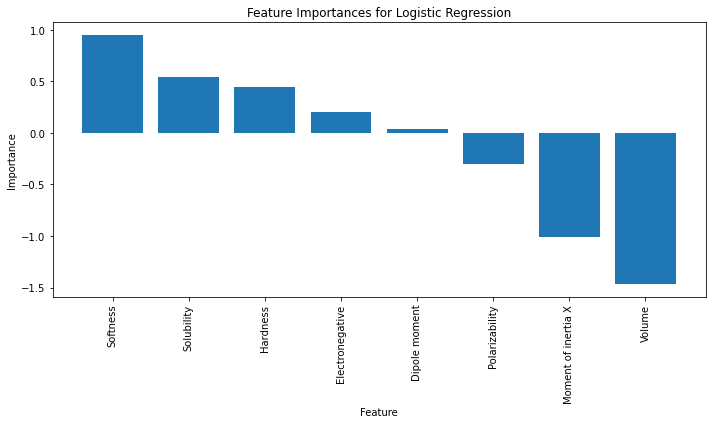

In [38]:
# Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(X, y)

# Retrieve feature importances (coefficients)
feature_importance = logistic_model.coef_[0]

# Sort feature importances in descending order
sorted_indices = feature_importance.argsort()[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_features = np.array(feature_names)[sorted_indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for Logistic Regression')
plt.tight_layout()
plt.show()

# Another approach to assess accuracy or enhance it involves plotting the accuracy against the varying number of features or utilizing feature importance to identify the most impactful feature in our dataset. After experimenting with these methods and having four features, the accuracy remained consistent, revealing the most influential features. Although all features were utilized in other models, reducing the number of features could have been an option. However, I chose to retain all features in my dataset for comprehensive consideration.

## 5.3. Support Vector Machine

# I experimented with four distinct kernels, and it's apparent that the linear kernel yields the most accurate predictions. Leveraging this, I proceeded to identify the most influential features and created a visual representation using the top two essential features.

Kernel: linear
Cross-Validated Metrics:
Accuracy: 0.9085897435897436
Precision: 0.7966666666666666
Recall: 0.8423376623376623
F1 Score: 0.8006204906204907
AUC: 0.9298245614035088
-----------------------------


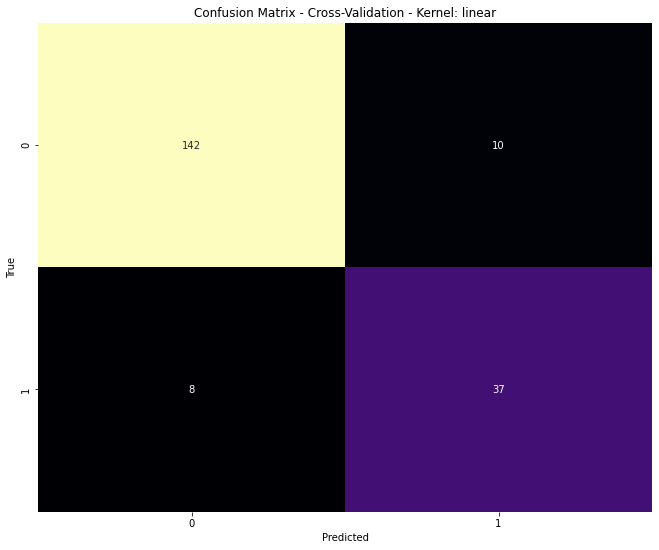

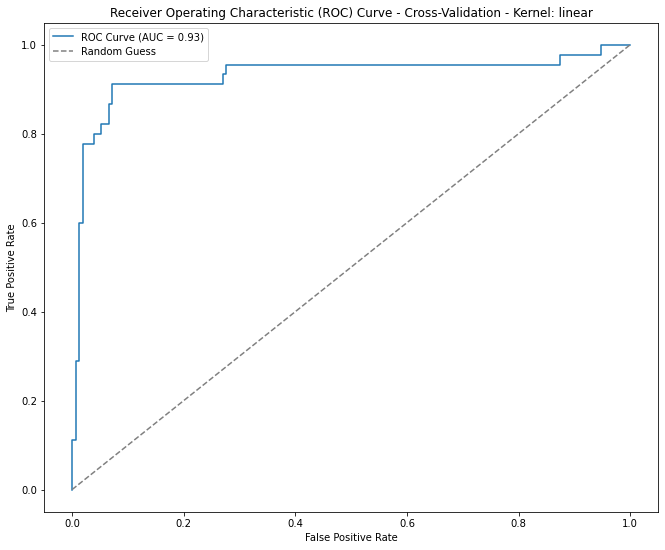

Kernel: poly
Cross-Validated Metrics:
Accuracy: 0.8783333333333333
Precision: 0.7857142857142858
Recall: 0.665887445887446
F1 Score: 0.7075925106884859
AUC: 0.894736842105263
-----------------------------


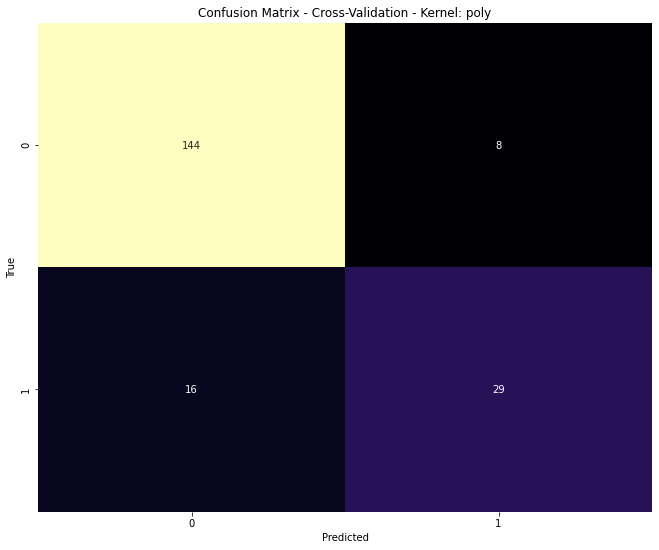

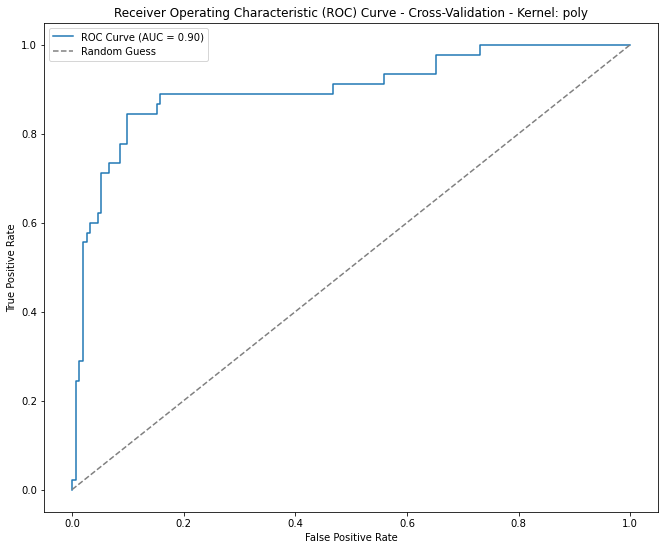

Kernel: rbf
Cross-Validated Metrics:
Accuracy: 0.8887179487179487
Precision: 0.8042857142857143
Recall: 0.7144588744588745
F1 Score: 0.7427350427350426
AUC: 0.9216374269005848
-----------------------------


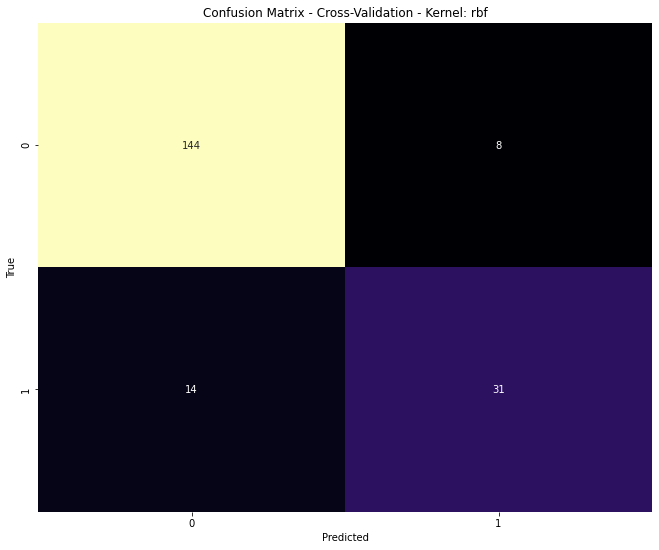

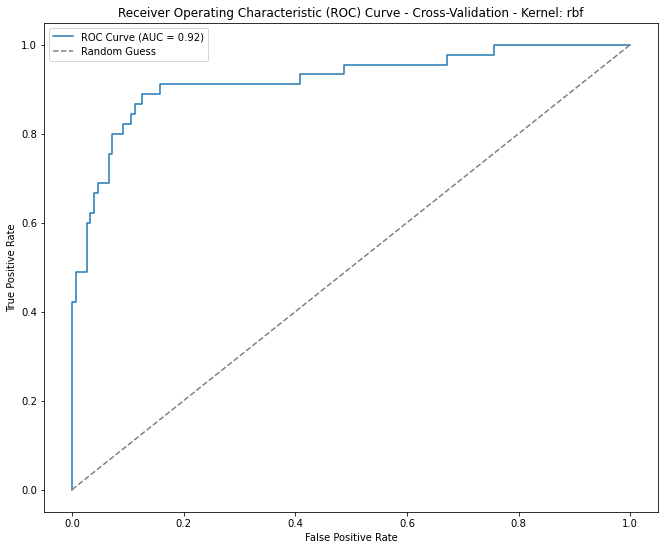

Kernel: sigmoid
Cross-Validated Metrics:
Accuracy: 0.8626923076923075
Precision: 0.7042424242424242
Recall: 0.789004329004329
F1 Score: 0.716401520735886
AUC: 0.849122807017544
-----------------------------


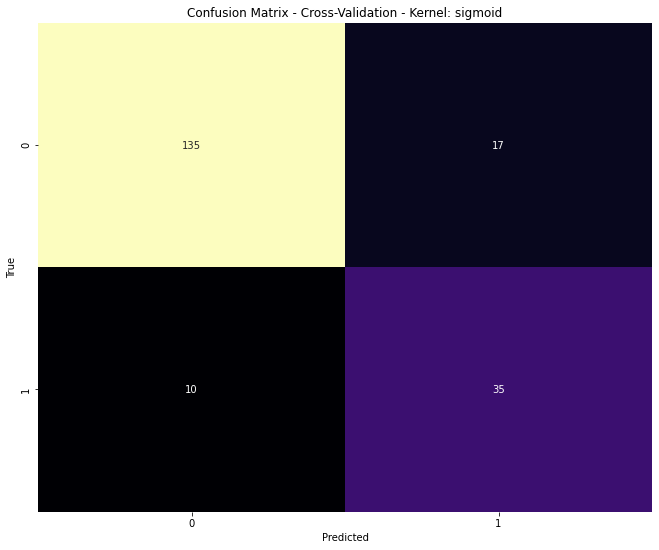

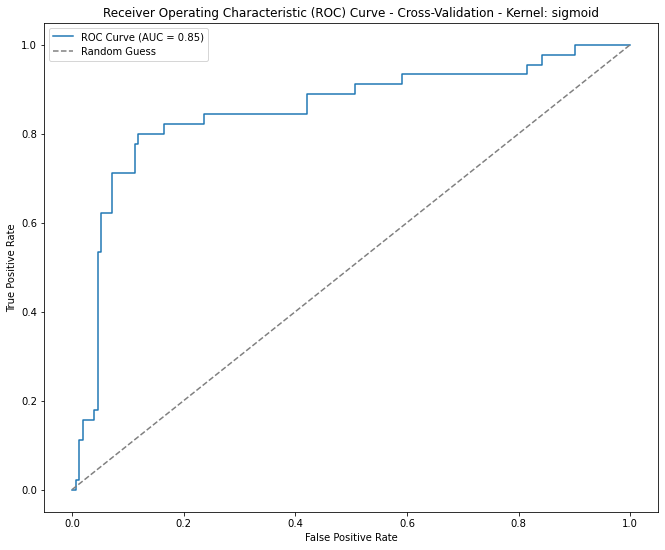

In [39]:
# I start with different kernels and compare the result based on this differences.
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] 

for kernel in kernels:
    svm_model = SVC(kernel=kernel, probability=True) 

    # Cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Cross-validated predictions
    y_cv_pred = cross_val_predict(svm_model, X, y, cv=cv)

    # Calculate metrics using cross-validation scores
    accuracy = cross_val_score(svm_model, X, y, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(svm_model, X, y, cv=cv, scoring='precision').mean()
    recall = cross_val_score(svm_model, X, y, cv=cv, scoring='recall').mean()
    f1 = cross_val_score(svm_model, X, y, cv=cv, scoring='f1').mean()

    # Confusion matrix using cross-validated predictions
    conf_matrix_cv = confusion_matrix(y, y_cv_pred)

    # Calculate AUC using cross-validation
    y_cv_prob = cross_val_predict(svm_model, X, y, cv=cv, method='predict_proba')[:, 1]
    auc = roc_auc_score(y, y_cv_prob)

    # Print cross-validated metrics
    print(f"Kernel: {kernel}")
    print("Cross-Validated Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {auc}")
    print("-----------------------------")

    # Plotting confusion matrix
    plt.figure(figsize=(11, 9))
    sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='magma', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Cross-Validation - Kernel: {kernel}')
    plt.show()

    # Calculate ROC curve and AUC using cross-validation
    y_cv_prob = cross_val_predict(svm_model, X, y, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_cv_prob)
    auc = roc_auc_score(y, y_cv_prob)

    # Plot ROC curve
    plt.figure(figsize=(11, 9))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Cross-Validation - Kernel: {kernel}')
    plt.legend()
    plt.show()


### 5.3.1 Support Vector Machine Graphs

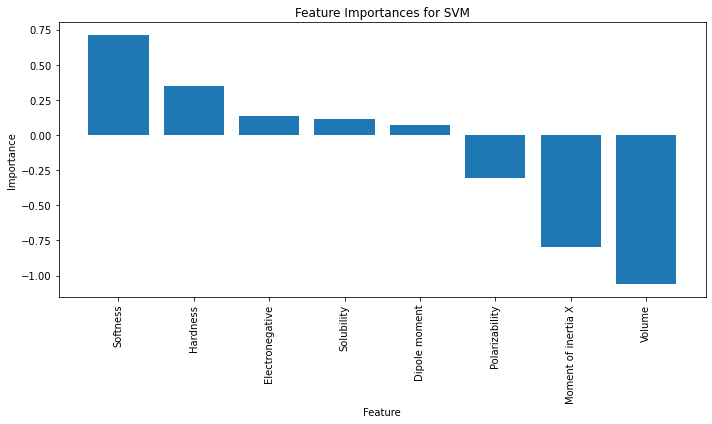

In [40]:
# SVM model
svm_model = SVC(kernel='linear', probability=True) 

# Fit the model
svm_model.fit(X, y)

# Retrieve feature importances (coefficients)
feature_importance = svm_model.coef_[0]

# Sort feature importances in descending order
sorted_indices = feature_importance.argsort()[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_features = np.array(feature_names)[sorted_indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for SVM')
plt.tight_layout()
plt.show()

C:\Users\M-Bcc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


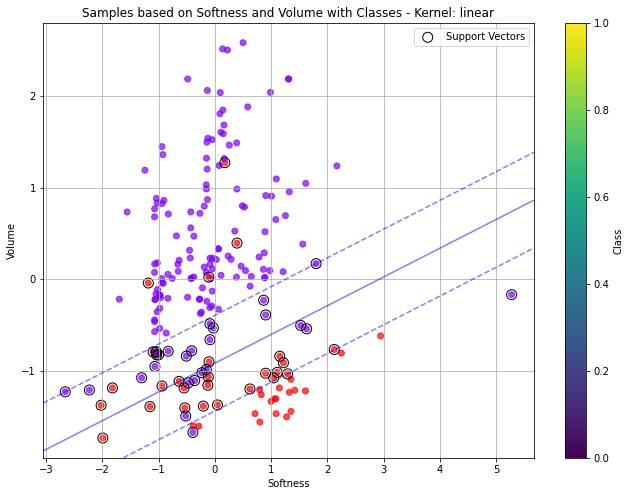

C:\Users\M-Bcc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


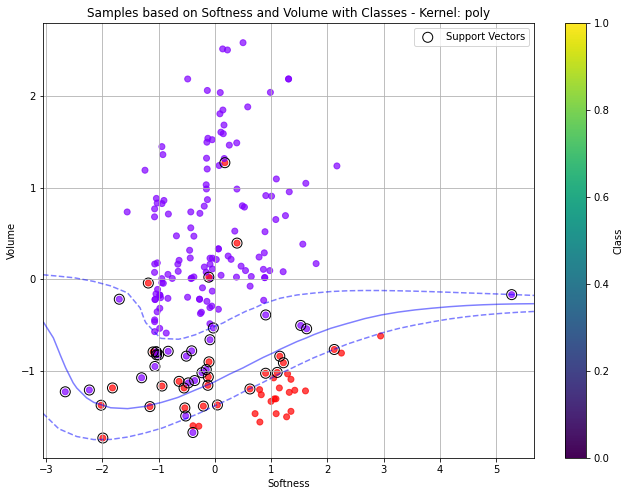

C:\Users\M-Bcc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


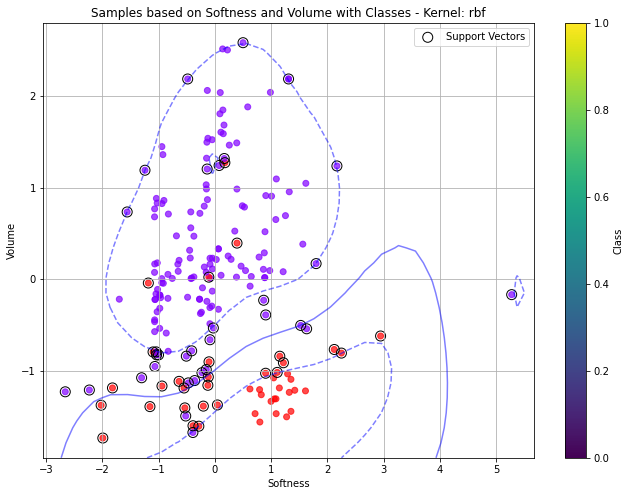

C:\Users\M-Bcc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


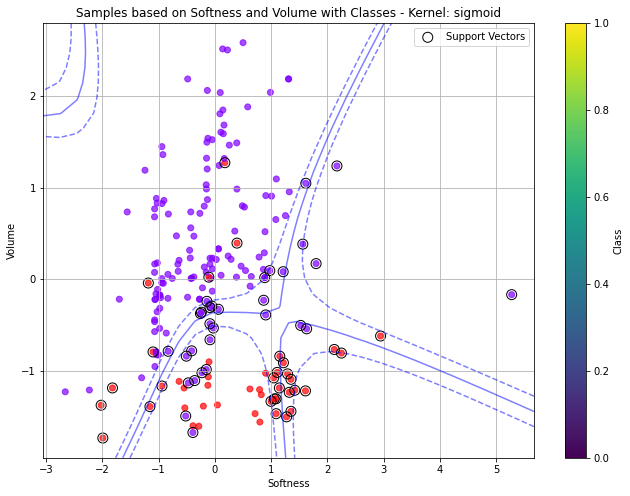

In [44]:
kernels = ['linear', 'poly' , 'rbf', 'sigmoid']

for kernel in kernels:
    svm_model = SVC(kernel=kernel, probability=True) 

    # Selecting features for plotting(I choose this two features because they have most effect in my target)
    features = ['Softness', 'Volume']
    X_selected = X[features]

    # Fit SVM on the selected features and target
    svm_model.fit(X_selected, y)

    # Make predictions
    predictions = svm_model.predict(X_selected)

    # Plotting the samples based on Solubility and Volume with different colors based on their class
    plt.figure(figsize=(11, 8))
    plt.scatter(X_selected['Softness'], X_selected['Volume'], c=y, cmap='rainbow', alpha=0.7)
    plt.xlabel('Softness')
    plt.ylabel('Volume')
    plt.title(f'Samples based on Softness and Volume with Classes - Kernel: {kernel}')

    # Plot the decision boundary and the margins
    #This part is useful for making SVM margins
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='b', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plot the support vectors
    plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', label='Support Vectors')

    plt.legend()
    plt.colorbar(label='Class')
    plt.grid(True)
    plt.show()
   
    

## 5.4. Linear and Quadratic Discriminant Analysis

# I utilized additional models, namely LDA and QDA, both of which possess distinct characteristics. LDA assumes normally distributed data within each class, assuming identical covariance matrices among classes. Conversely, QDA also presumes normally distributed class data but accommodates distinct covariance matrices for each class. Notably, LDA exhibited superior performance on my dataset, possibly due to its employment of a linear decision boundary, akin to the SVM model that utilizes a linear kernel. To visualize the disparities between these models, I selected two features for plotting purposes.

Model: LinearDiscriminantAnalysis
Cross-Validated Metrics:
Accuracy: 0.8987179487179487
Precision: 0.803968253968254
Recall: 0.7755844155844156
F1 Score: 0.7752958152958154
AUC: 0.9213450292397661
-----------------------------


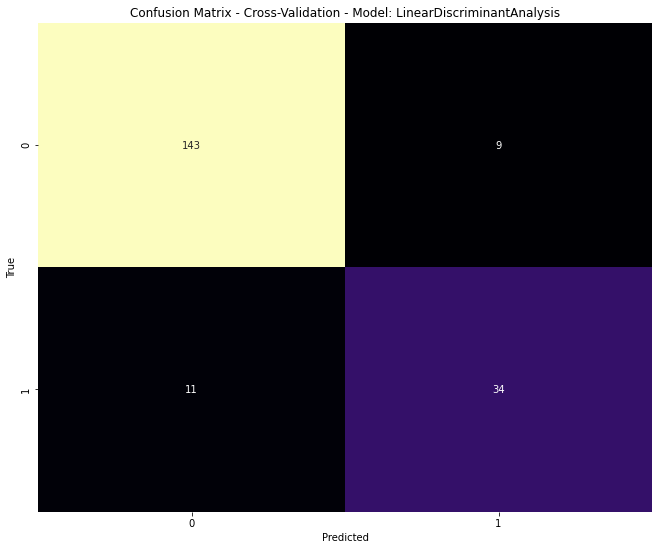

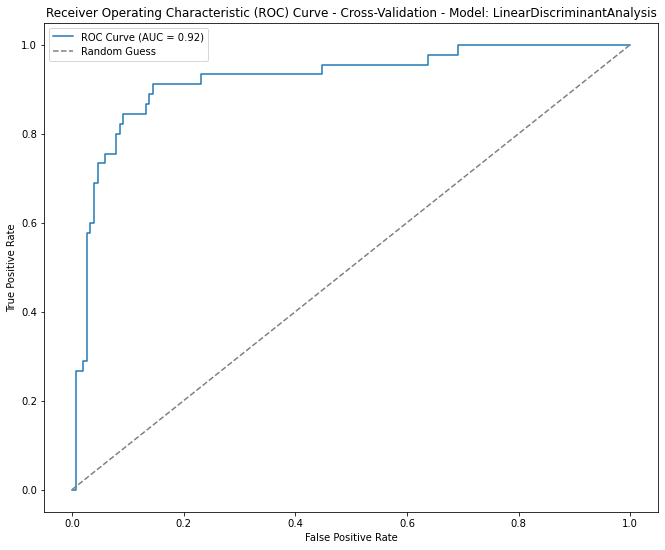

Model: QuadraticDiscriminantAnalysis
Cross-Validated Metrics:
Accuracy: 0.8884615384615383
Precision: 0.7647435897435898
Recall: 0.789004329004329
F1 Score: 0.7657705645187137
AUC: 0.8826023391812867
-----------------------------


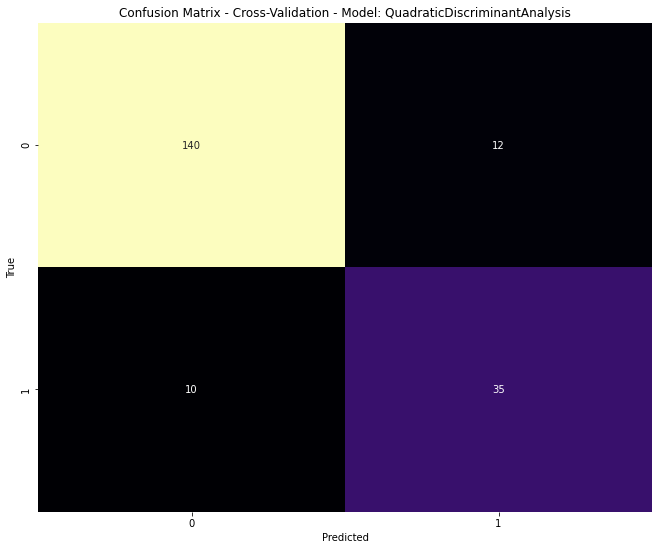

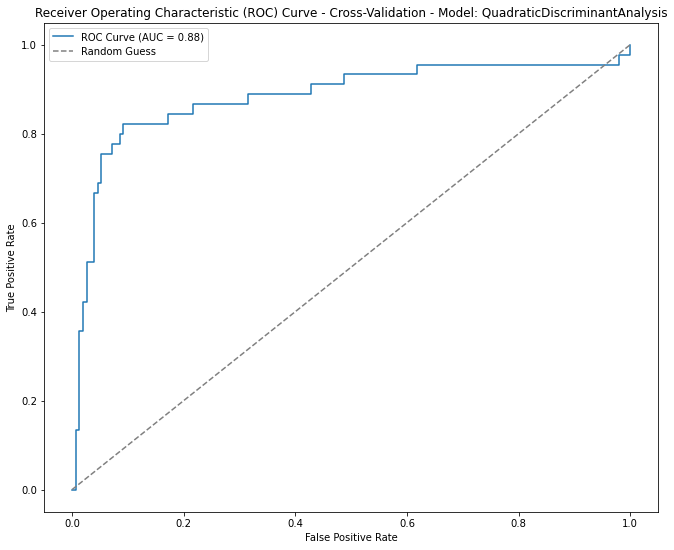

In [45]:
# Models
models = [LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]

for model in models:
    model_name = type(model).__name__  
    
    # Cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Cross-validated predictions
    y_cv_pred = cross_val_predict(model, X, y, cv=cv)

    # Calculate metrics using cross-validation scores
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision').mean()
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()

    # Confusion matrix using cross-validated predictions
    conf_matrix_cv = confusion_matrix(y, y_cv_pred)

    # Calculate AUC using cross-validation
    y_cv_prob = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    auc = roc_auc_score(y, y_cv_prob)

    # Print cross-validated metrics
    print(f"Model: {model_name}")
    print("Cross-Validated Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {auc}")
    print("-----------------------------")

    # Plotting confusion matrix
    plt.figure(figsize=(11, 9))
    sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='magma', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Cross-Validation - Model: {model_name}')
    plt.show()

    # Calculate ROC curve and AUC using cross-validation
    y_cv_prob = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_cv_prob)
    auc = roc_auc_score(y, y_cv_prob)

    # Plot ROC curve
    plt.figure(figsize=(11, 9))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Cross-Validation - Model: {model_name}')
    plt.legend()
    plt.show()


### 5.4.1. LDA and QDA feature relationship

C:\Users\M-Bcc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


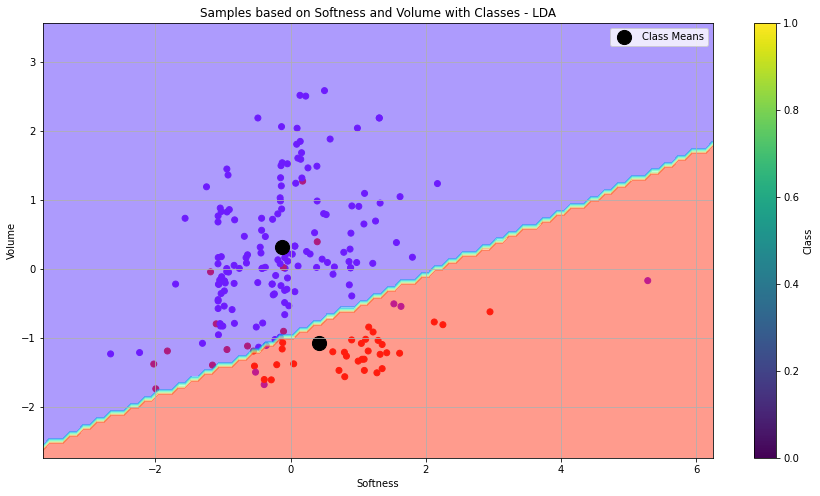

In [46]:
# Create LDA model
lda_model = LinearDiscriminantAnalysis()

# Fit LDA on the selected features and target
lda_model.fit(X_selected, y)

# Plotting the samples based on Softness and Volume with different colors based on their class
plt.figure(figsize=(15, 8))
plt.scatter(X_selected['Softness'], X_selected['Volume'], c=y, cmap='rainbow', alpha=1)
plt.xlabel('Softness')
plt.ylabel('Volume')
plt.title('Samples based on Softness and Volume with Classes - LDA')

# Plot the decision boundary
x_min, x_max = X_selected['Softness'].min() - 1, X_selected['Softness'].max() + 1
y_min, y_max = X_selected['Volume'].min() - 1, X_selected['Volume'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = lda_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap='rainbow')

plt.scatter(lda_model.means_[:, 0], lda_model.means_[:, 1], marker='o', c='k', s=200, label='Class Means')
plt.legend()
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


C:\Users\M-Bcc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


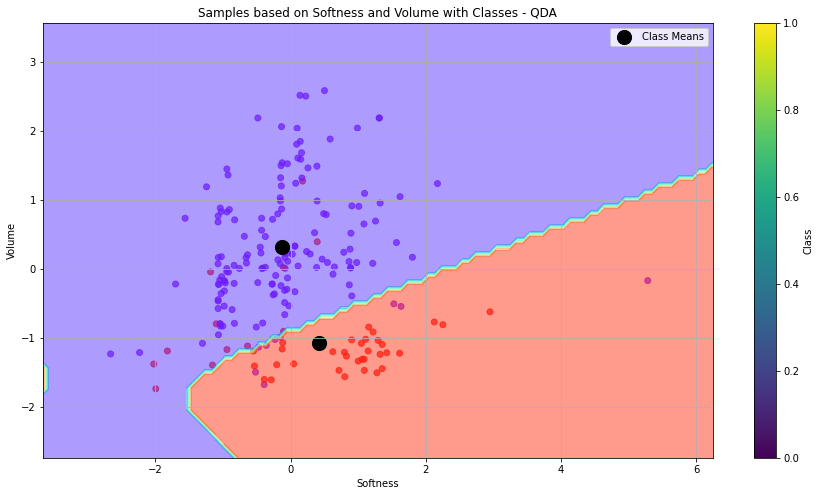

In [47]:
# Create QDA model
qda_model = QuadraticDiscriminantAnalysis()

# Fit QDA on the selected features and target
qda_model.fit(X_selected, y)

# Plotting the samples based on Softness and Volume with different colors based on their class
plt.figure(figsize=(15, 8))
plt.scatter(X_selected['Softness'], X_selected['Volume'], c=y, cmap='rainbow', alpha=0.7)
plt.xlabel('Softness')
plt.ylabel('Volume')
plt.title('Samples based on Softness and Volume with Classes - QDA')

# Plot the decision boundary
x_min, x_max = X_selected['Softness'].min() - 1, X_selected['Softness'].max() + 1
y_min, y_max = X_selected['Volume'].min() - 1, X_selected['Volume'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = qda_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap='rainbow')

plt.scatter(qda_model.means_[:, 0], qda_model.means_[:, 1], marker='o', c='black', s=200, label='Class Means')
plt.legend()
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


## 5.5. Random Forest

#  I also employed another model, the random forest, which exhibited commendable predictive capabilities. I generated ROC plots and confusion matrices, and further visualized some of the trees within this model. Additionally, I explored the feature importance in this specific model.

Model: Random Forest Classifier
Cross-Validated Metrics:
Accuracy: 0.9185897435897437
Precision: 0.8093506493506494
Recall: 0.8167965367965369
F1 Score: 0.8117682317682318
AUC: 0.9288011695906434
-----------------------------


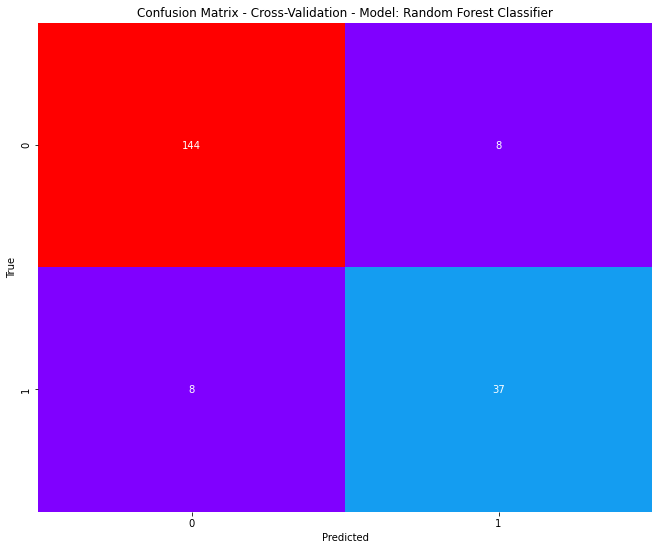

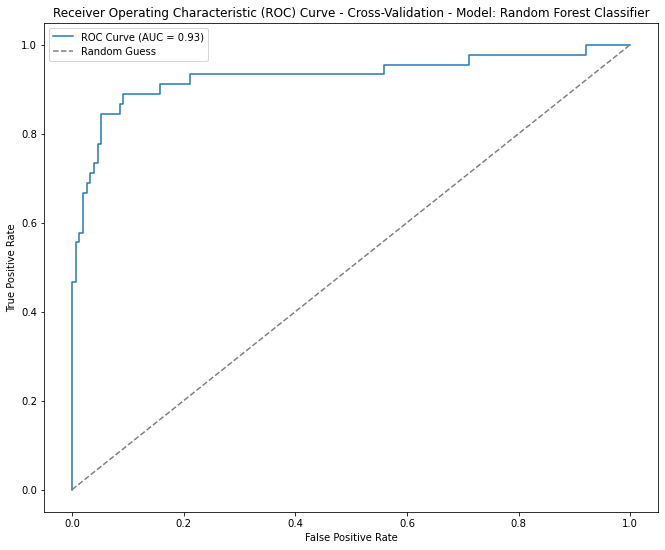

In [69]:
# Model 
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=42)

# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated predictions
y_cv_pred = cross_val_predict(rf_model, X, y, cv=cv)

# Calculate metrics using cross-validation scores
accuracy = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy').mean()
precision = cross_val_score(rf_model, X, y, cv=cv, scoring='precision').mean()
recall = cross_val_score(rf_model, X, y, cv=cv, scoring='recall').mean()
f1 = cross_val_score(rf_model, X, y, cv=cv, scoring='f1').mean()

# Confusion matrix using cross-validated predictions
conf_matrix_cv = confusion_matrix(y, y_cv_pred)

# Calculate AUC using cross-validation
y_cv_prob = cross_val_predict(rf_model, X, y, cv=cv, method='predict_proba')[:, 1]
auc = roc_auc_score(y, y_cv_prob)

# Print cross-validated metrics
print("Model: Random Forest Classifier")
print("Cross-Validated Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")
print("-----------------------------")

# Plotting confusion matrix
plt.figure(figsize=(11, 9))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='rainbow', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Cross-Validation - Model: Random Forest Classifier')
plt.show()

# Calculate ROC curve and AUC using cross-validation
y_cv_prob = cross_val_predict(rf_model, X, y, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, _ = roc_curve(y, y_cv_prob)
auc = roc_auc_score(y, y_cv_prob)

# Plot ROC curve
plt.figure(figsize=(11, 9))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Cross-Validation - Model: Random Forest Classifier')
plt.legend()
plt.show()

### 5.5.1 Visualize individual trees

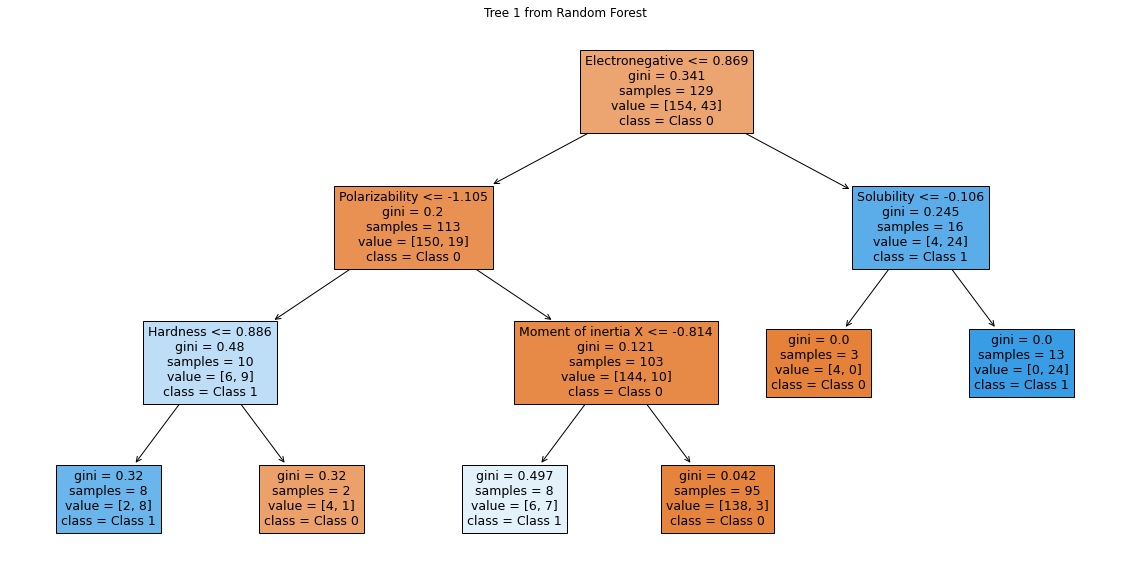

In [70]:
# Fit the Random Forest model
rf_model.fit(X, y)

# Extract individual trees
n_trees_to_visualize = 1  

for i in range(n_trees_to_visualize):
    # Plot each tree
    plt.figure(figsize=(20, 10))
    plot_tree(rf_model.estimators_[i], filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
    plt.title(f"Tree {i+1} from Random Forest")
    plt.show()

### 5.5.2 Feature Importances

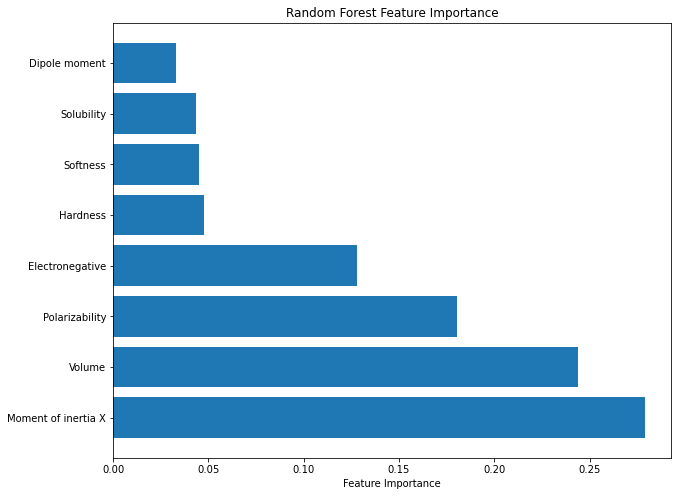

In [71]:
# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Plot 
plt.figure(figsize=(10, 8))
plt.barh(range(X.shape[1]), sorted_importances, align='center')
plt.yticks(range(X.shape[1]), sorted_features)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

## 5.6. K Nearest Neighbors

# Now let's see what is our result for KNN model

Model: K Nearest Neighbors
Cross-Validated Metrics:
Accuracy: 0.898846153846154
Precision: 0.7911904761904762
Recall: 0.7690043290043291
F1 Score: 0.7712145748987853
AUC: 0.9137426900584794
-----------------------------


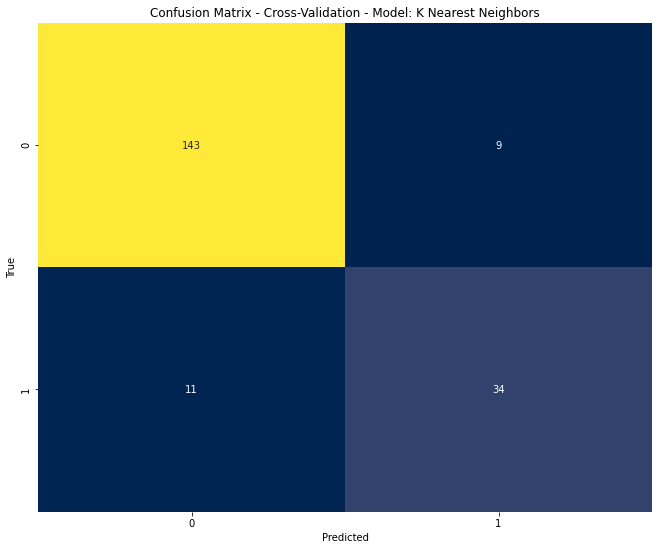

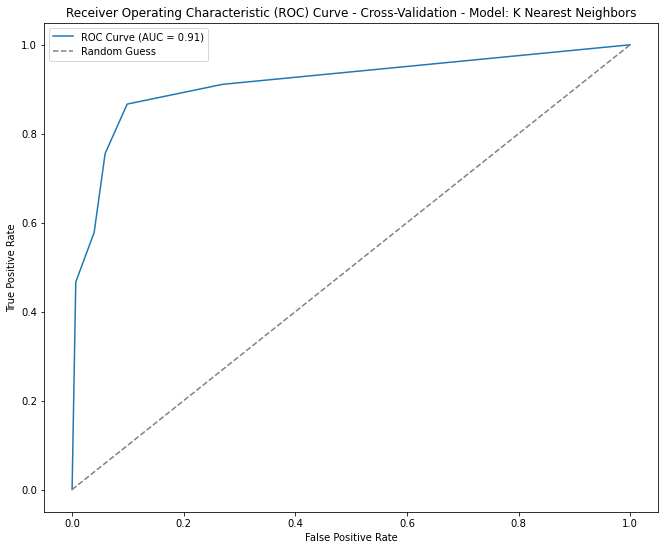

In [72]:
# Model 
knn_model = KNeighborsClassifier(n_neighbors=5)

# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated predictions
y_cv_pred = cross_val_predict(knn_model, X, y, cv=cv)

# Calculate metrics using cross-validation scores
accuracy = cross_val_score(knn_model, X, y, cv=cv, scoring='accuracy').mean()
precision = cross_val_score(knn_model, X, y, cv=cv, scoring='precision').mean()
recall = cross_val_score(knn_model, X, y, cv=cv, scoring='recall').mean()
f1 = cross_val_score(knn_model, X, y, cv=cv, scoring='f1').mean()

# Confusion matrix using cross-validated predictions
conf_matrix_cv = confusion_matrix(y, y_cv_pred)

# Calculate AUC using cross-validation
y_cv_prob = cross_val_predict(knn_model, X, y, cv=cv, method='predict_proba')[:, 1]
auc = roc_auc_score(y, y_cv_prob)

# Print cross-validated metrics
print("Model: K Nearest Neighbors")
print("Cross-Validated Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")
print("-----------------------------")

# Plotting confusion matrix
plt.figure(figsize=(11, 9))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='cividis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Cross-Validation - Model: K Nearest Neighbors')
plt.show()

# Calculate ROC curve and AUC using cross-validation
y_cv_prob = cross_val_predict(knn_model, X, y, cv=cv, method='predict_proba')[:, 1]
fpr, tpr, _ = roc_curve(y, y_cv_prob)
auc = roc_auc_score(y, y_cv_prob)

# Plot ROC curve
plt.figure(figsize=(11, 9))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Cross-Validation - Model: K Nearest Neighbors')
plt.legend()
plt.show()


# This code can be useful for finding better number of neighbors

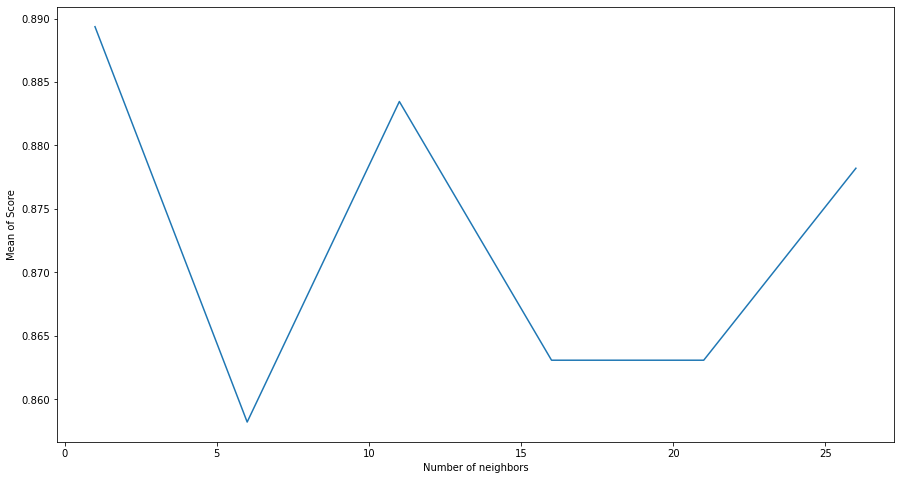

In [49]:
k_values = np.arange(1,30,5)
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

plt.figure(figsize=(15, 8))
plt.plot(k_values,scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean of Score')
plt.show()

### 5.6.1. K Nearest Neighbors Plot

C:\Users\M-Bcc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


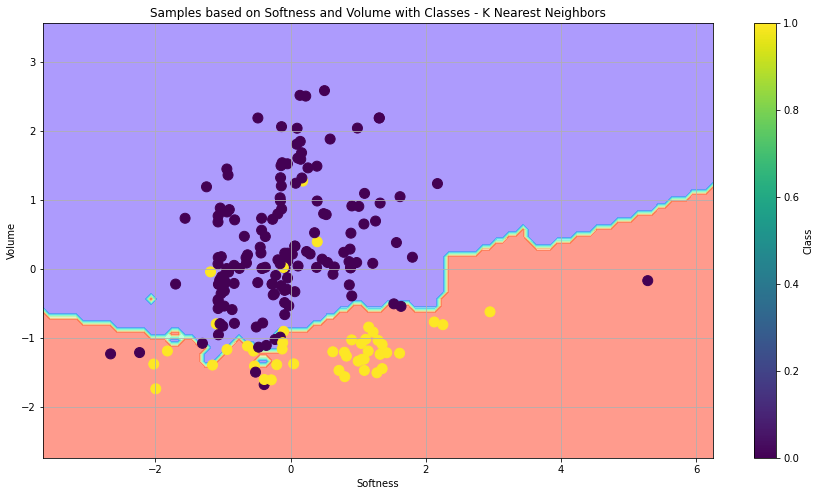

In [51]:
# Model - K Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit KNN on the selected features and target
knn_model.fit(X_selected, y)

# Plotting the samples based on Softness and Volume with different colors based on their class
plt.figure(figsize=(15, 8))

plt.scatter(X_selected['Softness'], X_selected['Volume'], c=y, cmap='rainbow', alpha=0.7)
plt.xlabel('Softness')
plt.ylabel('Volume')
plt.title('Samples based on Softness and Volume with Classes - K Nearest Neighbors')

# Plot the decision boundary
x_min, x_max = X_selected['Softness'].min() - 1, X_selected['Softness'].max() + 1
y_min, y_max = X_selected['Volume'].min() - 1, X_selected['Volume'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap='rainbow')

# Scatter plot for samples with class labels

plt.scatter(knn_model._fit_X[:, 0], knn_model._fit_X[:, 1], marker='o', c=y, s=100)
#plt.legend()
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

## 5.7. ROC Plot for all models

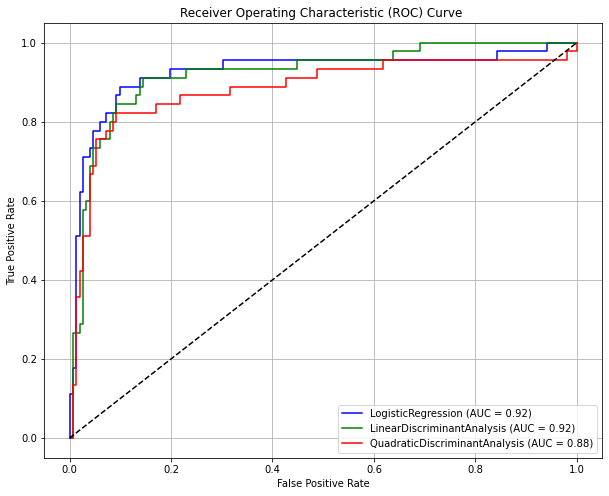

In [66]:
# classifiers
classifiers = [
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]


colors = ['blue', 'green', 'red']


plt.figure(figsize=(10, 8))

for clf, color in zip(classifiers, colors):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    probas_ = cross_val_predict(clf, X, y, cv=cv, method='predict_proba')
    prob_pos = probas_[:, 1]
    fpr, tpr, _ = roc_curve(y, prob_pos)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each classifier
    plt.plot(fpr, tpr, color=color, label=f'{clf.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing (dashed diagonal)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

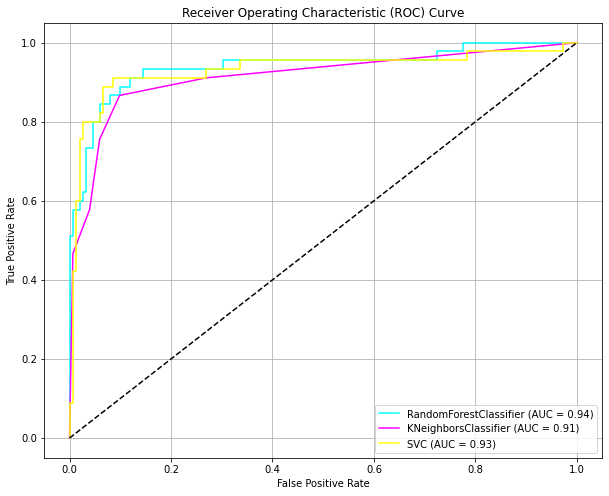

In [67]:
#classifiers
classifiers = [
    RandomForestClassifier(max_depth=3),
    KNeighborsClassifier(n_neighbors=5),
    SVC(probability=True,kernel='linear')
]
colors = [ 'cyan', 'magenta', 'yellow']


plt.figure(figsize=(10, 8))

for clf, color in zip(classifiers, colors):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
  
    probas_ = cross_val_predict(clf, X, y, cv=cv, method='predict_proba')
    prob_pos = probas_[:, 1]
    fpr, tpr, _ = roc_curve(y, prob_pos)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each classifier
    plt.plot(fpr, tpr, color=color, label=f'{clf.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing 
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()